In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime

# Rough Overview of the data and what we're working with

In [86]:
ab = pd.read_csv('../data/habsos_20230714.csv', parse_dates=['SAMPLE_DATE'])
ab = ab.sort_values(by=['SAMPLE_DATE'])

C:\Users\Peter Doze\AppData\Local\Temp\ipykernel_4308\1066814482.py:1: DtypeWarning: Columns (18,19,22) have mixed types. Specify dtype option on import or set low_memory=False.
  ab = pd.read_csv('../data/habsos_20230714.csv', parse_dates=['SAMPLE_DATE'])


In [87]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205552 entries, 14340 to 204874
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   STATE_ID         205552 non-null  object        
 1   DESCRIPTION      205531 non-null  object        
 2   LATITUDE         205552 non-null  float64       
 3   LONGITUDE        205552 non-null  float64       
 4   SAMPLE_DATE      205552 non-null  datetime64[ns]
 5   SAMPLE_DEPTH     200324 non-null  float64       
 6   GENUS            205552 non-null  object        
 7   SPECIES          205552 non-null  object        
 8   CATEGORY         204696 non-null  object        
 9   CELLCOUNT        205552 non-null  int64         
 10  CELLCOUNT_UNIT   205552 non-null  object        
 11  CELLCOUNT_QA     205552 non-null  int64         
 12  SALINITY         105763 non-null  float64       
 13  SALINITY_UNIT    105763 non-null  object        
 14  SALINITY_QA     

In [88]:
AB = ab.dropna()
AB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 157380 to 19026
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STATE_ID         82 non-null     object        
 1   DESCRIPTION      82 non-null     object        
 2   LATITUDE         82 non-null     float64       
 3   LONGITUDE        82 non-null     float64       
 4   SAMPLE_DATE      82 non-null     datetime64[ns]
 5   SAMPLE_DEPTH     82 non-null     float64       
 6   GENUS            82 non-null     object        
 7   SPECIES          82 non-null     object        
 8   CATEGORY         82 non-null     object        
 9   CELLCOUNT        82 non-null     int64         
 10  CELLCOUNT_UNIT   82 non-null     object        
 11  CELLCOUNT_QA     82 non-null     int64         
 12  SALINITY         82 non-null     float64       
 13  SALINITY_UNIT    82 non-null     object        
 14  SALINITY_QA      82 non-null     int

In [89]:
AB['STATE_ID'].unique()

array(['TX'], dtype=object)

## Lost a lot of rows I need to see what's happening.
## <span style="color:red">It looks like Texas is the only state with every variable filled</span>

In [90]:
AB

STATE_ID                                     DESCRIPTION  LATITUDE  \
157380       TX  1 mi. S Matagorda Ship Channel Jetty Matagorda  28.41473   
21802        TX             Mat. Ship Channel South Jetty (end)  28.41317   
19056        TX                     Pass Cavallo 1 mi. offshore  28.38647   
26157        TX                             Inside Pass Cavallo  28.38477   
21427        TX                      Mesquite Bay @ Cedar Bayou  28.11675   
...         ...                                             ...       ...   
18685        TX                             PINS 15 mile marker  27.20521   
18936        TX                              PINS 0 mile marker  27.41489   
17792        TX                          PINS Bird Island Basin  27.46800   
17556        TX       PINS Northern Park Boundary (North Beach)  27.41503   
19026        TX                              PINS 0 mile marker  27.41489   

        LONGITUDE         SAMPLE_DATE  SAMPLE_DEPTH    GENUS SPECIES  \
157380  -96.31238 2005-10-17 15:02:00        0.3048  Karenia  brevis   
21802   -96.31773 2005-10-17 15:12:00        0.3048  Karenia  brevis   
19056   -96.35495 2005-10-17 16:00:00        0.3048  Karenia  brevis   
26157   -96.38883 2005-10-17 16:10:00        0.3048  Karenia  brevis   
21427   -96.83083 2005-10-17 17:15:00        0.3048  Karenia  brevis   
...           ...                 ...           ...      ...     ...   
18685   -97.36402 2013-09-10 15:40:00        0.9144  Karenia  brevis   
18936   -97.30123 2013-09-10 16:35:00        0.9144  Karenia  brevis   
17792   -97.31337 2013-09-11 14:00:00        0.6096  Karenia  brevis   
17556   -97.30136 2013-09-18 13:53:00        0.7620  Karenia  brevis   
19026   -97.30123 2013-09-18 14:36:00        0.7620  Karenia  brevis   

            CATEGORY  CELLCOUNT  ... SALINITY_QA  WATER_TEMP  WATER_TEMP_UNIT  \
157380  not observed          0  ...           1        25.0           deg. C   
21802   not observed          0  ...           1        25.0           deg. C   
19056   not observed          0  ...           1        25.0           deg. C   
26157   not observed          0  ...           1        25.0           deg. C   
21427   not observed          0  ...           1        25.0           deg. C   
...              ...        ...  ...         ...         ...              ...   
18685   not observed          0  ...           1        28.3           deg. C   
18936   not observed          0  ...           1        28.2           deg. C   
17792   not observed          0  ...           4        26.8           deg. C   
17556   not observed          0  ...           1        28.3           deg. C   
19026            low      10000  ...           1        28.2           deg. C   

       WATER_TEMP_QA  WIND_DIR  WIND_DIR_UNIT WIND_DIR_QA  WIND_SPEED  \
157380           1.0     337.5            deg         5.0        12.0   
21802            1.0     337.5            deg         5.0        12.0   
19056            1.0     337.5            deg         5.0        12.0   
26157            1.0     337.5            deg         5.0        12.0   
21427            1.0     337.5            deg         5.0        12.0   
...              ...       ...            ...         ...         ...   
18685            1.0      90.0            deg         5.0        12.5   
18936            1.0      90.0            deg         5.0        12.5   
17792            1.0      90.0            deg         5.0         0.0   
17556            1.0      90.0            deg         5.0        15.0   
19026            1.0      90.0            deg         5.0        15.0   

       WIND_SPEED_UNIT WIND_SPEED_QA  
157380             mph           1.0  
21802              mph           1.0  
19056              mph           1.0  
26157              mph           1.0  
21427              mph           1.0  
...                ...           ...  
18685              mph           5.0  
18936              mph           5.0  
17792           

In [91]:
ab.iloc[101]

STATE_ID                                    FL
DESCRIPTION        San Carlos Bay; power lines
LATITUDE                               26.4779
LONGITUDE                             -82.0578
SAMPLE_DATE                1954-03-15 00:00:00
SAMPLE_DEPTH                               0.5
GENUS                                  Karenia
SPECIES                                 brevis
CATEGORY                                medium
CELLCOUNT                               620000
CELLCOUNT_UNIT                         cells/L
CELLCOUNT_QA                                 1
SALINITY                                   NaN
SALINITY_UNIT                              NaN
SALINITY_QA                                  9
WATER_TEMP                                 NaN
WATER_TEMP_UNIT                            NaN
WATER_TEMP_QA                              9.0
WIND_DIR                                   NaN
WIND_DIR_UNIT                              NaN
WIND_DIR_QA                                9.0
WIND_SPEED   

## <span style="color:red"> It looks like most rows have a nan somewhere so dropna gets rid of most of everything, need to prioritize features</span>

## Online research implies that temperature and salinity are major features of forecasting algae blooms 
## I want to see what I have left when I just dropna for those columns and don't worry about the wind

In [92]:
AB2 = ab.dropna(subset=['SALINITY','WATER_TEMP'], how='any')
AB2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94214 entries, 47013 to 204874
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STATE_ID         94214 non-null  object        
 1   DESCRIPTION      94202 non-null  object        
 2   LATITUDE         94214 non-null  float64       
 3   LONGITUDE        94214 non-null  float64       
 4   SAMPLE_DATE      94214 non-null  datetime64[ns]
 5   SAMPLE_DEPTH     91609 non-null  float64       
 6   GENUS            94214 non-null  object        
 7   SPECIES          94214 non-null  object        
 8   CATEGORY         93931 non-null  object        
 9   CELLCOUNT        94214 non-null  int64         
 10  CELLCOUNT_UNIT   94214 non-null  object        
 11  CELLCOUNT_QA     94214 non-null  int64         
 12  SALINITY         94214 non-null  float64       
 13  SALINITY_UNIT    94214 non-null  object        
 14  SALINITY_QA      94214 non-null  

## <span style="color:red"> Only lost about 100,000 rows when we dropna for temp and salinity, if we stick with this it should be enough data? </span>

In [93]:
AB2['STATE_ID'].unique()

array(['FL', 'TX', 'MS', 'AL'], dtype=object)

In [94]:
AB2.groupby('STATE_ID')['DESCRIPTION'].count()

STATE_ID
AL     1471
FL    90323
MS      775
TX     1633
Name: DESCRIPTION, dtype: int64

## <span style="color:red"> Got all the states back when only dropna for temp and salinity</span>

## Texas is the only state with at least some rows completely filled, might want to focus on Texas? Try to salvage the wind data in Texas?

## Lets investigate if we can get good timeseries for each region in a state or determine if we have to treat each state as a whole entity. Focus on Texas for now.

In [95]:
abtexas = AB2.loc[AB2.STATE_ID=='TX']
abtexas['STATE_ID'].unique() #just checking

array(['TX'], dtype=object)

In [96]:
abtexas.info() #just checking

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1633 entries, 157523 to 9925
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STATE_ID         1633 non-null   object        
 1   DESCRIPTION      1633 non-null   object        
 2   LATITUDE         1633 non-null   float64       
 3   LONGITUDE        1633 non-null   float64       
 4   SAMPLE_DATE      1633 non-null   datetime64[ns]
 5   SAMPLE_DEPTH     1304 non-null   float64       
 6   GENUS            1633 non-null   object        
 7   SPECIES          1633 non-null   object        
 8   CATEGORY         1633 non-null   object        
 9   CELLCOUNT        1633 non-null   int64         
 10  CELLCOUNT_UNIT   1633 non-null   object        
 11  CELLCOUNT_QA     1633 non-null   int64         
 12  SALINITY         1633 non-null   float64       
 13  SALINITY_UNIT    1633 non-null   object        
 14  SALINITY_QA      1633 non-null   in

In [97]:
len(abtexas.DESCRIPTION.unique())

469

In [98]:
abtexas.groupby('DESCRIPTION')[['SALINITY','WATER_TEMP']].count()

SALINITY  WATER_TEMP
DESCRIPTION                                                             
0.1 miles north of Rio Grande                              1           1
1 mi N of Beach Access Rd 6, South Padre Island            1           1
1 mi. S Matagorda Ship Channel Jetty Matagorda             1           1
1 mi. offshore, 14 mi. north of Brazos Santiago...         1           1
1 mi. offshore, 6 mi. north of Brazos Santiago ...         1           1
...                                                      ...         ...
north part of Aransas Bay                                  1           1
offshore Key Allegro                                       5           5
offshore Key Allegro #2                                    1           1
old Parrot Eyes                                            3           3
ripline south of Mud Island                                1           1

[469 rows x 2 columns]

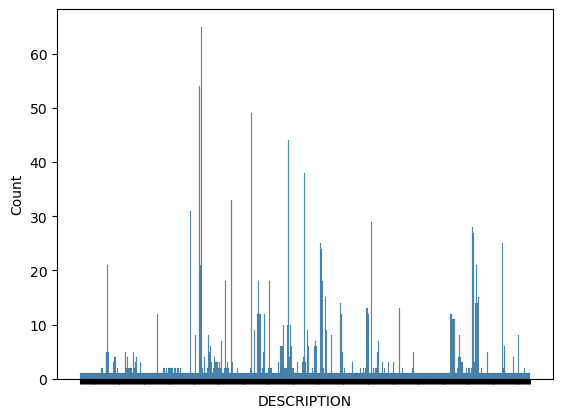

In [99]:
ax = sns.histplot(data=abtexas, x='DESCRIPTION')
ax.set(xticklabels=[]) #turn off labels cause unnecessary and I know every tick is a region in Texas
plt.show()

In [100]:
plt.close()

## <span style="color:black"> It looks like we can get some regions that are relatively big i.e >20 timestamps so we have to consider how many of these "big" regions we can get per state? and is this representative of the regions that don't have many timestamps? It might be better to just look at the state as a whole</span>  

In [101]:
abalabama = AB2.loc[AB2.STATE_ID=='AL']
abflorida = AB2.loc[AB2.STATE_ID=='FL']
abmississippi = AB2.loc[AB2.STATE_ID=='MS']

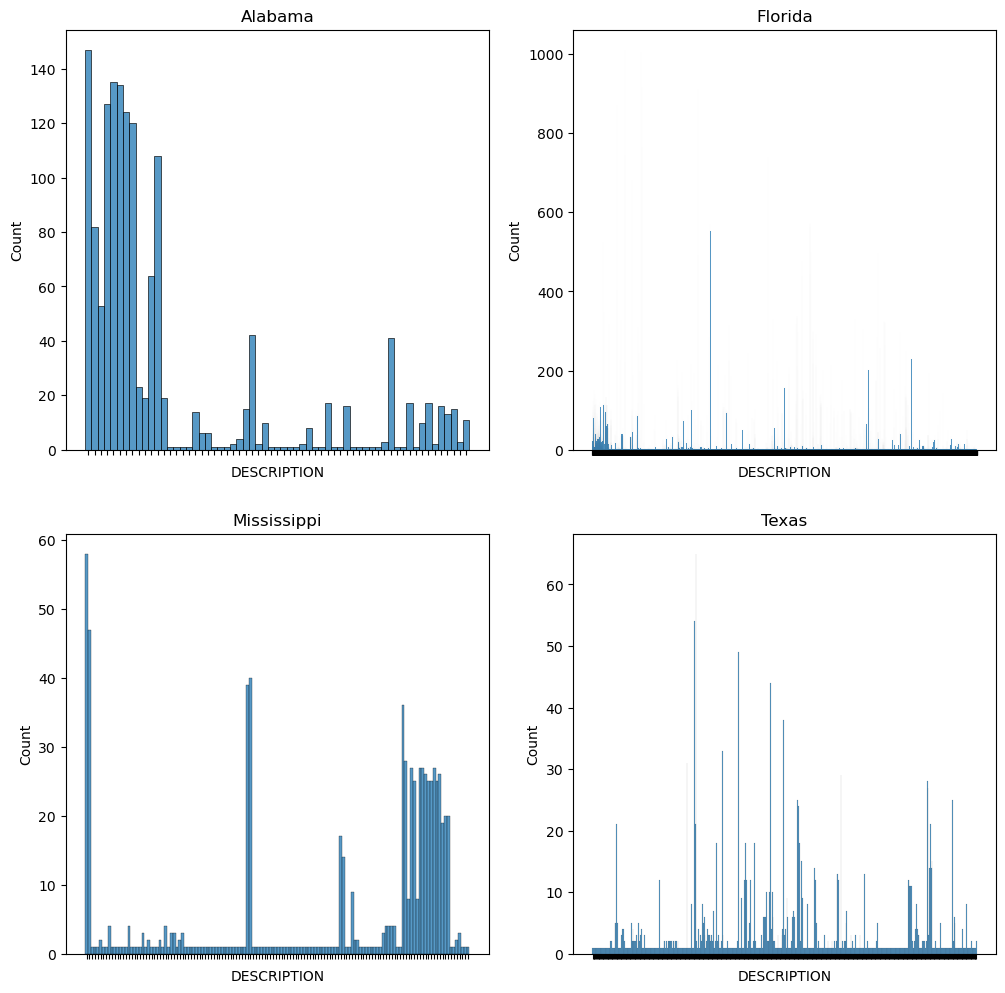

In [102]:
fig, axes = plt.subplots(2,2,figsize=(12,12))

sns.histplot(ax=axes[0,0], data=abalabama, x='DESCRIPTION')
axes[0,0].set_title('Alabama')
axes[0,0].set(xticklabels=[]) 

sns.histplot(ax=axes[0,1], data=abflorida, x='DESCRIPTION')
axes[0,1].set_title('Florida')
axes[0,1].set(xticklabels=[])

sns.histplot(ax=axes[1,0], data=abmississippi, x='DESCRIPTION')
axes[1,0].set_title('Mississippi')
axes[1,0].set(xticklabels=[])

sns.histplot(ax=axes[1,1], data=abtexas, x='DESCRIPTION')
axes[1,1].set_title('Texas')
axes[1,1].set(xticklabels=[])
plt.show()

In [103]:
plt.close()

# Lets look at the frequency of the blooms for the entire dataset, for each state, and then try to group by lat/long

## Entire Dataset

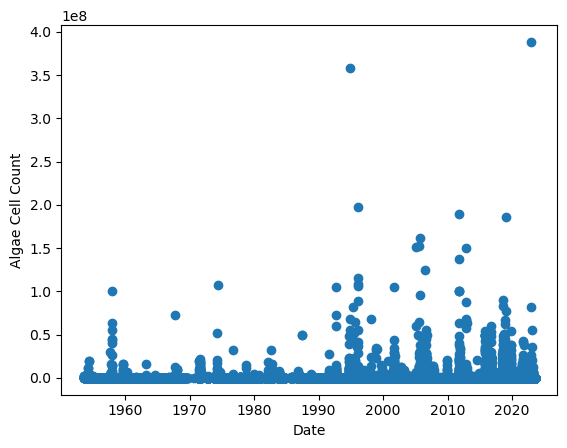

In [104]:
plt.scatter(ab['SAMPLE_DATE'],ab['CELLCOUNT'])
plt.xlabel('Date')
plt.ylabel('Algae Cell Count')
plt.show()

In [105]:
plt.close()

## <span style=color:red> OK so the blooms picked up near the 2000's. It looks a bit periodic in the busy half </span> <span style=color:purple> Might want to only use data from 90's onward? Then use last few years as testing set </span>

## States

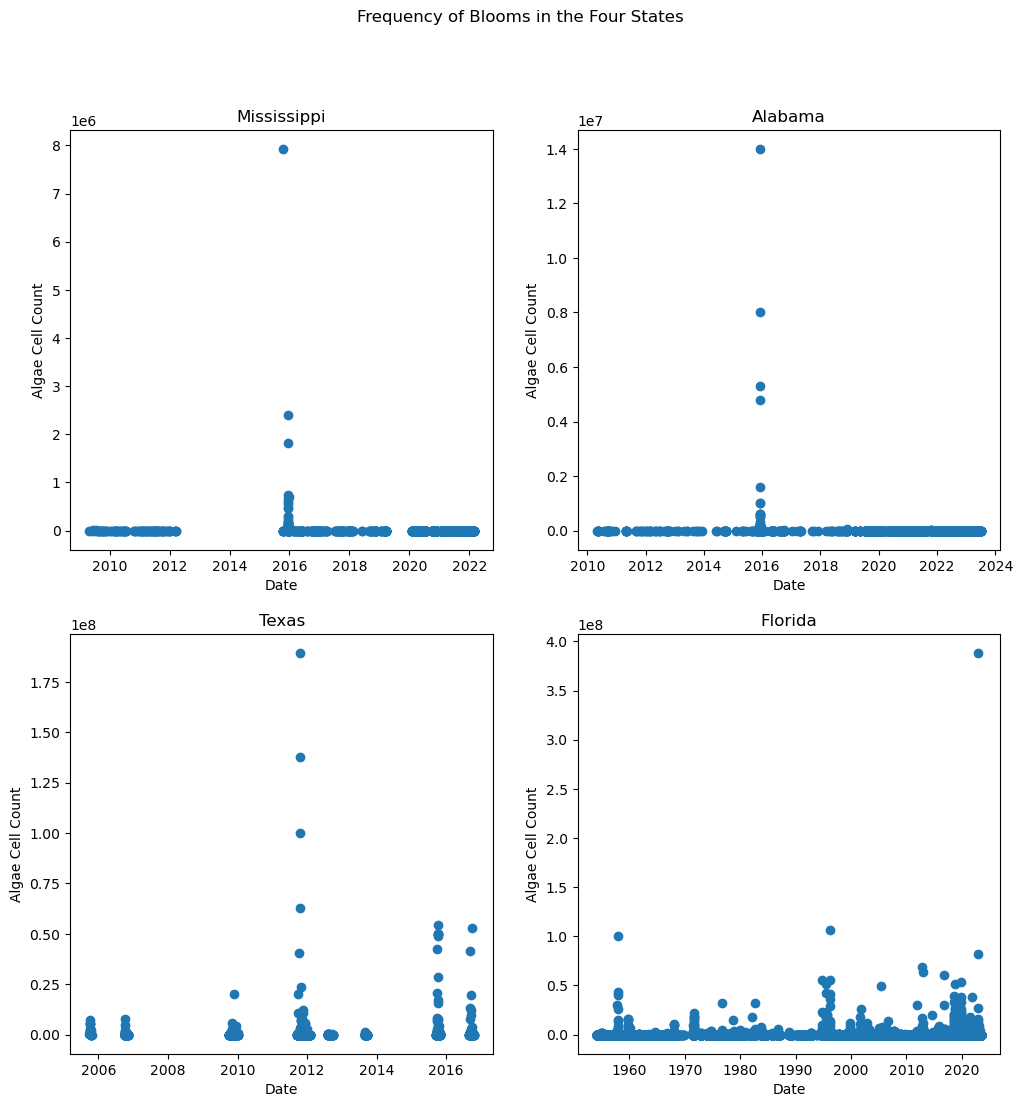

In [106]:
fig, axes = plt.subplots(2,2,figsize=(12,12))
fig.suptitle('Frequency of Blooms in the Four States')
axes[0,0].scatter(abmississippi['SAMPLE_DATE'], abmississippi['CELLCOUNT'])
axes[0,0].set_title('Mississippi')
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('Algae Cell Count')
#axes[0,0].set_ylim([0, 1e7])

axes[0,1].scatter(abalabama['SAMPLE_DATE'], abalabama['CELLCOUNT'])
axes[0,1].set_title('Alabama')
axes[0,1].set_xlabel('Date')
axes[0,1].set_ylabel('Algae Cell Count')
#axes[0,1].set_ylim([0, 1e7])

axes[1,0].scatter(abtexas['SAMPLE_DATE'], abtexas['CELLCOUNT'])
axes[1,0].set_title('Texas')
axes[1,0].set_xlabel('Date')
axes[1,0].set_ylabel('Algae Cell Count')
#axes[1,0].set_ylim([0, 1e7])

axes[1,1].scatter(abflorida['SAMPLE_DATE'], abflorida['CELLCOUNT'])
axes[1,1].set_title('Florida')
axes[1,1].set_xlabel('Date')
axes[1,1].set_ylabel('Algae Cell Count')
#axes[1,1].set_ylim([0, 1e7])
plt.show()
plt.close()

In [107]:
plt.close()

## <span style=color:red> We don't have full time data for every state the lowest common date seems to be 2010</span> 

In [108]:
#Alabama

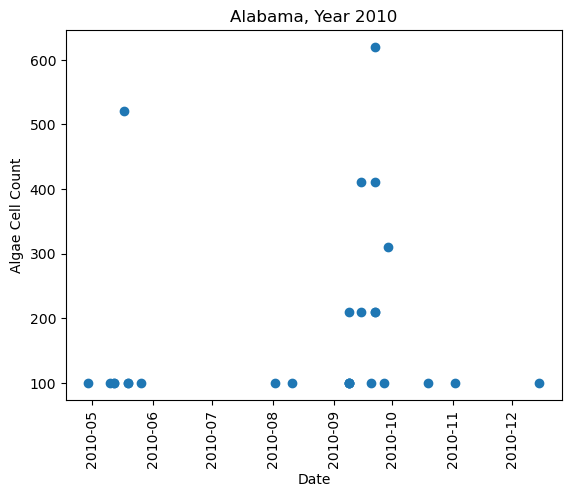

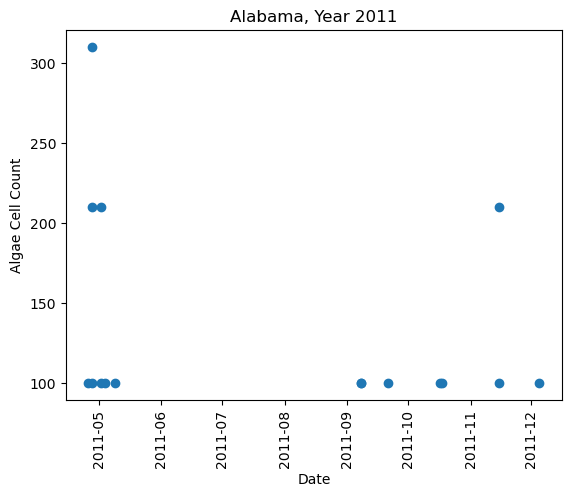

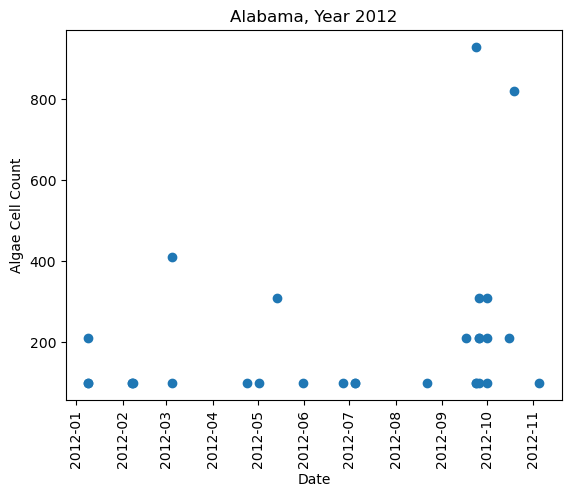

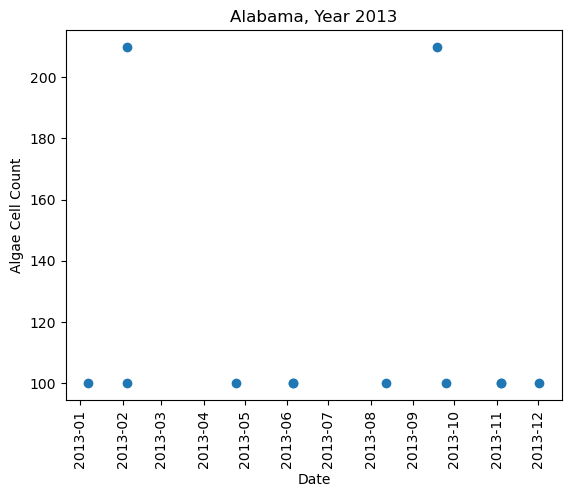

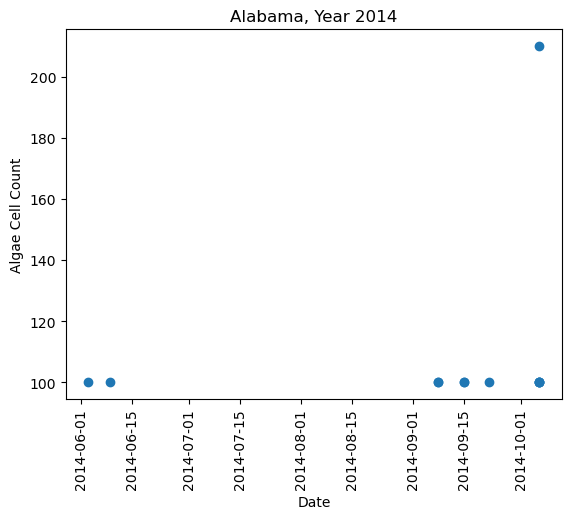

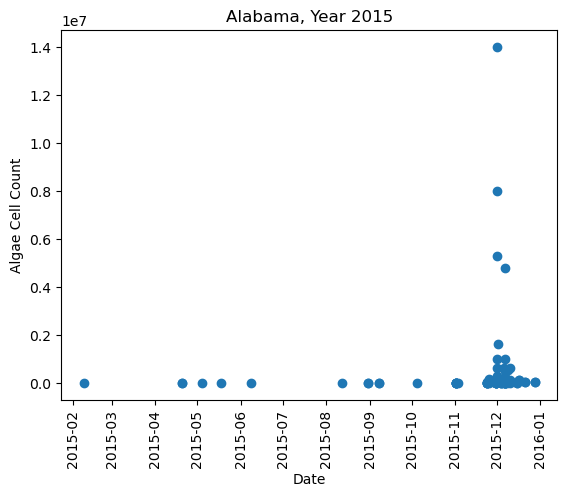

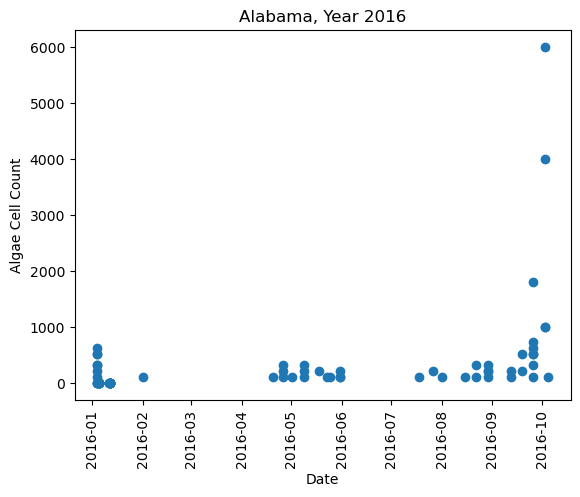

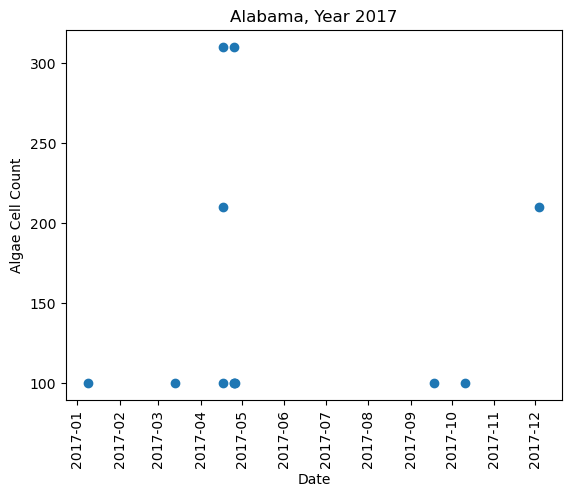

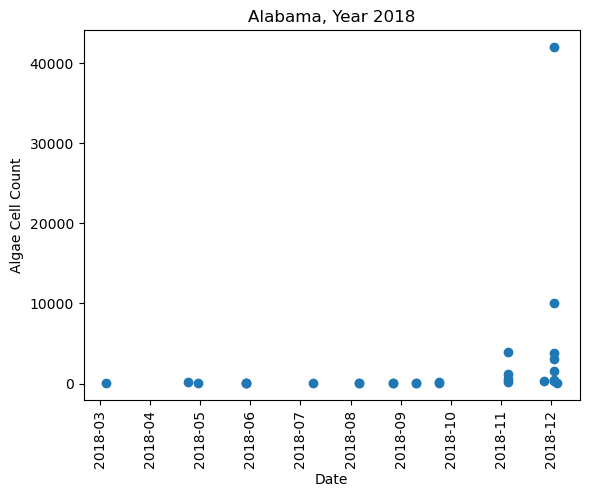

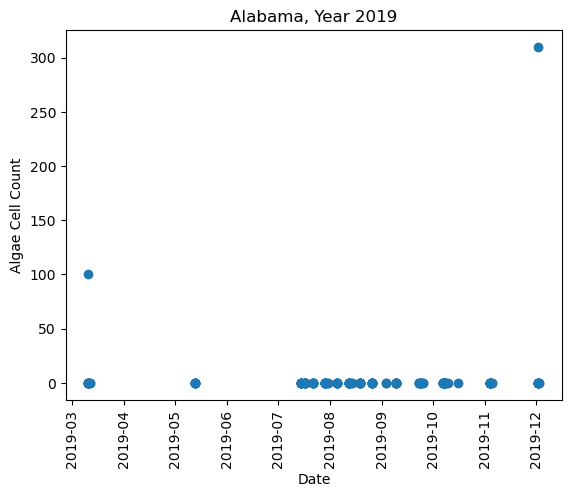

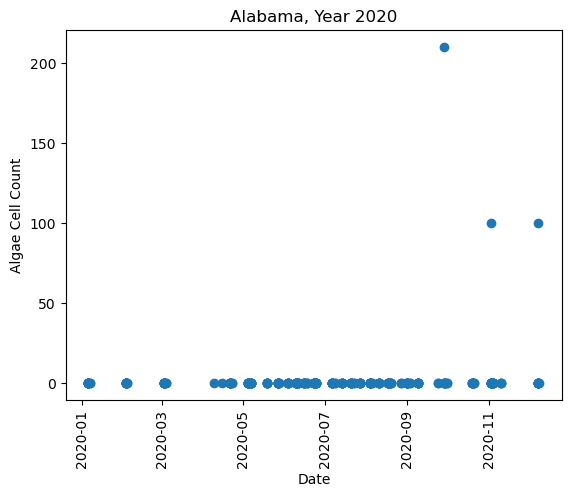

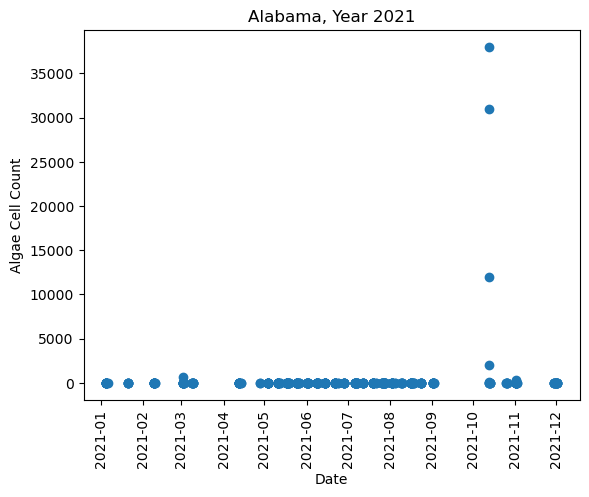

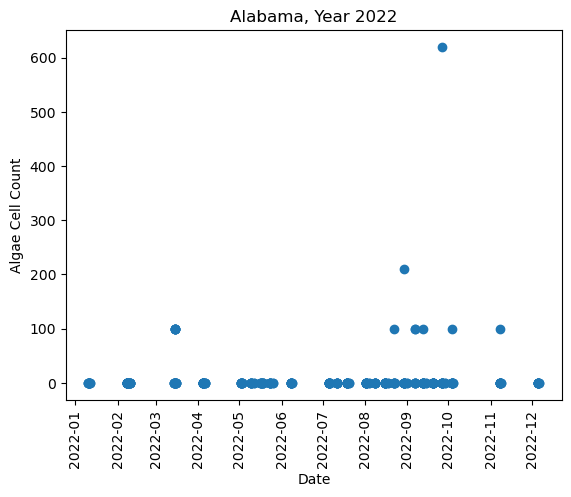

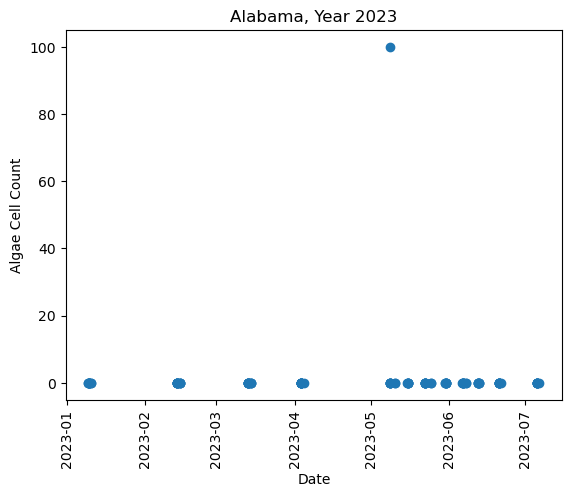

In [109]:
#Looking at the spacing of the sample dates
#abalabama['SAMPLE_DATE']

for i in range(2010,2024):
    plt.figure()
    y = abalabama.loc[(abalabama.SAMPLE_DATE >= datetime(i,1,1)) 
                      & (abalabama.SAMPLE_DATE < datetime(i+1,1,1))]['CELLCOUNT']
    x = abalabama.loc[(abalabama.SAMPLE_DATE >= datetime(i,1,1)) 
                      & (abalabama.SAMPLE_DATE < datetime(i+1,1,1))]['SAMPLE_DATE']

    plt.scatter(x,y)
    plt.title(f'Alabama, Year {i}')
    plt.xlabel('Date')
    plt.xticks(rotation=90)
    plt.ylabel('Algae Cell Count')
plt.show()
plt.close("all")

In [110]:
#Mississippi

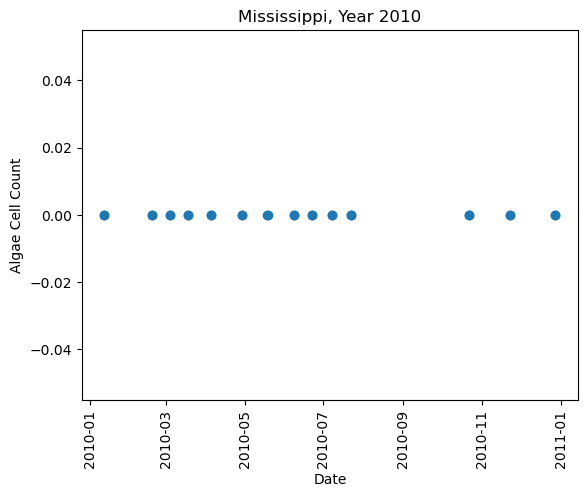

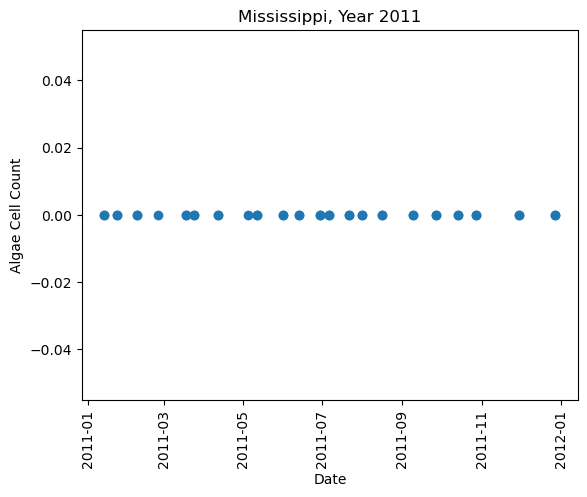

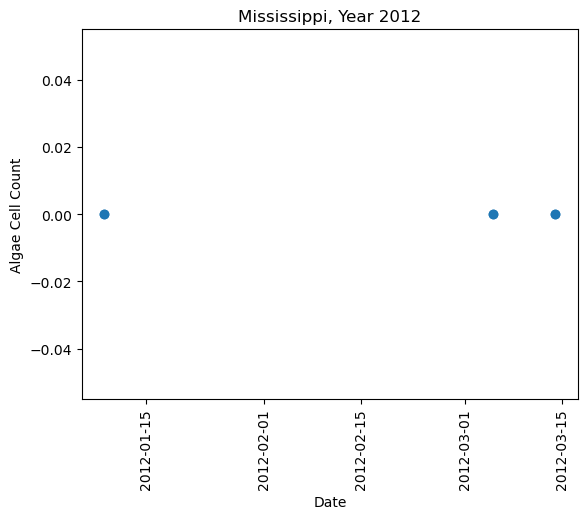

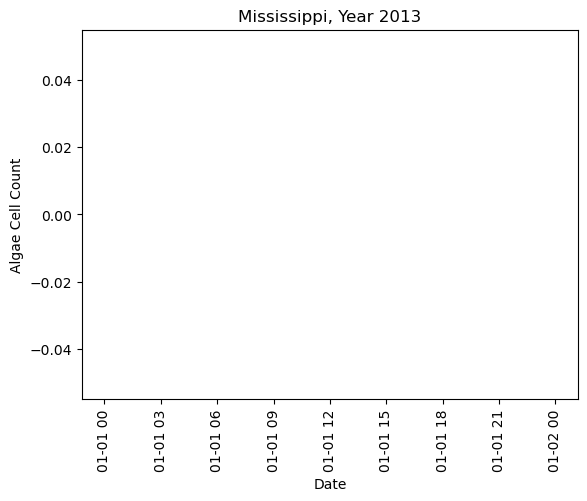

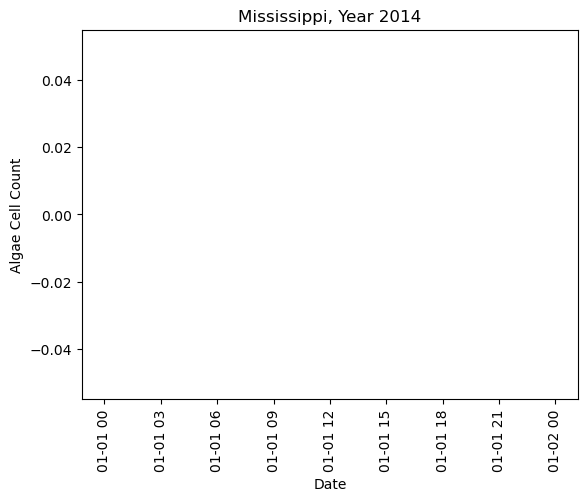

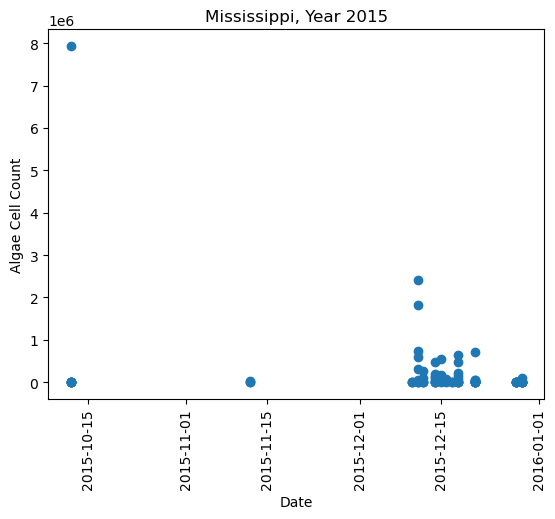

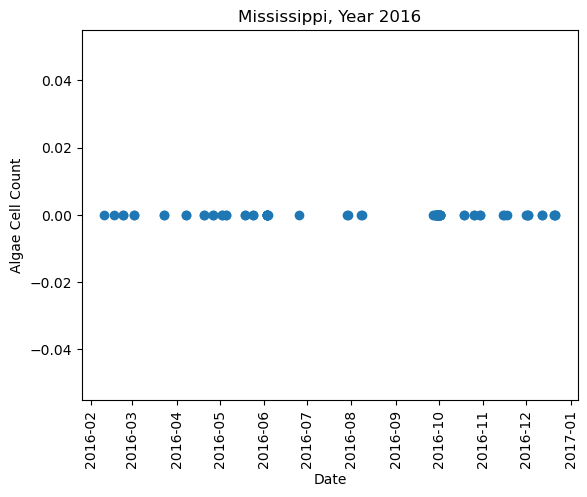

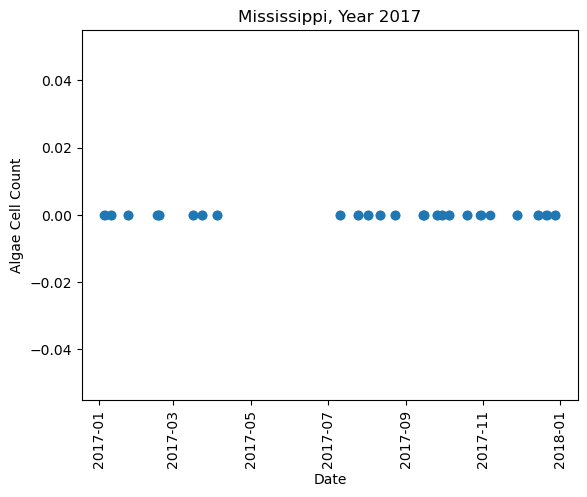

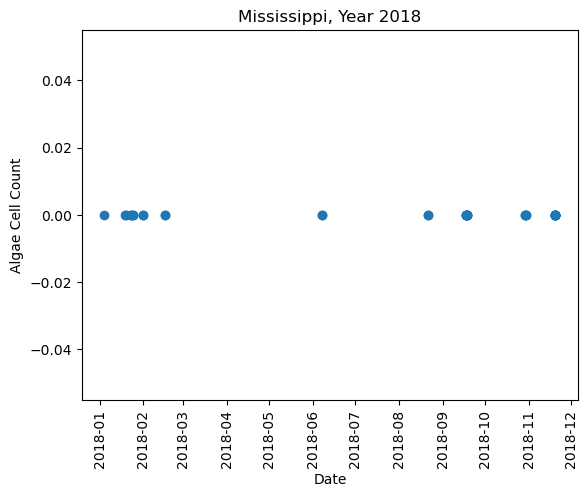

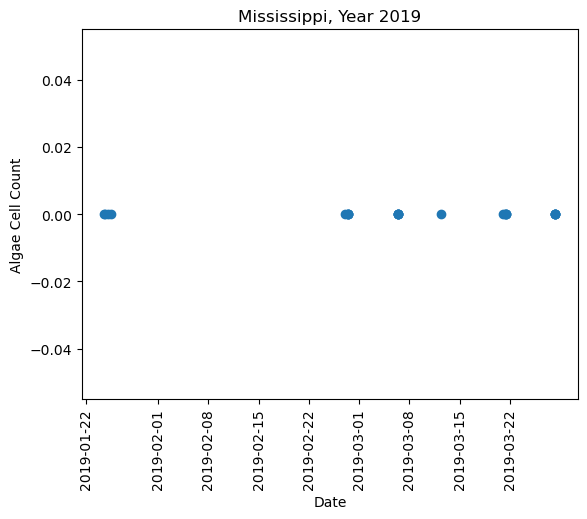

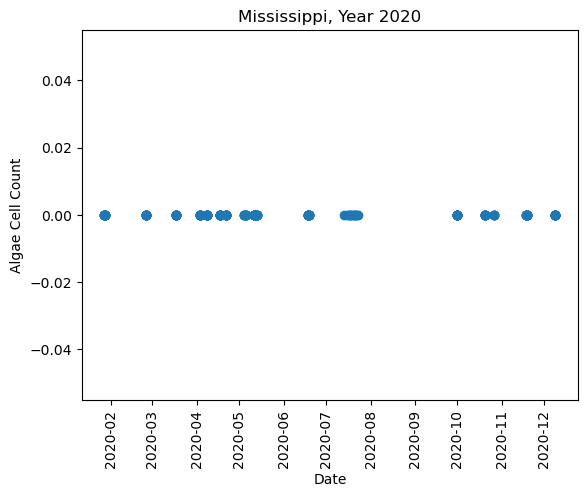

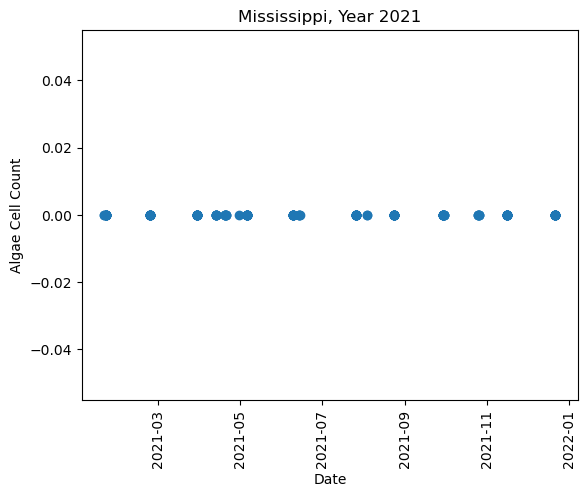

In [111]:
for i in range(2010,2022):
    plt.figure()
    y = abmississippi.loc[(abmississippi.SAMPLE_DATE >= datetime(i,1,1)) 
                      & (abmississippi.SAMPLE_DATE < datetime(i+1,1,1))]['CELLCOUNT']
    x = abmississippi.loc[(abmississippi.SAMPLE_DATE >= datetime(i,1,1)) 
                      & (abmississippi.SAMPLE_DATE < datetime(i+1,1,1))]['SAMPLE_DATE']

    plt.scatter(x,y)
    plt.title(f'Mississippi, Year {i}')
    plt.xlabel('Date')
    plt.xticks(rotation=90)
    plt.ylabel('Algae Cell Count')
plt.show()
plt.close("all")

### <span style=color:red> Mississippi is largly just zero other than the 2015 event (what happened?) we proabably shouldn't include Mississippi unless we just train on all the data and dont worry about regions</span>

In [112]:
#Texas

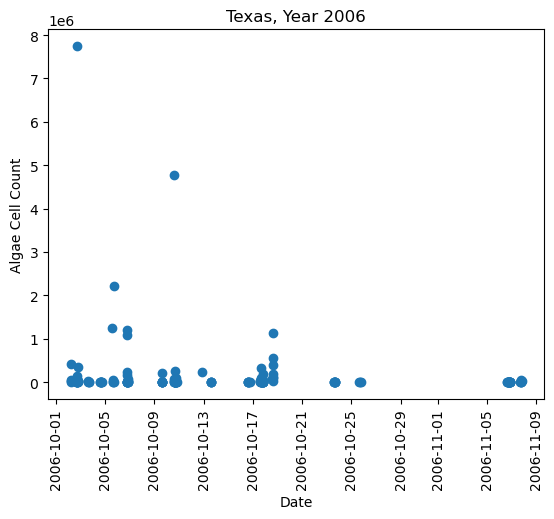

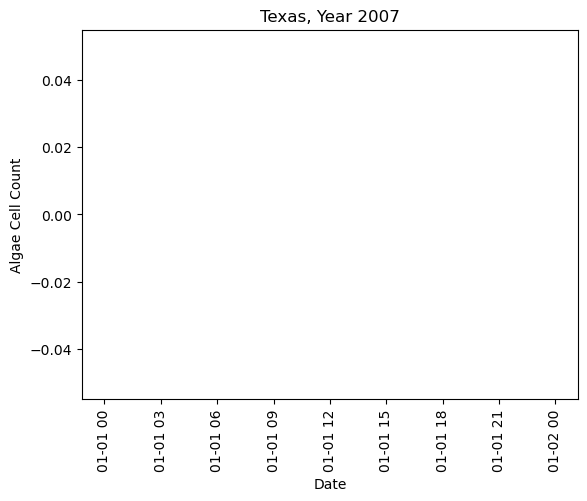

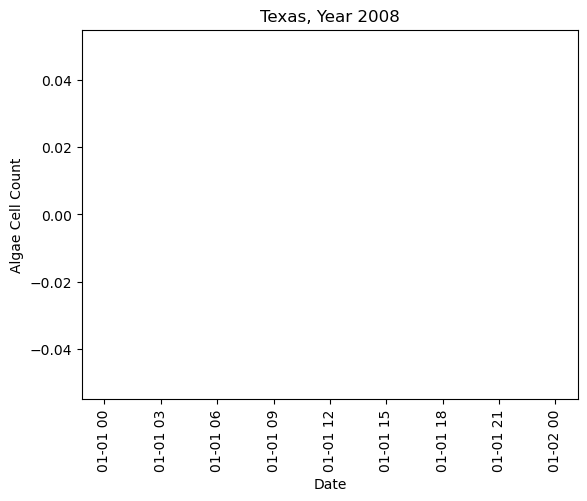

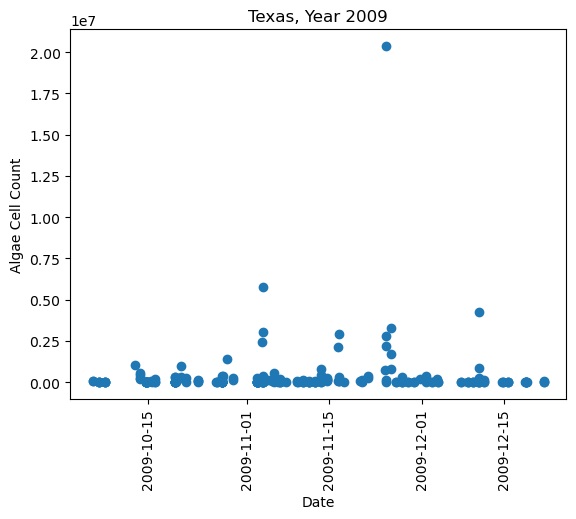

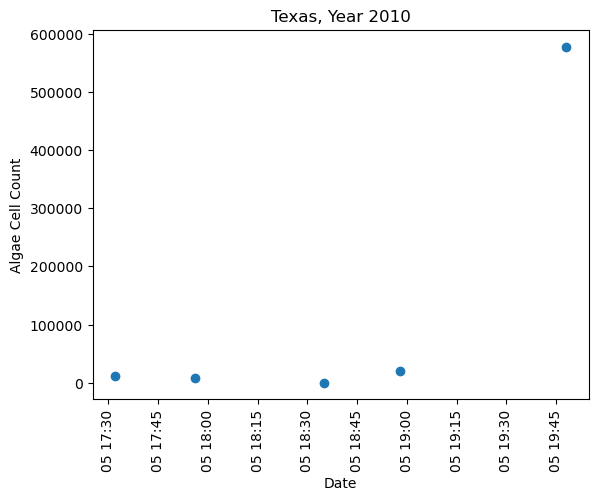

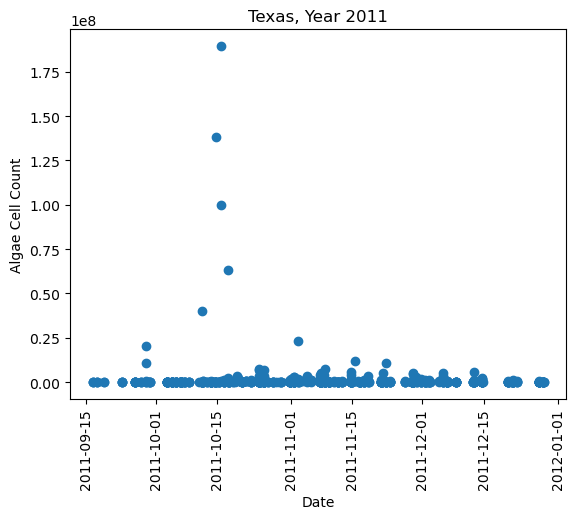

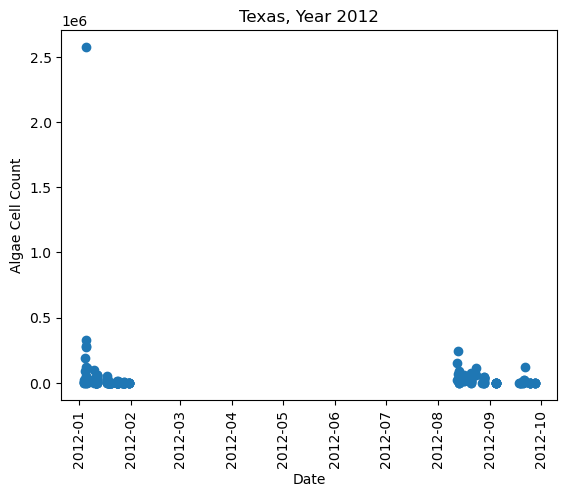

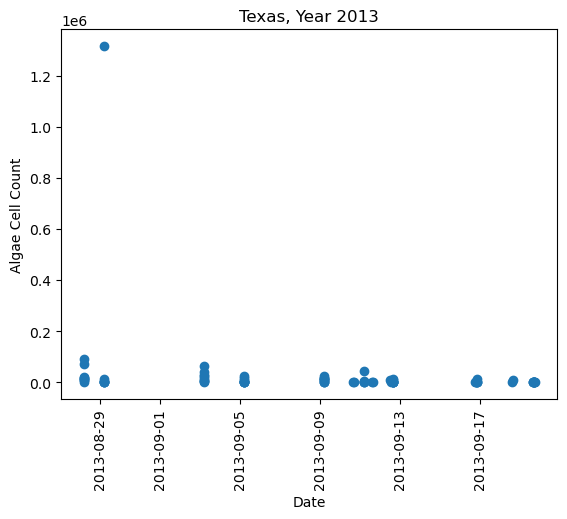

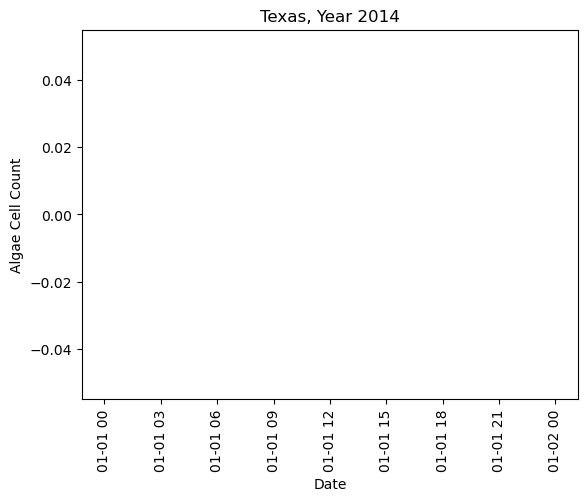

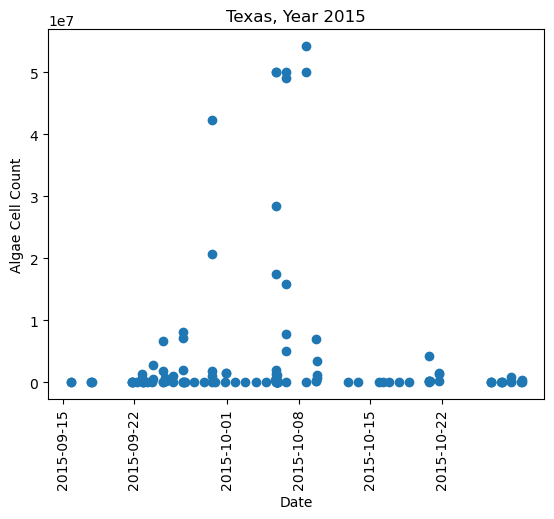

In [113]:
for i in range(2006,2016):
    plt.figure()
    y = abtexas.loc[(abtexas.SAMPLE_DATE >= datetime(i,1,1)) 
                      & (abtexas.SAMPLE_DATE < datetime(i+1,1,1))]['CELLCOUNT']
    x = abtexas.loc[(abtexas.SAMPLE_DATE >= datetime(i,1,1)) 
                      & (abtexas.SAMPLE_DATE < datetime(i+1,1,1))]['SAMPLE_DATE']

    plt.scatter(x,y)
    plt.title(f'Texas, Year {i}')
    plt.xlabel('Date')
    plt.xticks(rotation=90)
    plt.ylabel('Algae Cell Count')
plt.show()
plt.close("all")

### Texas seems to also havee bloom late in the year (around October) but this is largely a selection effect<span style=color:red> Even though there shouldn't be there seem to be some nans in the data.</span> <span style=color:blue> Need to look at these missing numbers along with the nans in the nan study</span>

In [114]:
#Florida

C:\Users\Peter Doze\AppData\Local\Temp\ipykernel_4308\3506050167.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


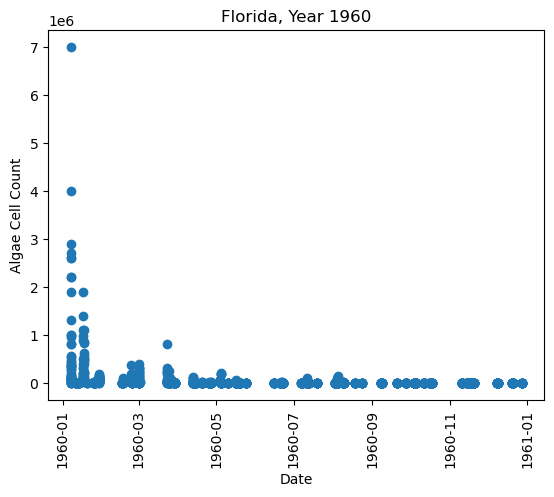

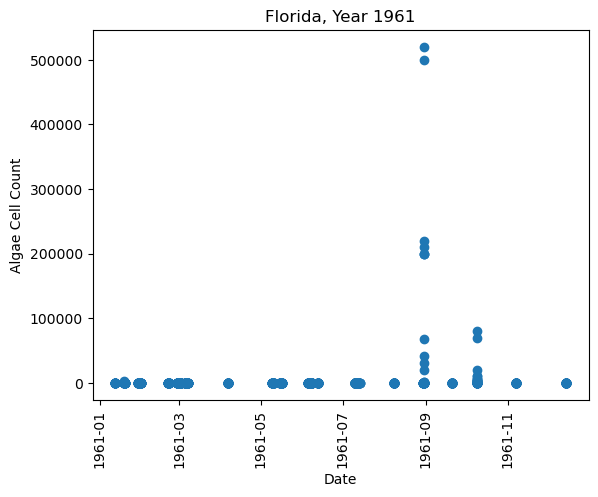

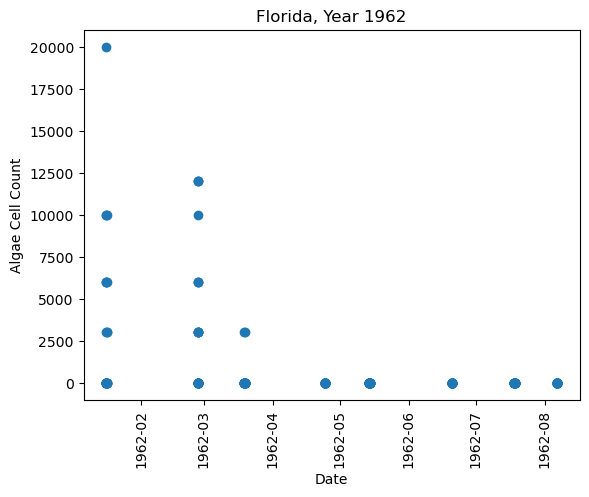

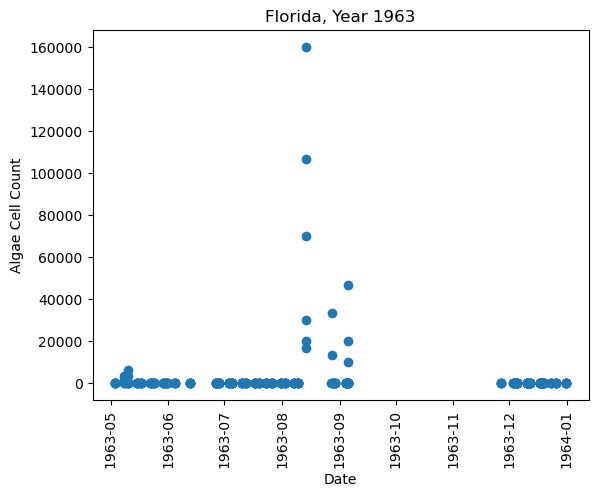

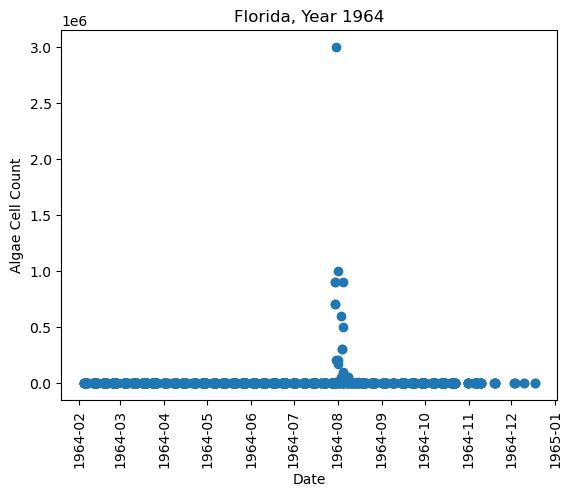

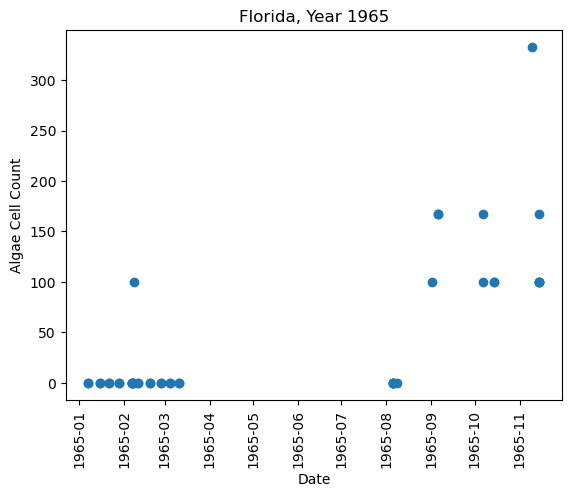

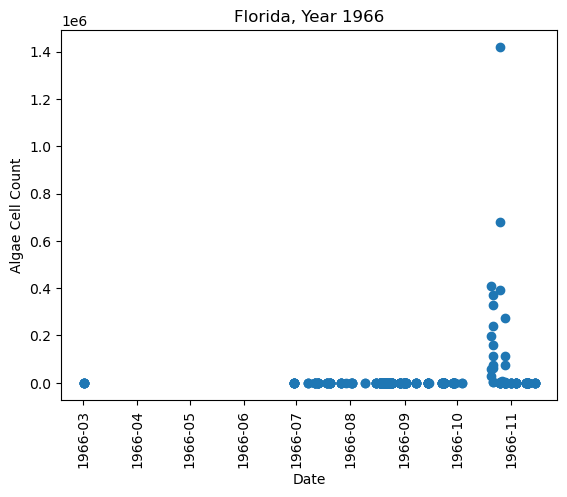

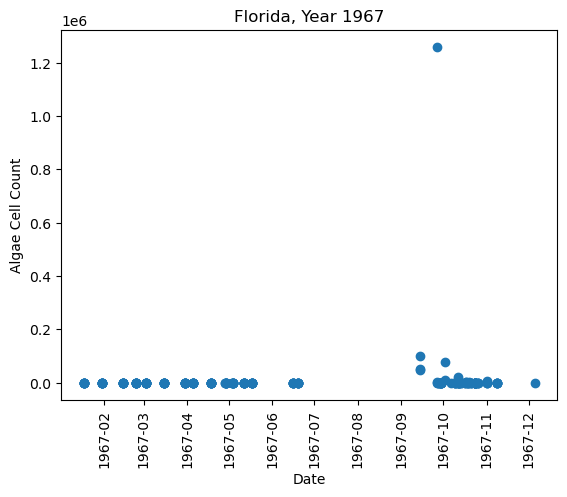

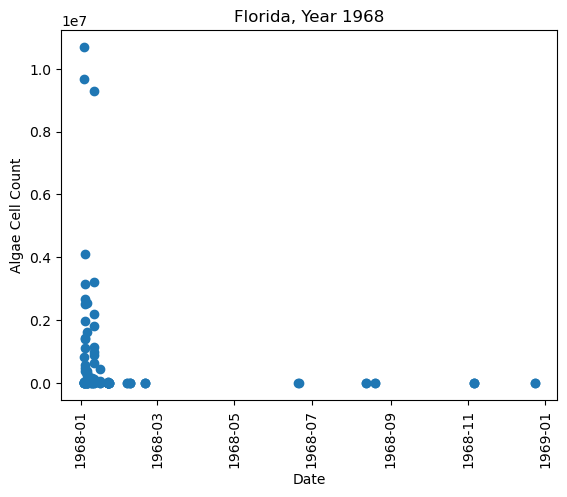

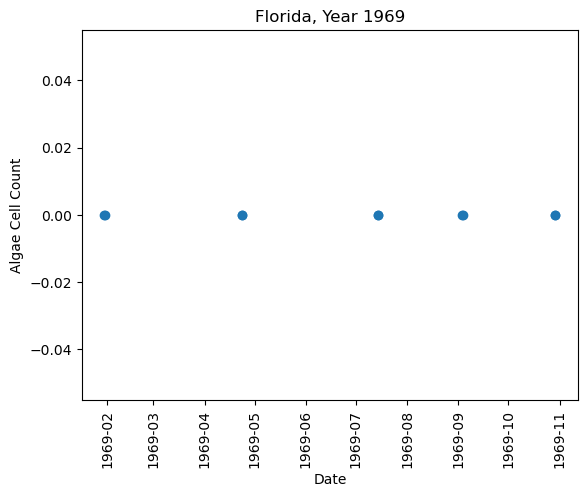

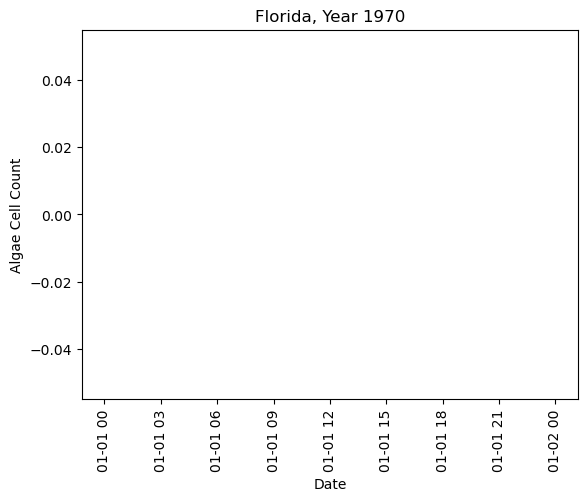

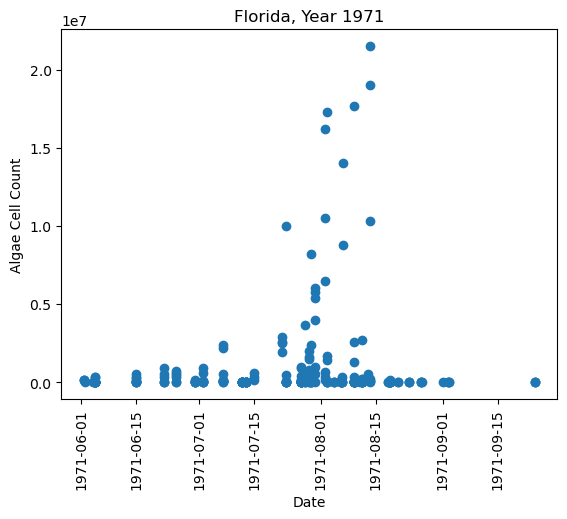

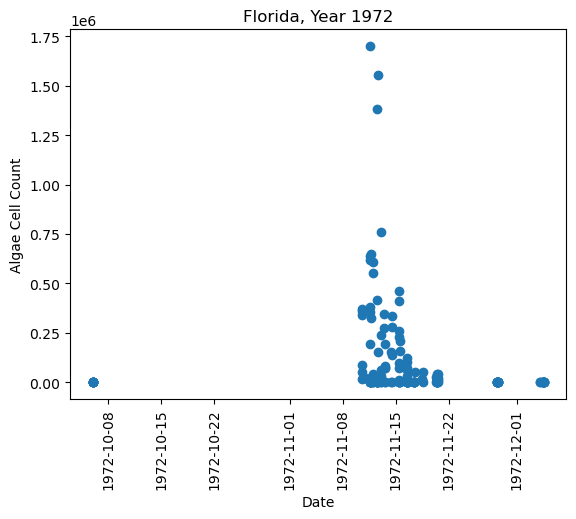

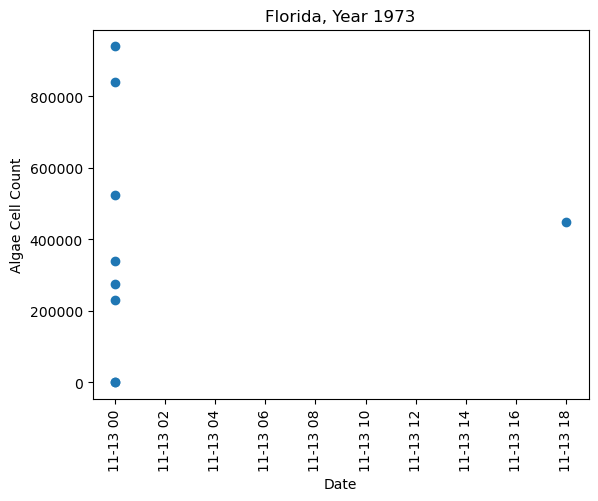

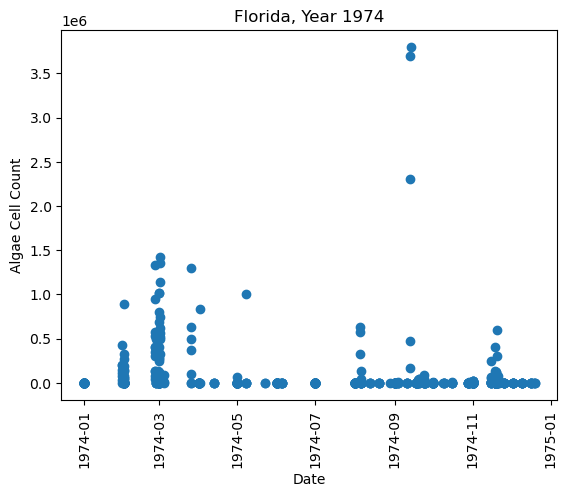

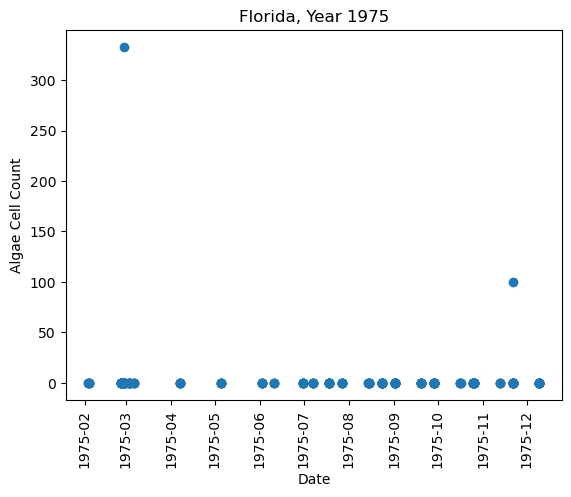

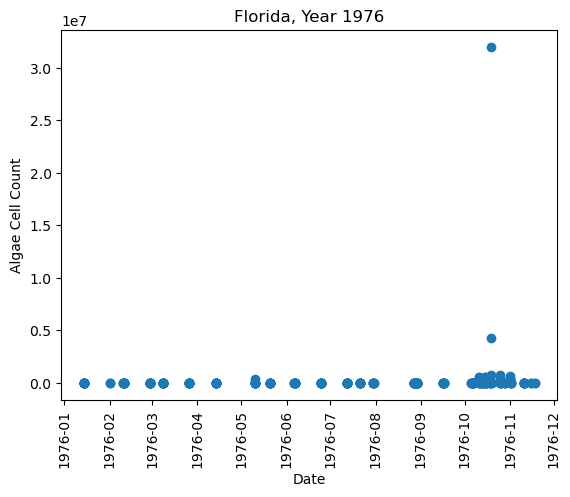

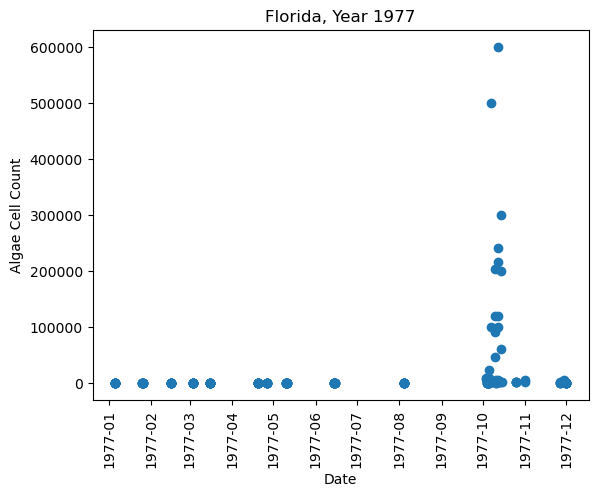

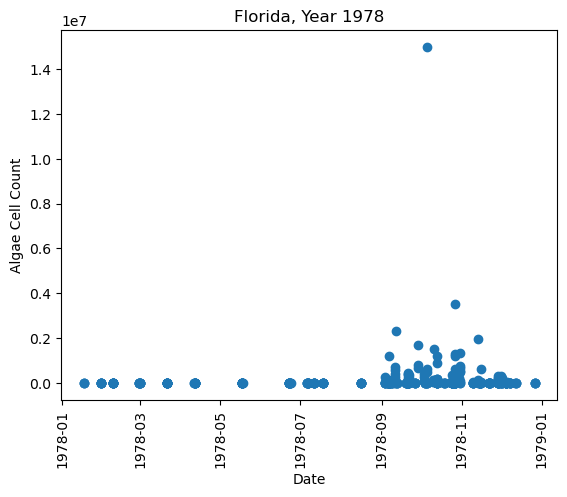

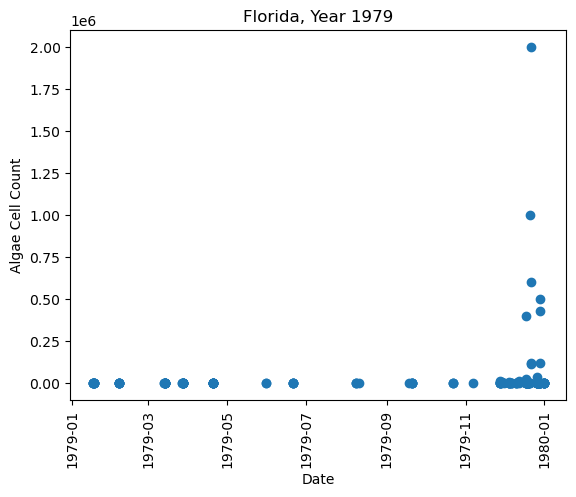

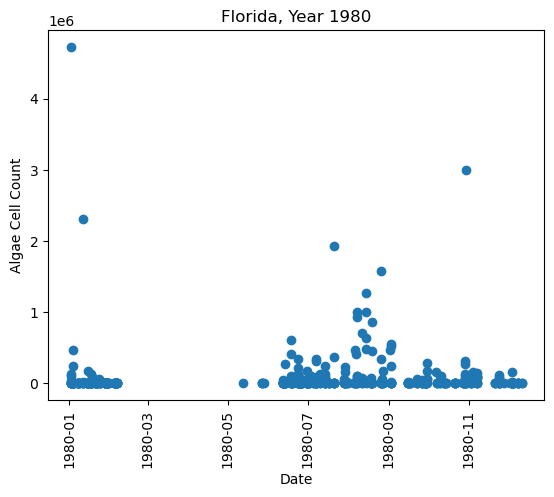

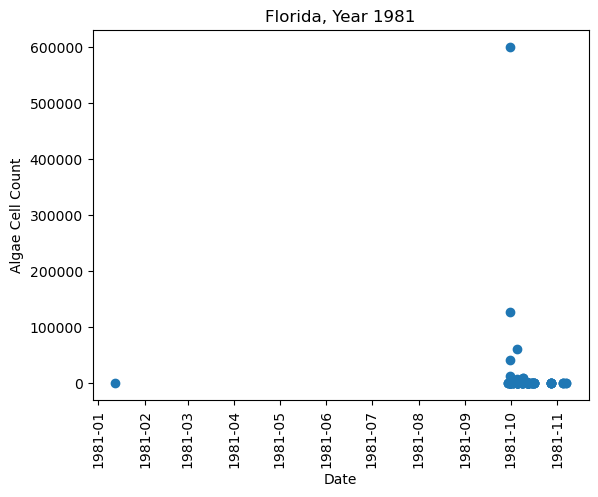

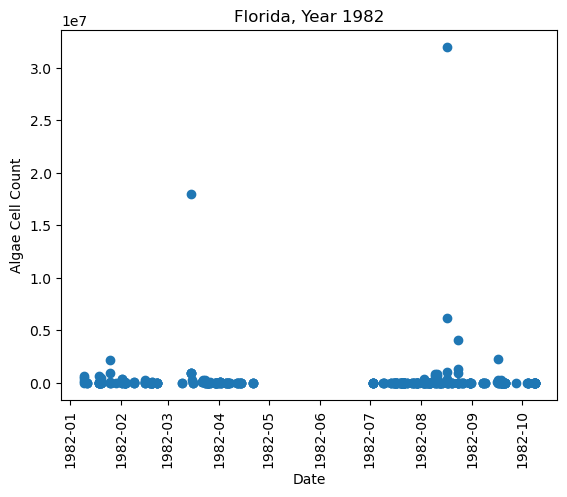

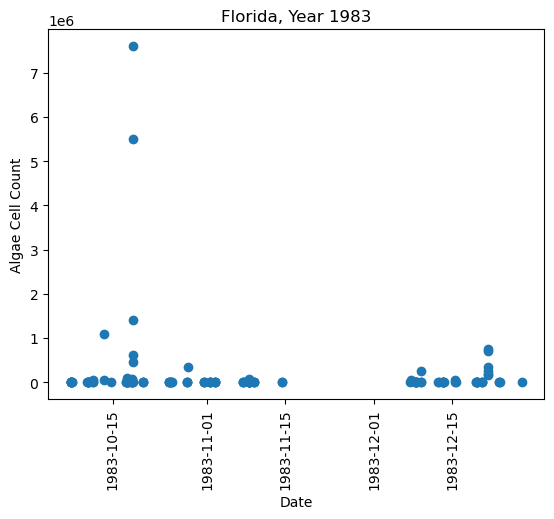

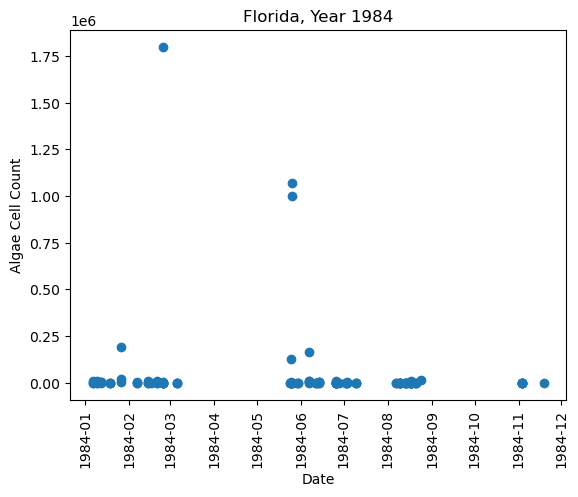

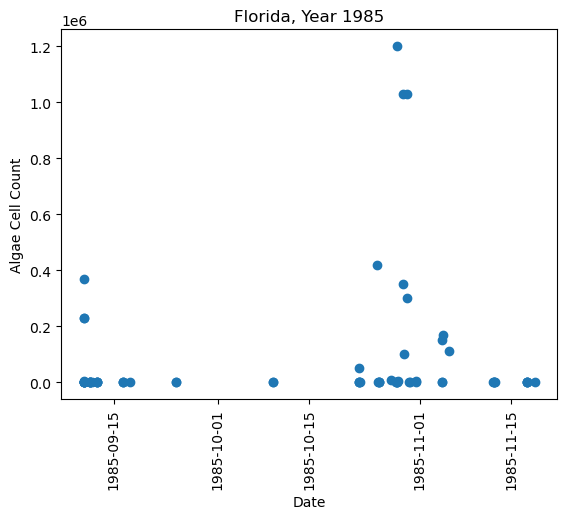

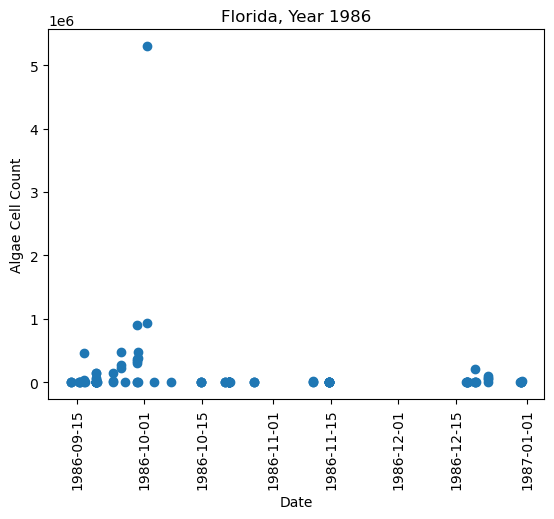

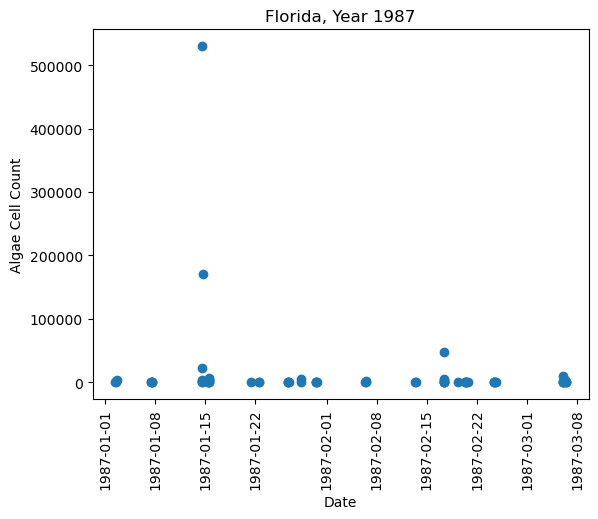

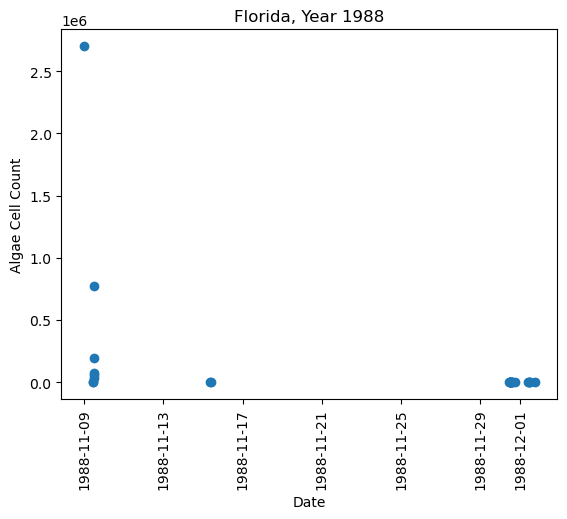

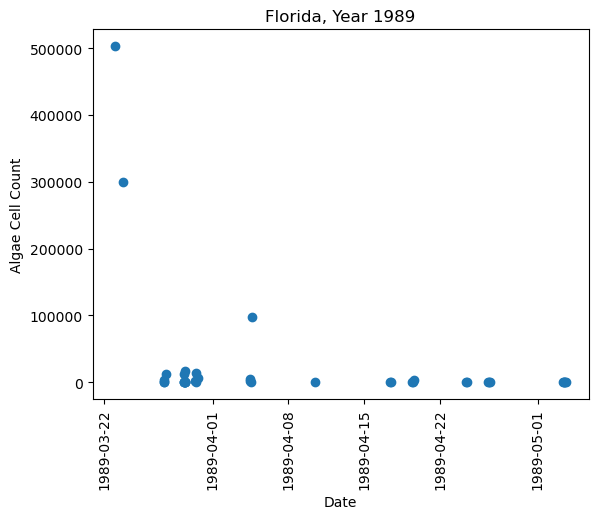

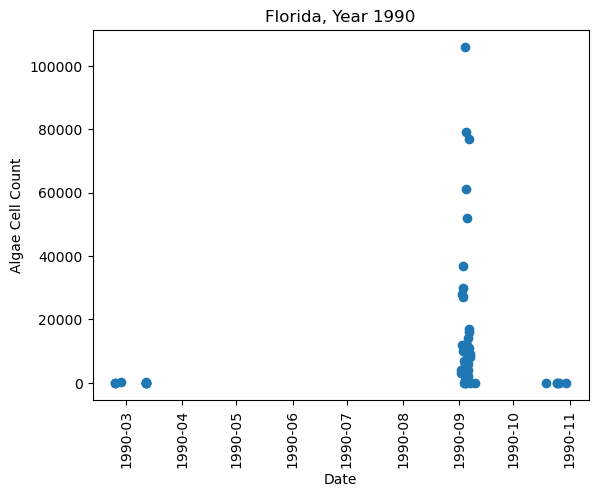

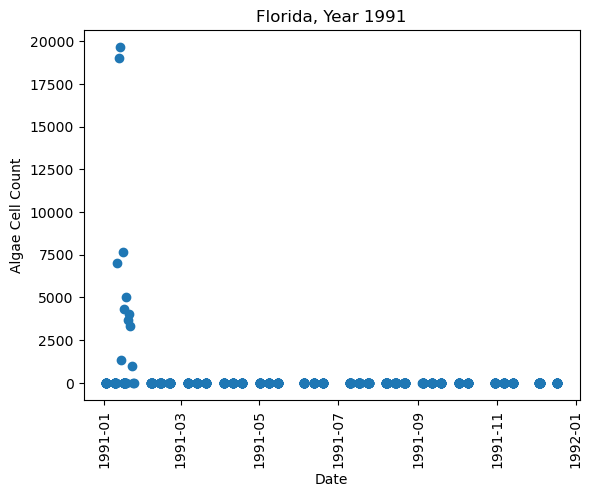

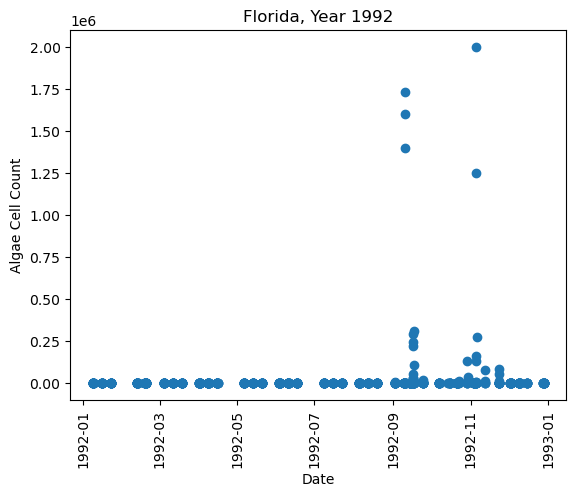

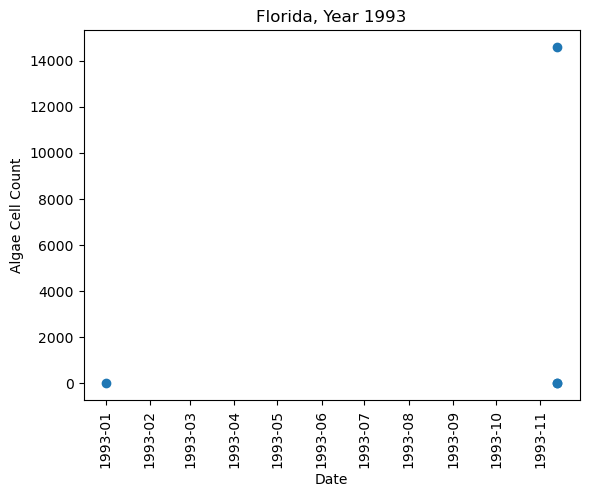

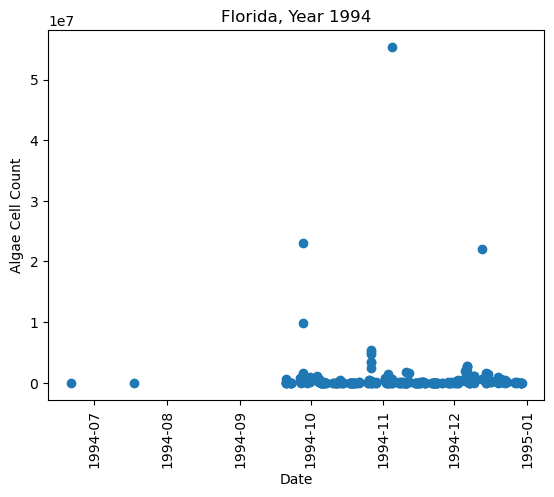

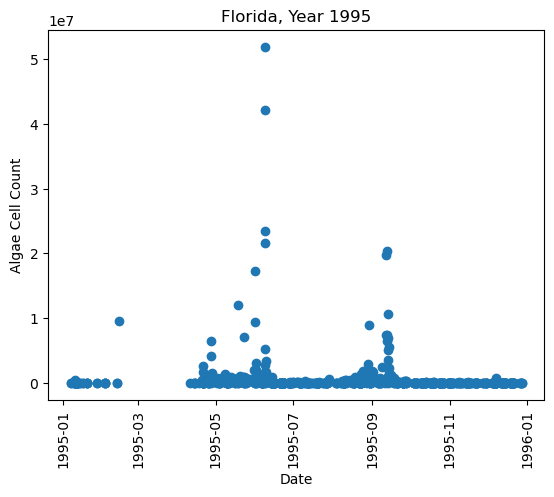

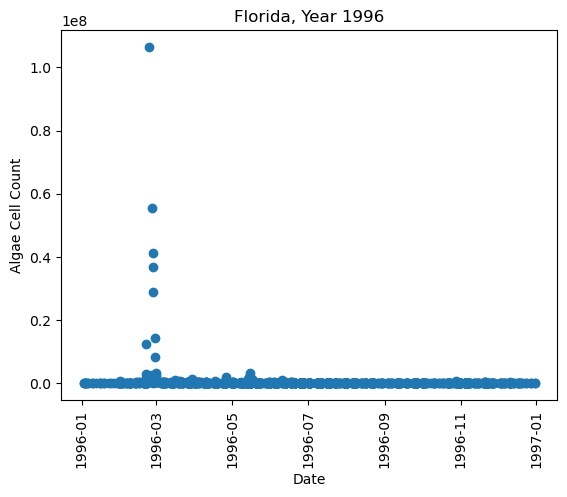

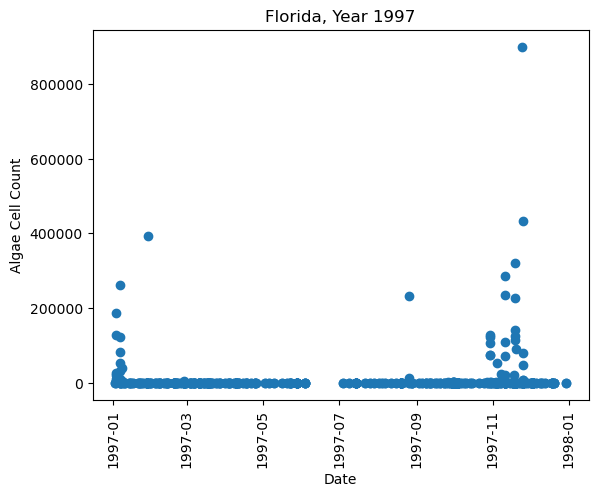

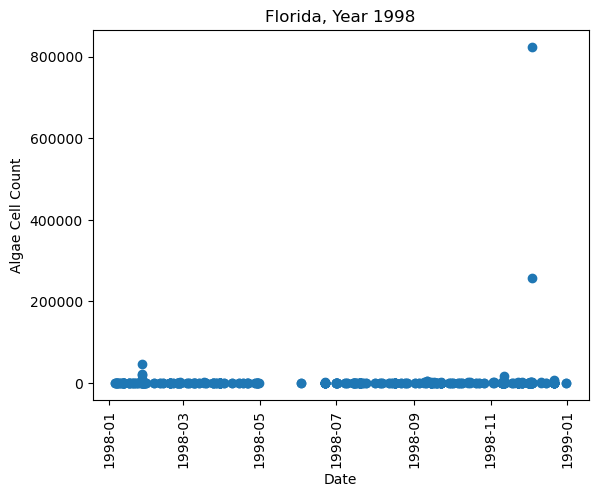

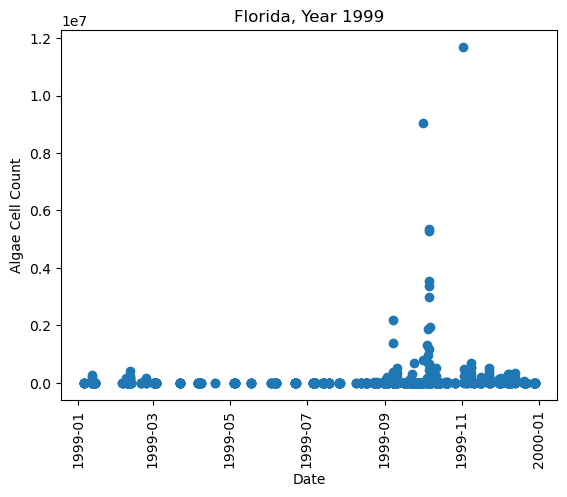

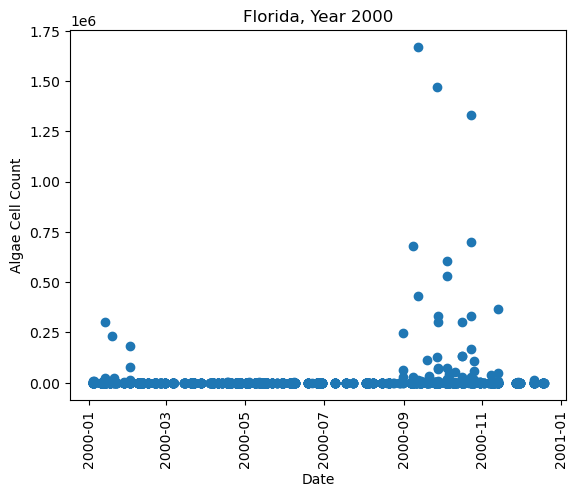

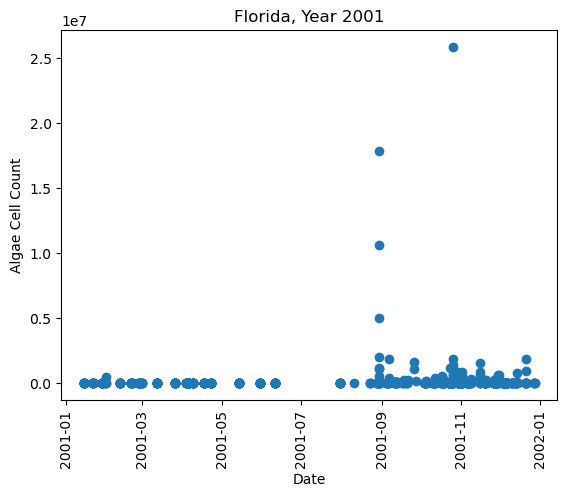

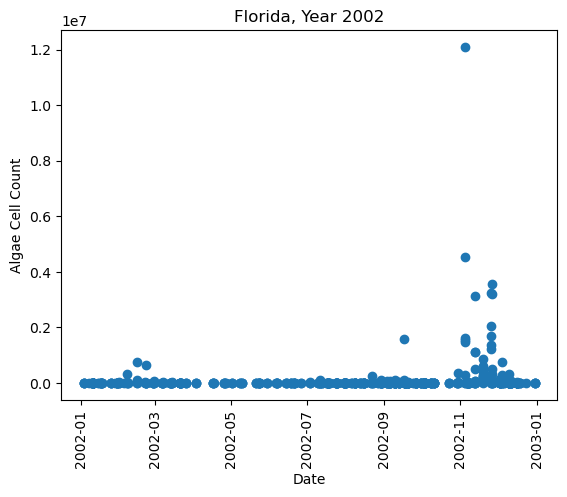

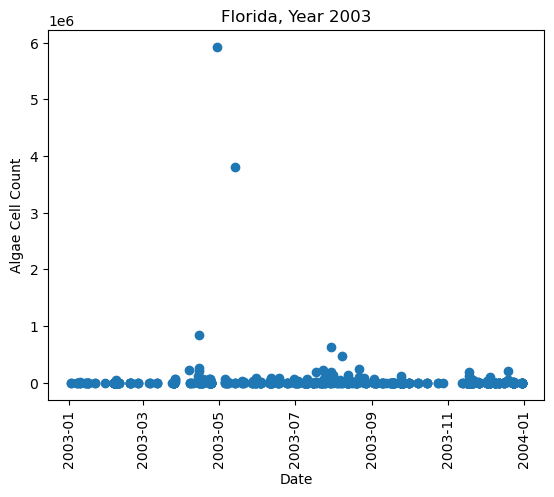

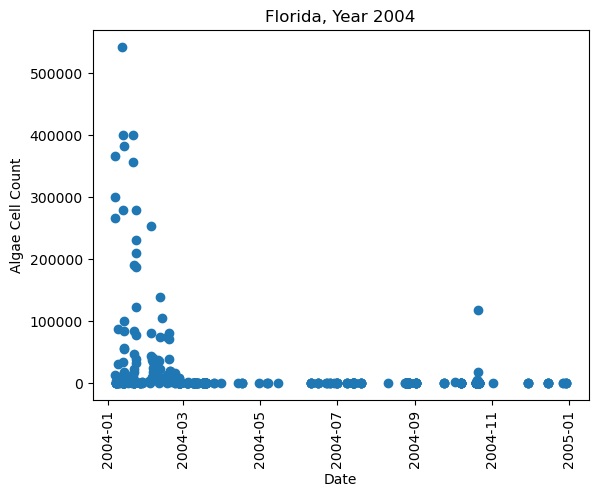

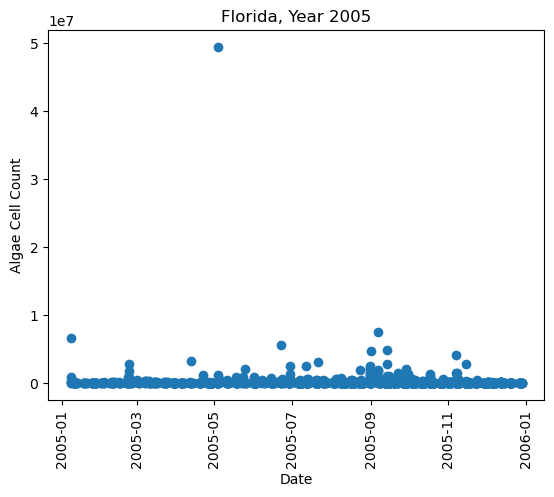

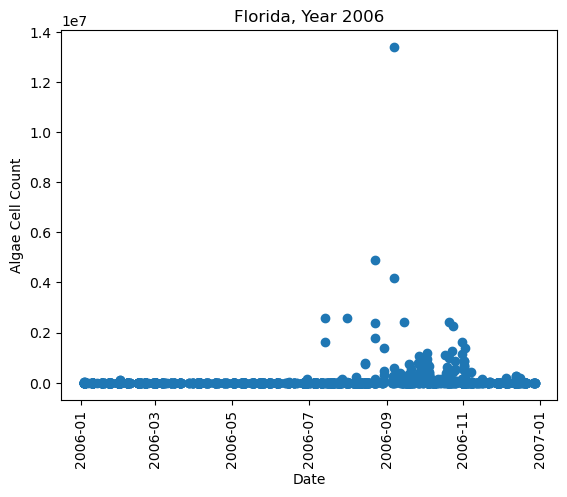

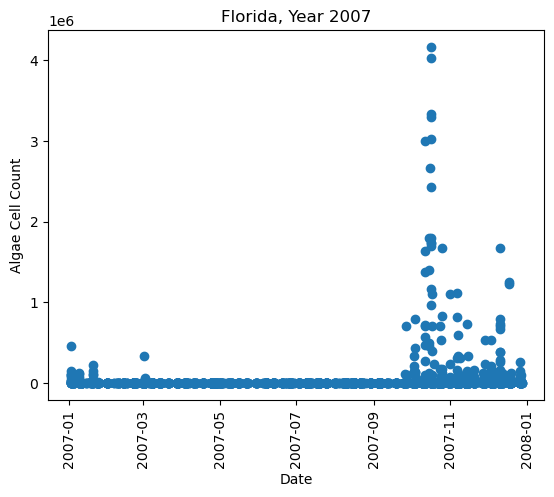

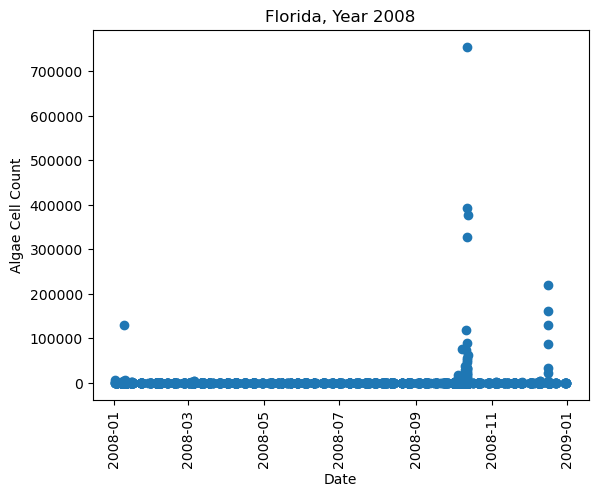

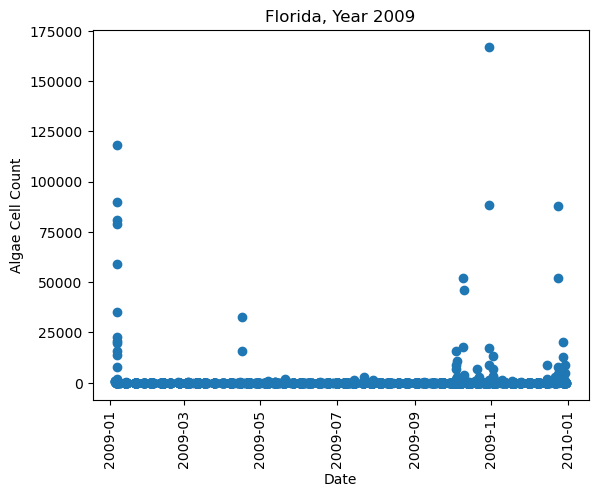

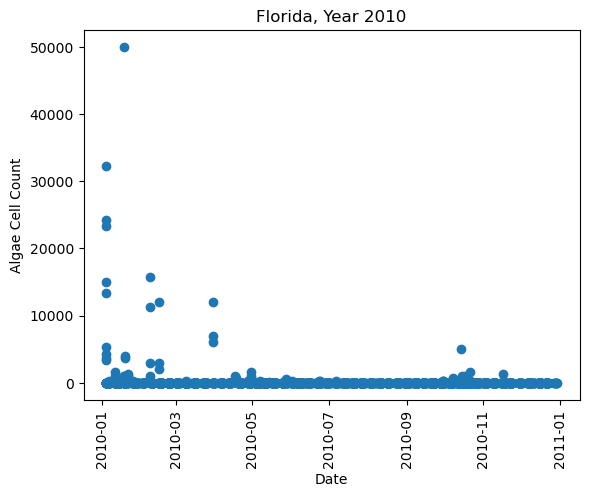

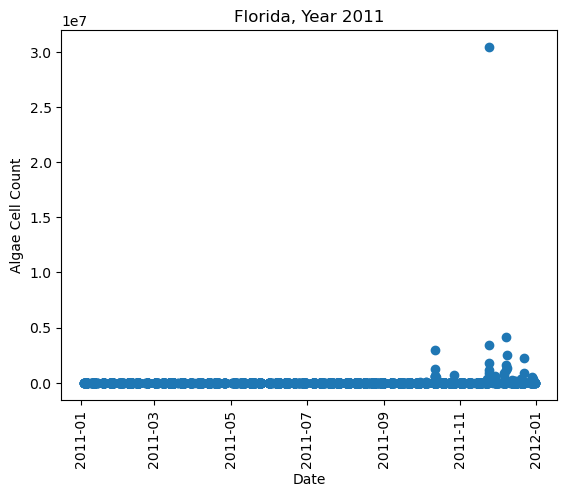

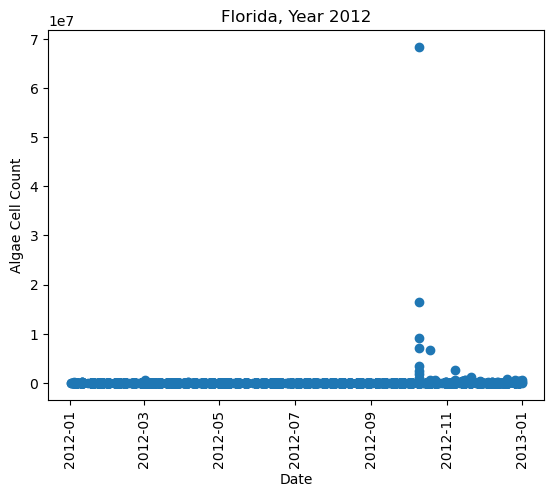

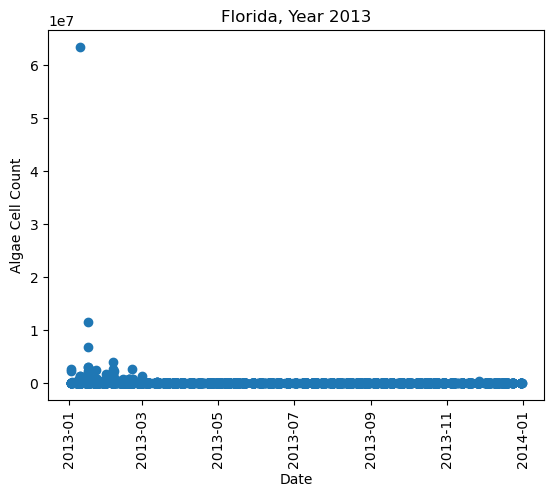

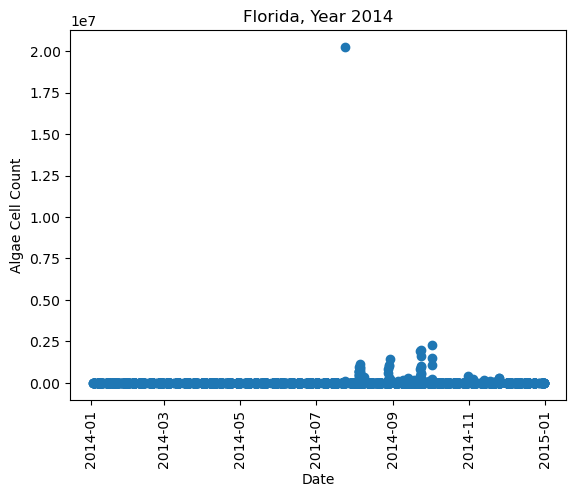

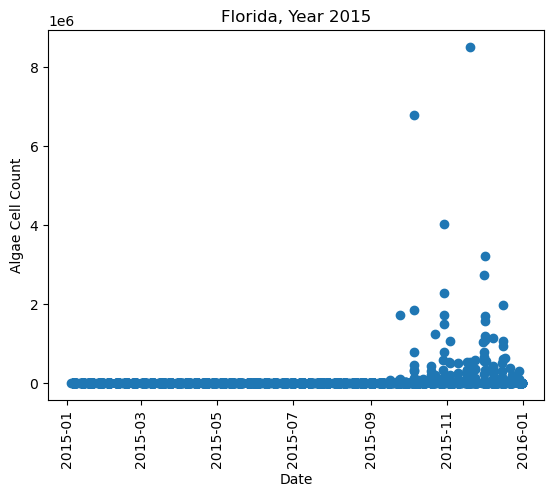

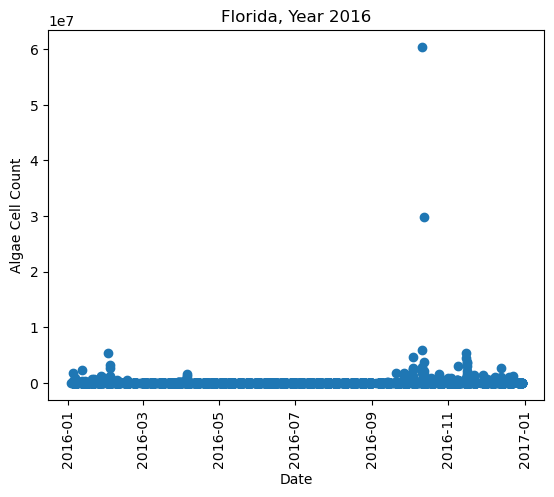

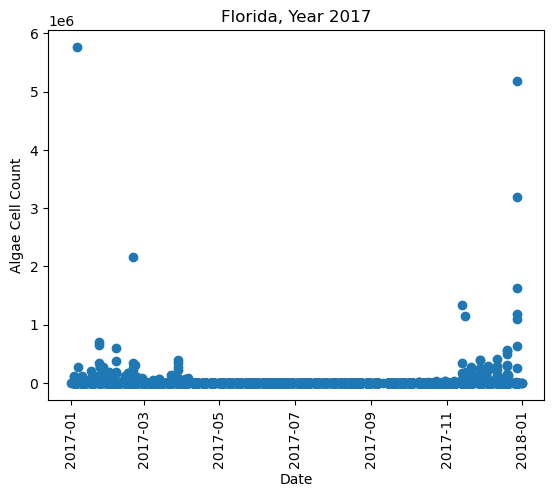

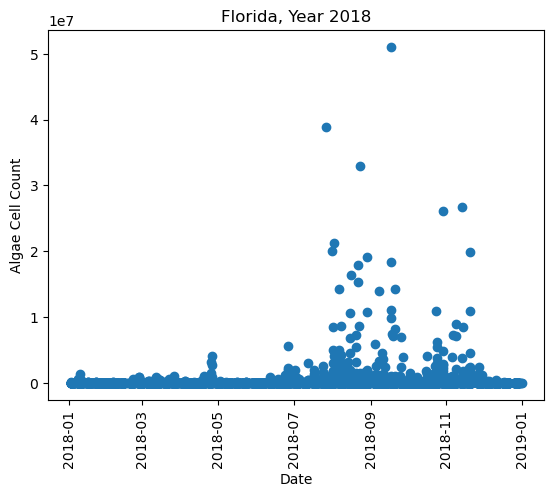

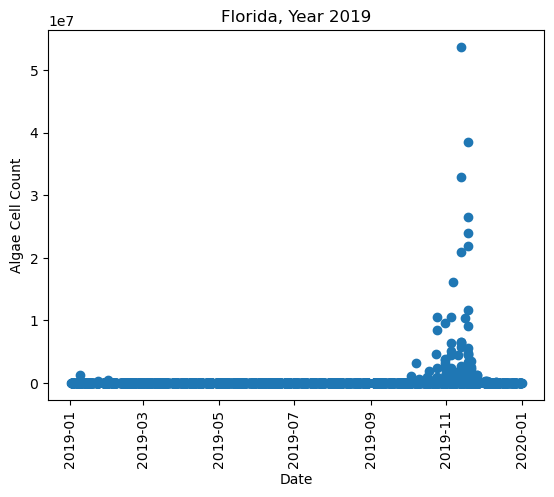

In [115]:
for i in range(1960,2020):
    plt.figure()
    y = abflorida.loc[(abflorida.SAMPLE_DATE >= datetime(i,1,1)) 
                      & (abflorida.SAMPLE_DATE < datetime(i+1,1,1))]['CELLCOUNT']
    x = abflorida.loc[(abflorida.SAMPLE_DATE >= datetime(i,1,1)) 
                      & (abflorida.SAMPLE_DATE < datetime(i+1,1,1))]['SAMPLE_DATE']

    plt.scatter(x,y)
    plt.title(f'Florida, Year {i}')
    plt.xlabel('Date')
    plt.xticks(rotation=90)
    plt.ylabel('Algae Cell Count')
plt.show()
plt.close("all")

In [116]:
#just to be sure
plt.close("all")

## <span style=color:red> The frequency of the measurements is not consistent, but there seems to be a pattern of blooms in mid year (around May) and in the last 3-4 months of the year (usually around October or December) for Alabama, Texas, and Florida. Due to the geography Alabama might be getting contaminated by Florida.</span> <span style=color:blue> Need to quantify the frequency of the measurements.</span> 

In [117]:
#Genus is the same for every state
print(abtexas['SPECIES'].unique(), abmississippi['SPECIES'].unique(), abalabama['SPECIES'].unique(), abflorida['SPECIES'].unique())

['brevis'] ['brevis'] ['brevis'] ['brevis']


### <span style=color:red> Every state has the same genus and species of aglae. I don't think this is a contributing factor</span>

## Looking at how many algae bloom spikes there are in a year to see if there is a trend

In [118]:
abflorida['SAMPLE_DATE'].sort_values()[0:4]

47013   1954-02-05 08:55:00
47014   1954-02-05 09:35:00
47015   1954-02-05 11:35:00
47016   1954-02-05 11:52:00
Name: SAMPLE_DATE, dtype: datetime64[ns]

In [119]:
#look for a spike relative to that year for now
def spikesinyear(catalog,year1,year2):
    catalogyearspikes = {}
    for i in range(year1,year2):
        x = catalog.loc[(catalog.SAMPLE_DATE >= datetime(i,1,1)) 
                          & (catalog.SAMPLE_DATE < datetime(i+1,1,1))]['CELLCOUNT']
        peakmetric = x.mean()+1 #peak is defined as greater than the mean
        spikes = len(catalog.loc[(catalog.SAMPLE_DATE >= datetime(i,1,1)) 
                      & (catalog.SAMPLE_DATE < datetime(i+1,1,1))
                      & (catalog.CELLCOUNT>=peakmetric)]['CELLCOUNT'])

                
        catalogyearspikes[i] = spikes
    return catalogyearspikes
 

In [120]:
       

#alabama
alabamayearspikes = spikesinyear(abalabama,2010,2024)
alabamayearspikes

{2010: 9,
 2011: 4,
 2012: 12,
 2013: 2,
 2014: 1,
 2015: 11,
 2016: 13,
 2017: 4,
 2018: 5,
 2019: 2,
 2020: 3,
 2021: 6,
 2022: 14,
 2023: 1}

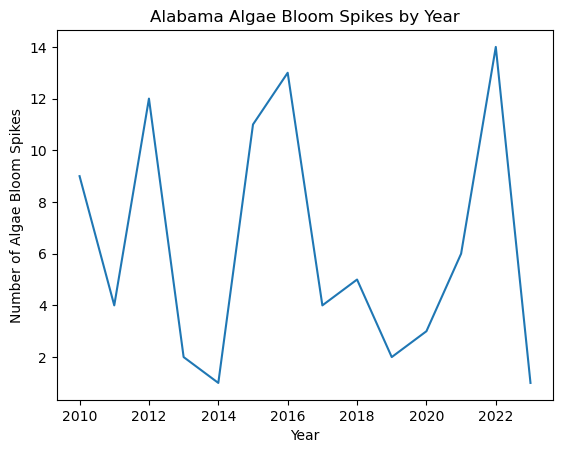

In [121]:
plt.plot(alabamayearspikes.keys(), alabamayearspikes.values())
plt.title('Alabama Algae Bloom Spikes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Algae Bloom Spikes')
plt.show()
plt.close()

In [122]:
#florida
floridayearspikes = spikesinyear(abflorida,1960,2020)
floridayearspikes

{1960: 152,
 1961: 25,
 1962: 25,
 1963: 14,
 1964: 22,
 1965: 14,
 1966: 17,
 1967: 8,
 1968: 20,
 1969: 0,
 1970: 0,
 1971: 34,
 1972: 33,
 1973: 4,
 1974: 83,
 1975: 2,
 1976: 16,
 1977: 15,
 1978: 49,
 1979: 10,
 1980: 71,
 1981: 5,
 1982: 35,
 1983: 13,
 1984: 6,
 1985: 13,
 1986: 16,
 1987: 4,
 1988: 3,
 1989: 3,
 1990: 12,
 1991: 11,
 1992: 21,
 1993: 1,
 1994: 39,
 1995: 113,
 1996: 75,
 1997: 38,
 1998: 12,
 1999: 85,
 2000: 61,
 2001: 48,
 2002: 41,
 2003: 70,
 2004: 53,
 2005: 262,
 2006: 146,
 2007: 129,
 2008: 47,
 2009: 75,
 2010: 63,
 2011: 90,
 2012: 142,
 2013: 176,
 2014: 163,
 2015: 146,
 2016: 327,
 2017: 218,
 2018: 471,
 2019: 196}

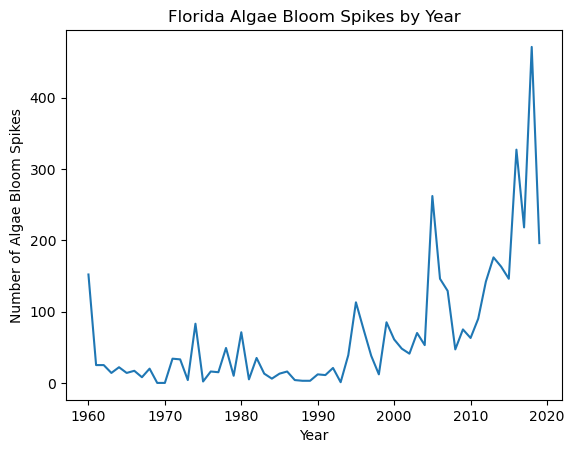

In [123]:
plt.plot(floridayearspikes.keys(), floridayearspikes.values())
plt.title('Florida Algae Bloom Spikes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Algae Bloom Spikes')
plt.show()
plt.close()

In [124]:
#mississippi
mississippiyearspikes = spikesinyear(abmississippi,2010,2022)
mississippiyearspikes

{2010: 0,
 2011: 0,
 2012: 0,
 2013: 0,
 2014: 0,
 2015: 12,
 2016: 0,
 2017: 0,
 2018: 0,
 2019: 0,
 2020: 0,
 2021: 0}

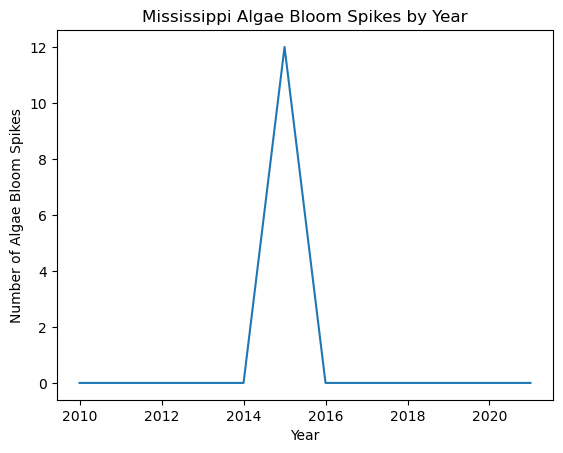

In [125]:
plt.plot(mississippiyearspikes.keys(), mississippiyearspikes.values())
plt.title('Mississippi Algae Bloom Spikes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Algae Bloom Spikes')
plt.show()
plt.close()

In [126]:
#texas
texasyearspikes = spikesinyear(abtexas,2006,2016)
texasyearspikes

{2006: 19,
 2007: 0,
 2008: 0,
 2009: 30,
 2010: 1,
 2011: 61,
 2012: 33,
 2013: 7,
 2014: 0,
 2015: 17}

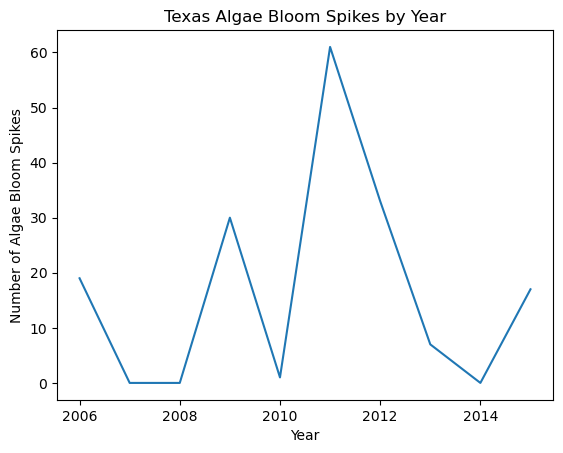

In [127]:
plt.plot(texasyearspikes.keys(), texasyearspikes.values())
plt.title('Texas Algae Bloom Spikes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Algae Bloom Spikes')
plt.show()
plt.close()

## <span style=color:purple> It is kind of hard to tell by eye but I think there might be a trend of there being more blooms in the later years at least with Florida. Florida is the only state with a long enough history. Regardless we might want to think about a supplementary analysis that simply quantifies if there is a trend (mine time series analysis)</span>

## Lets try to look at each year but for the whole data

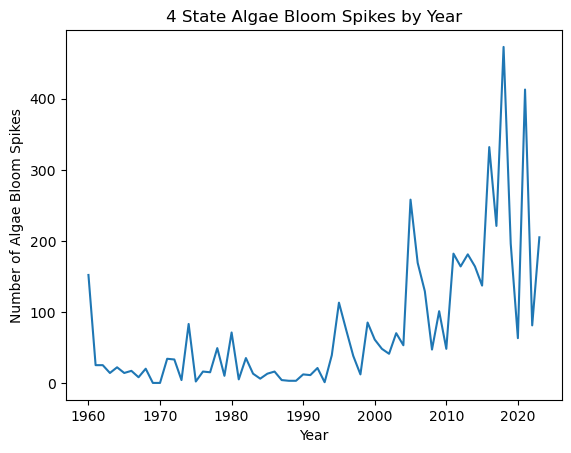

In [128]:
#First the whole (most of) time range
totalyearspikes = spikesinyear(AB2,1960,2024)

plt.plot(totalyearspikes.keys(), totalyearspikes.values())
plt.title('4 State Algae Bloom Spikes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Algae Bloom Spikes')
plt.show()
plt.close()

## <span style=color:red> Data is undoubtedly being dominated by Florida </span>

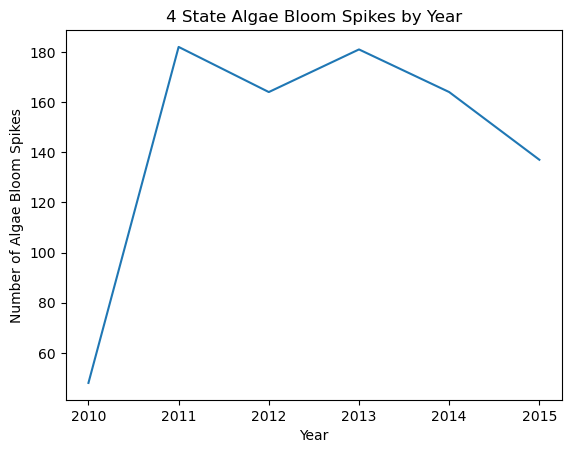

In [129]:
#Now lets try over a range where there is data for everyone
totalyearspikes = spikesinyear(AB2,2010,2016)

plt.plot(totalyearspikes.keys(), totalyearspikes.values())
plt.title('4 State Algae Bloom Spikes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Algae Bloom Spikes')
plt.show()
plt.close()

## <span style=color:purple>The years are too few, we'll probably have to just use all the data together if we can't find a latittude dependencey. Then test it on Florida?</span>

## Let's compare non nan and nan data

In [130]:
AB3 = ab.loc[(ab['SALINITY'].isna()) & (ab['WATER_TEMP'].isna())]
abtexasnan = AB3.loc[AB3['STATE_ID'] == 'TX']
abfloridanan = AB3.loc[AB3['STATE_ID'] == 'FL']
abmississippinan = AB3.loc[AB3['STATE_ID'] == 'MS']
abalabamanan = AB3.loc[AB3['STATE_ID'] == 'AL']

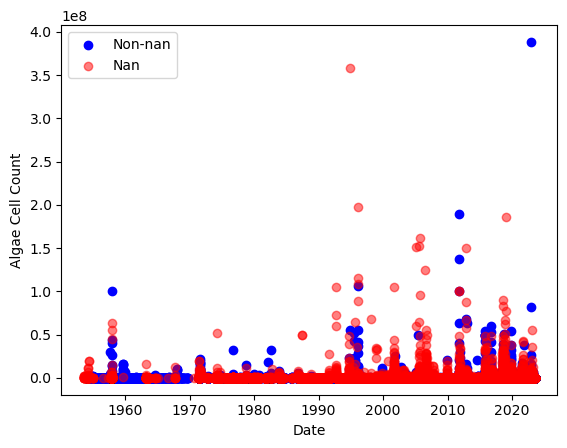

In [195]:
plt.scatter(AB2['SAMPLE_DATE'],AB2['CELLCOUNT'], c="b", label="Non-nan")
plt.scatter(AB3['SAMPLE_DATE'],AB3['CELLCOUNT'], alpha=0.5, c="r", label="Nan")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Algae Cell Count')
plt.show()

C:\Users\Peter Doze\AppData\Local\Temp\ipykernel_4308\216493596.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


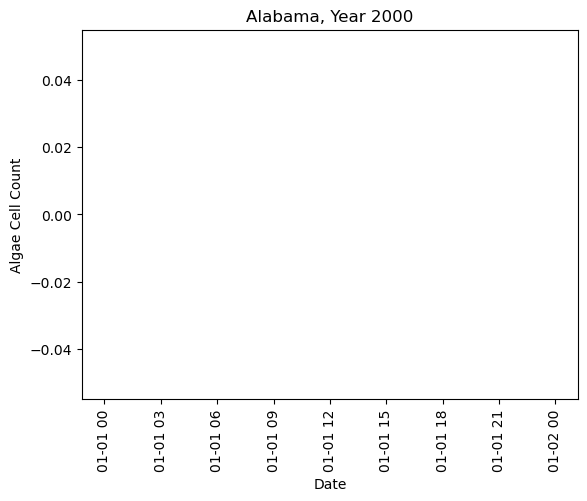

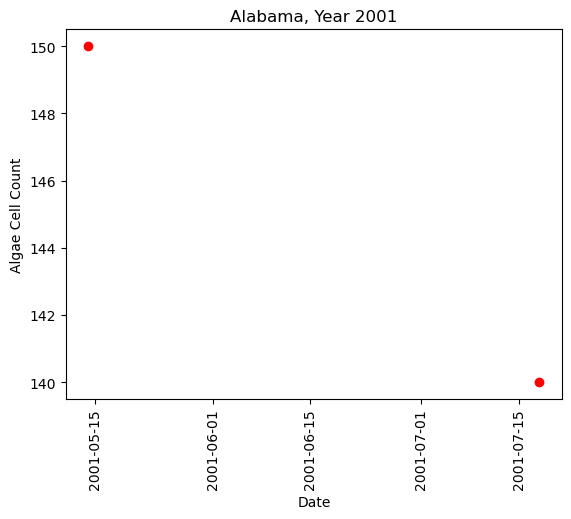

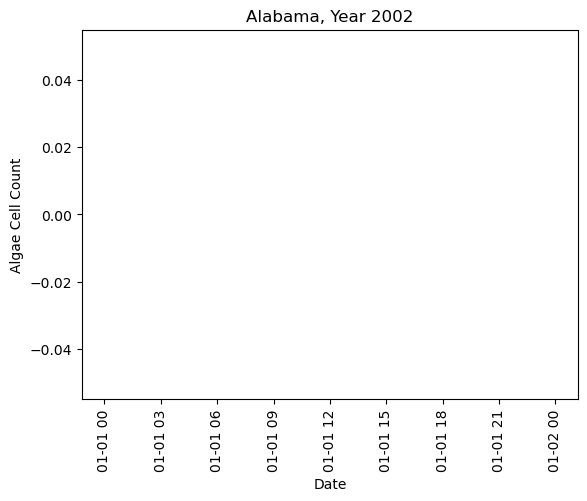

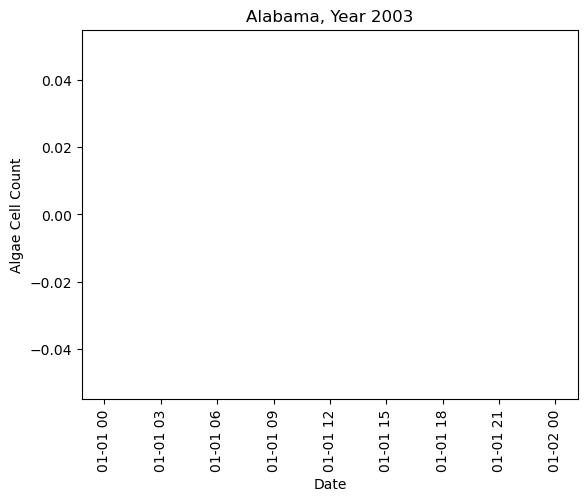

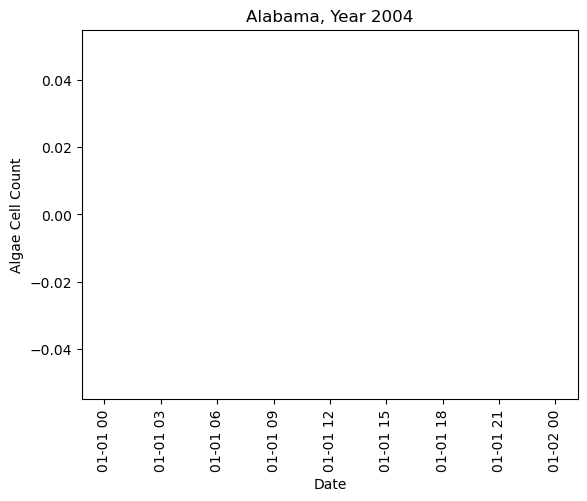

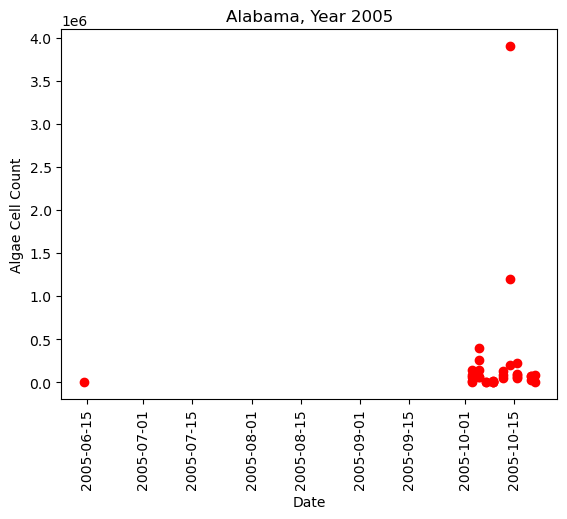

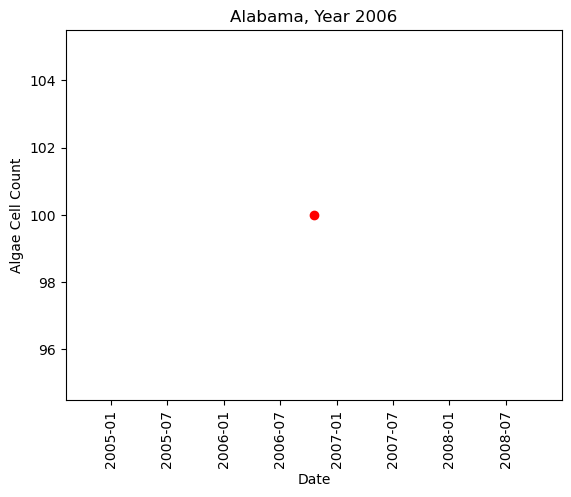

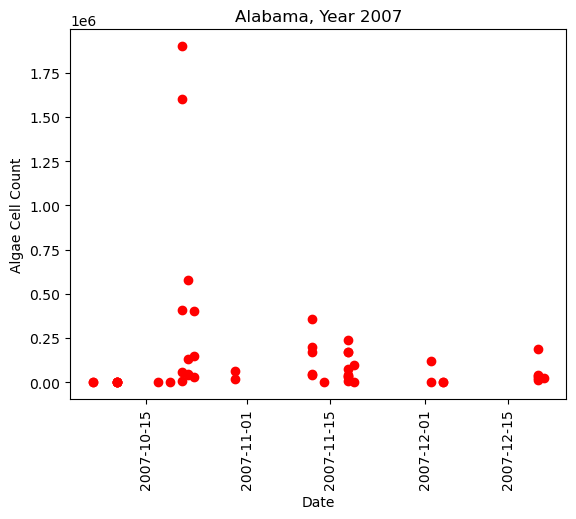

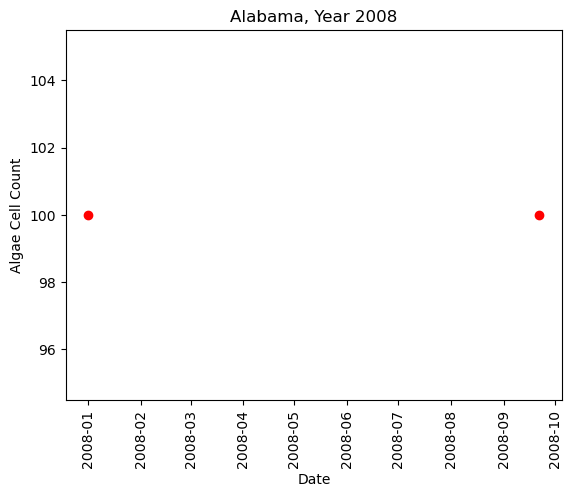

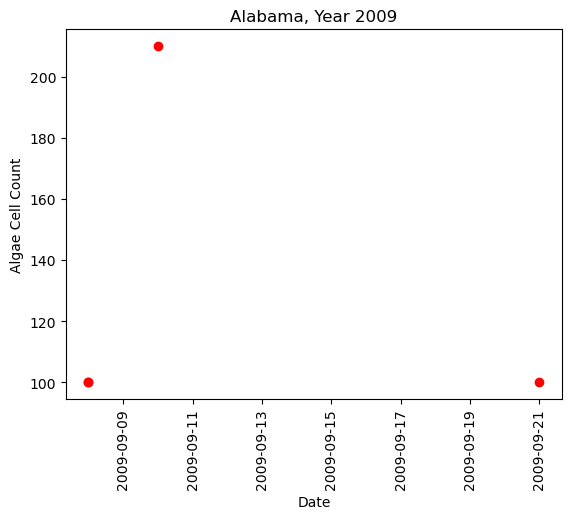

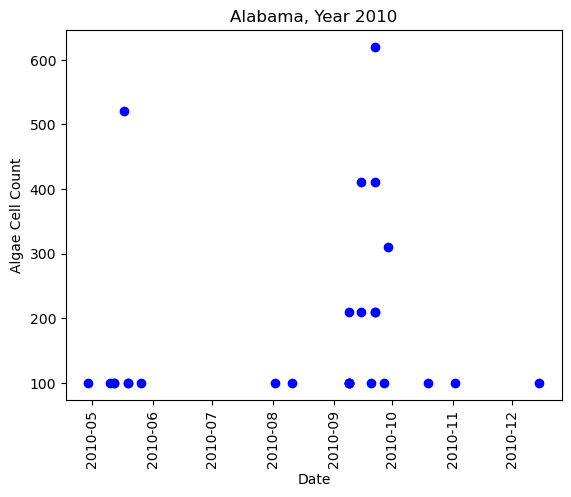

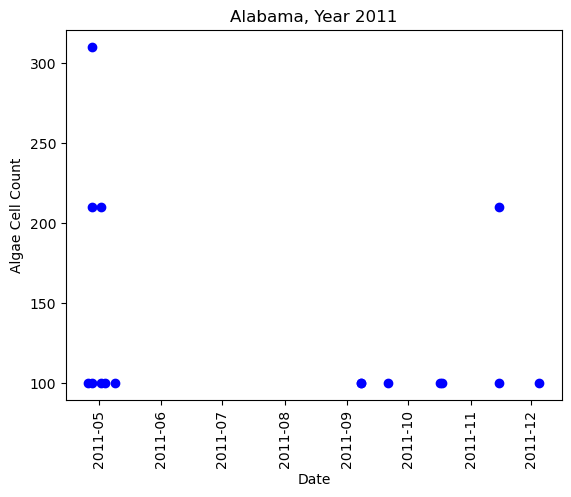

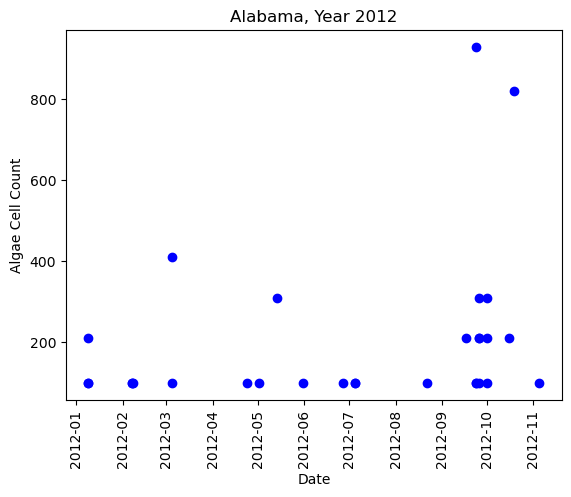

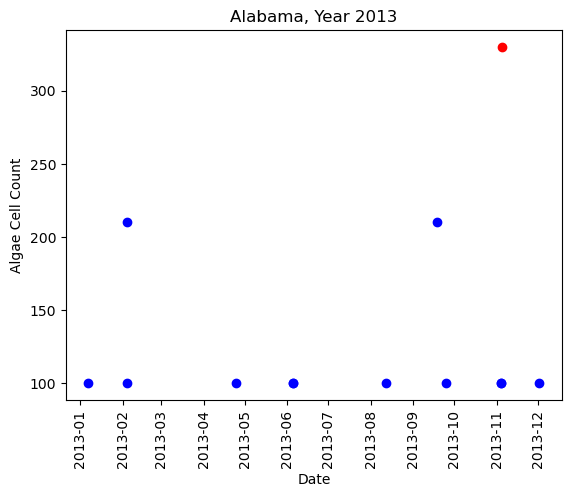

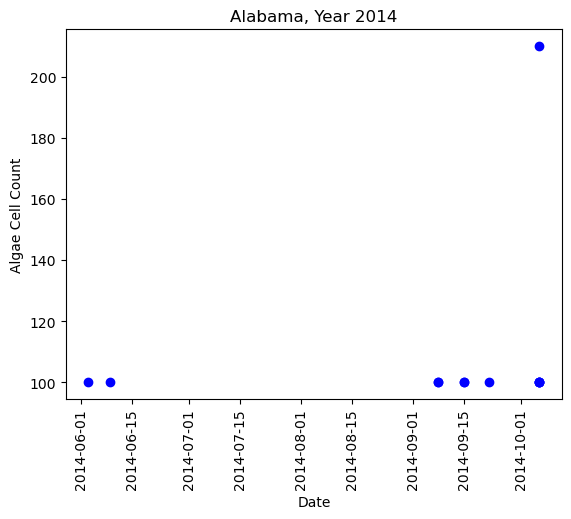

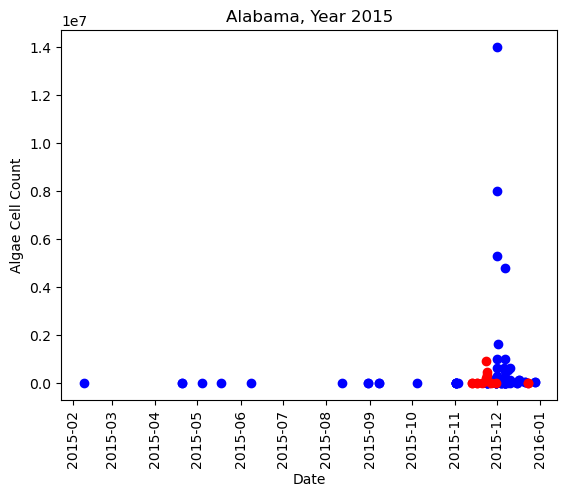

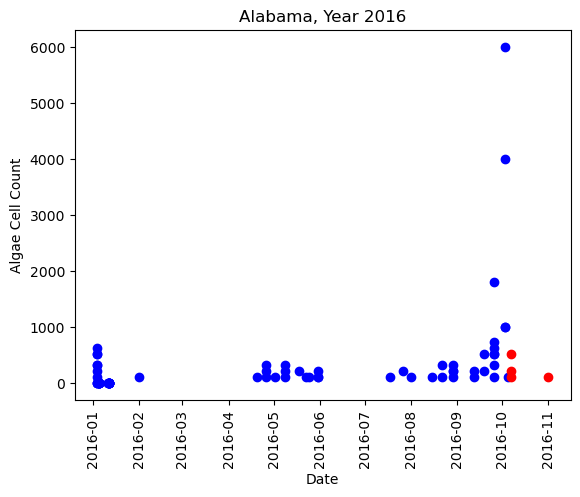

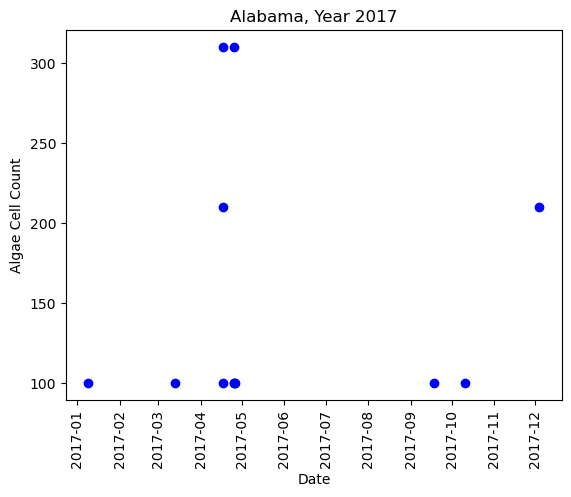

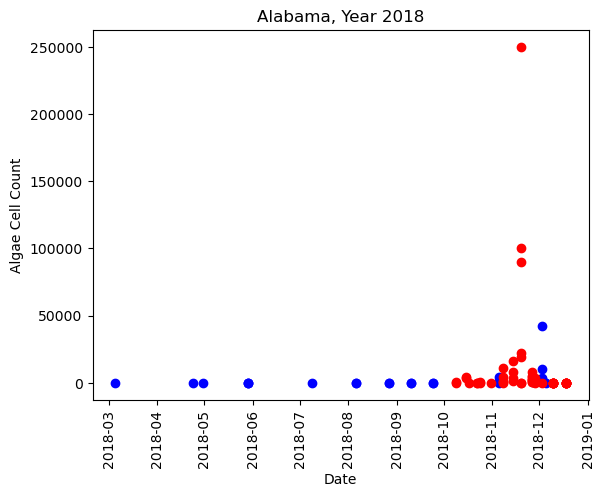

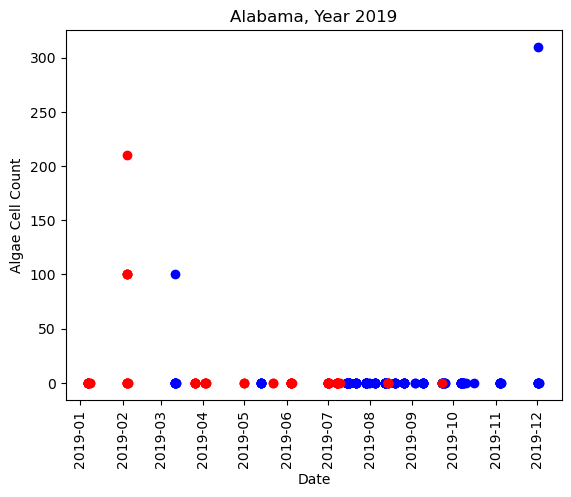

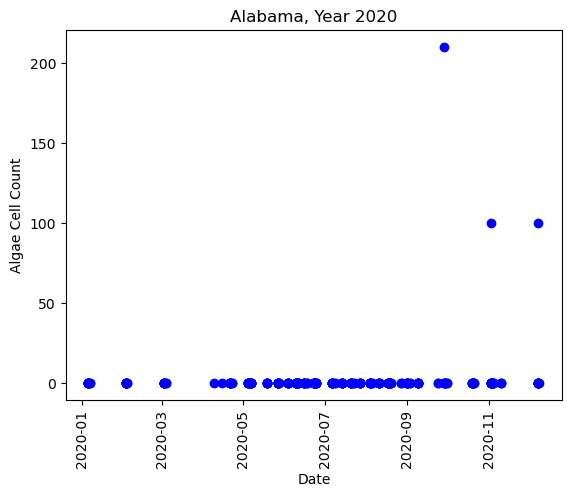

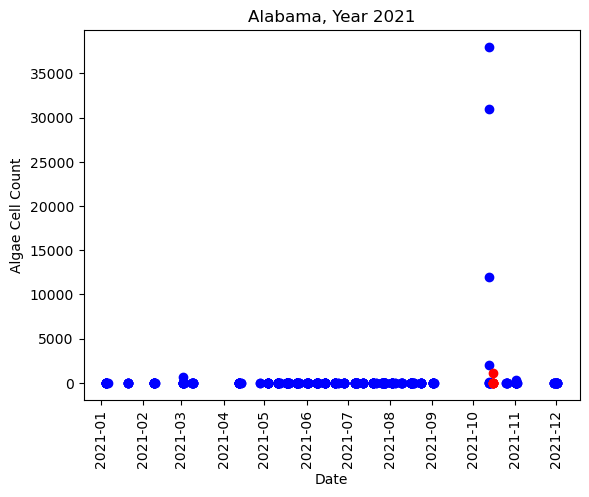

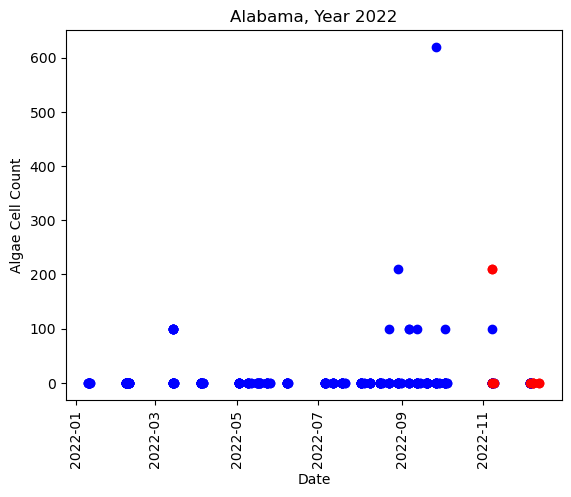

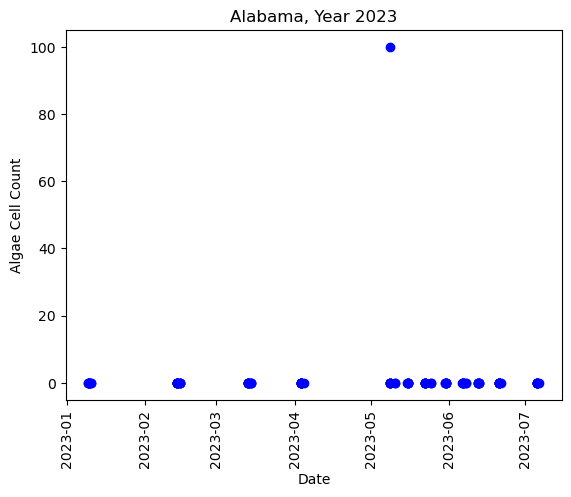

In [132]:
for i in range(2000,2024):
    plt.figure()
    ynan = abalabamanan.loc[(abalabamanan.SAMPLE_DATE >= datetime(i,1,1)) 
                      & (abalabamanan.SAMPLE_DATE < datetime(i+1,1,1))]['CELLCOUNT']
    xnan = abalabamanan.loc[(abalabamanan.SAMPLE_DATE >= datetime(i,1,1)) 
                      & (abalabamanan.SAMPLE_DATE < datetime(i+1,1,1))]['SAMPLE_DATE']
    
    y = abalabama.loc[(abalabama.SAMPLE_DATE >= datetime(i,1,1)) 
                      & (abalabama.SAMPLE_DATE < datetime(i+1,1,1))]['CELLCOUNT']
    x = abalabama.loc[(abalabama.SAMPLE_DATE >= datetime(i,1,1)) 
                      & (abalabama.SAMPLE_DATE < datetime(i+1,1,1))]['SAMPLE_DATE']    

    plt.scatter(x,y,c='b',label="Non-Nan")
    plt.scatter(xnan,ynan,c='r',label="Nan")
    plt.title(f'Alabama, Year {i}')
    plt.xlabel('Date')
    plt.xticks(rotation=90)
    plt.ylabel('Algae Cell Count')
plt.show()
plt.close("all")

In [133]:
plt.close("all")

C:\Users\Peter Doze\AppData\Local\Temp\ipykernel_4308\3956280562.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


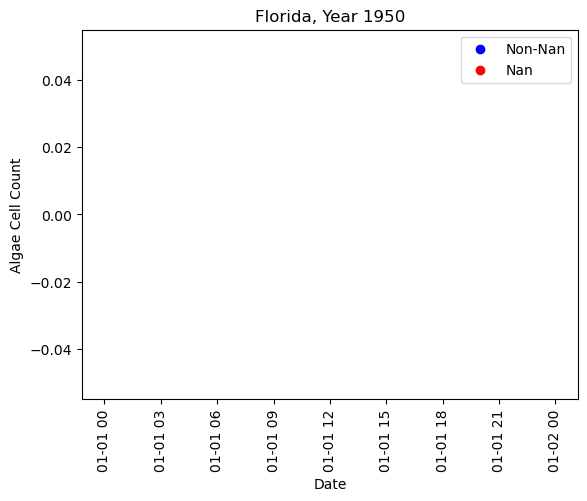

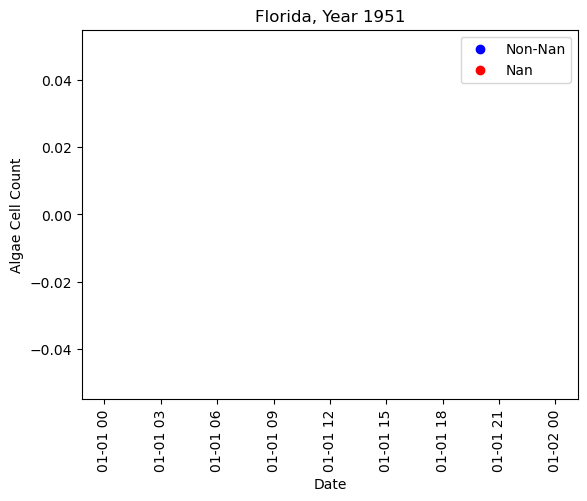

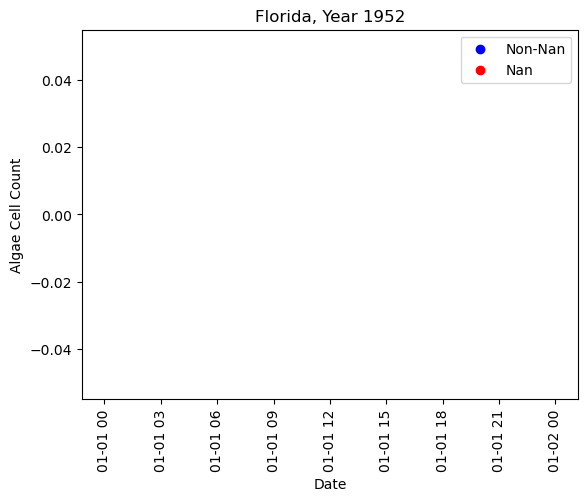

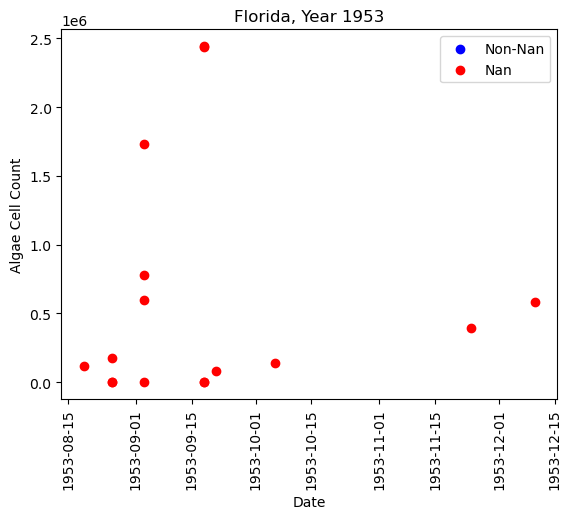

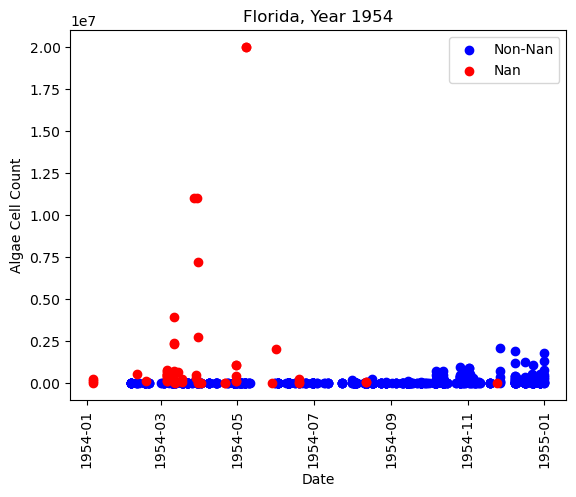

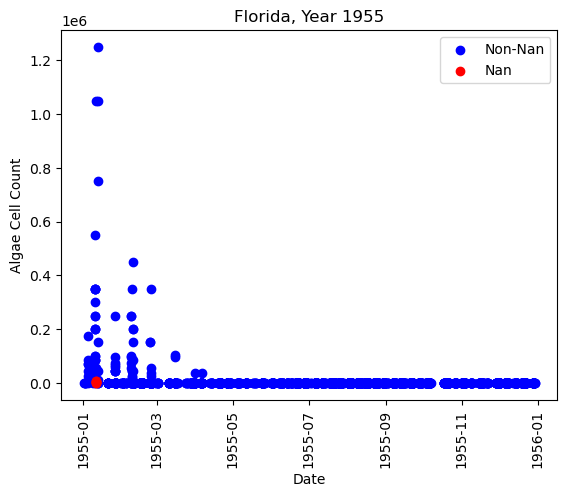

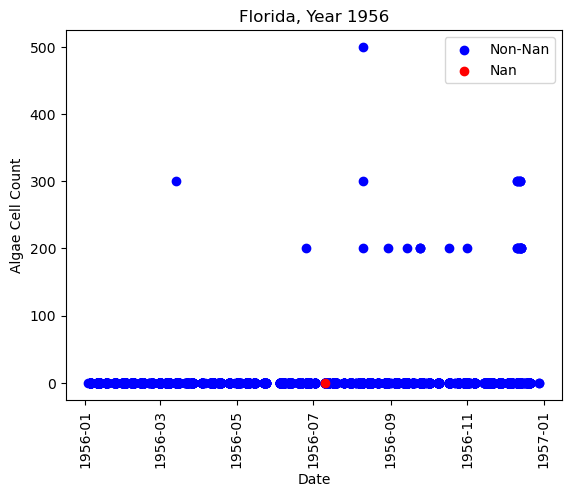

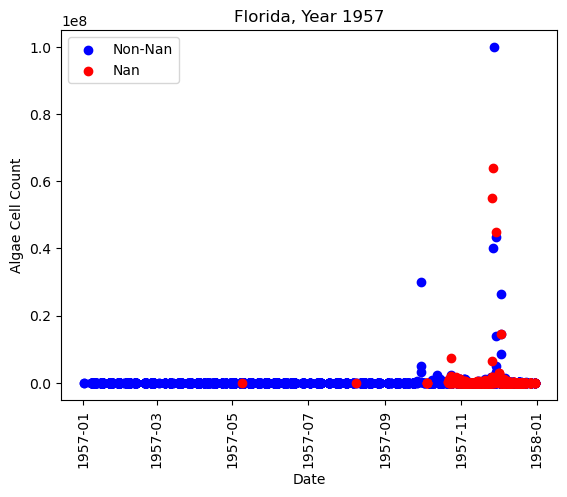

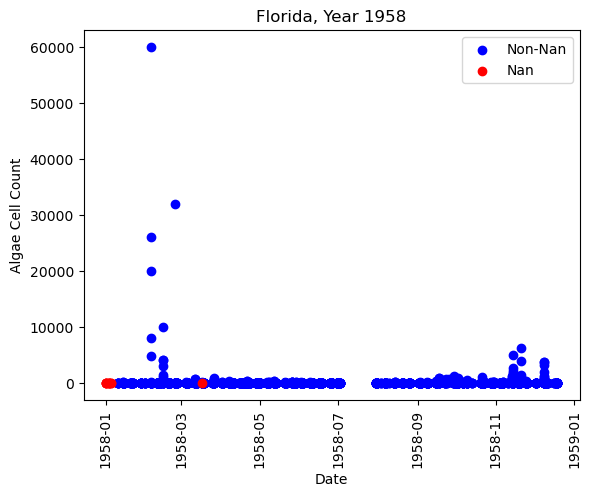

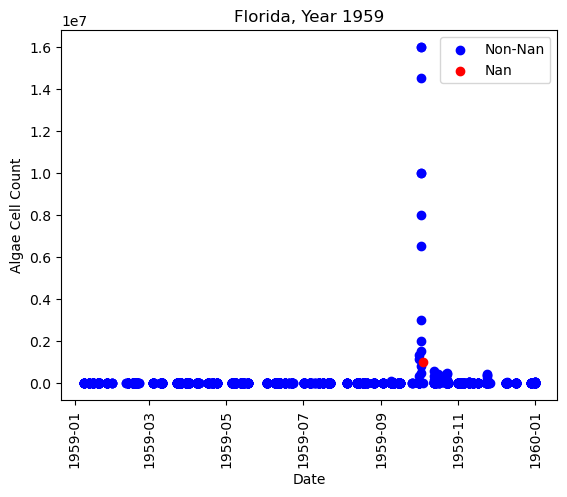

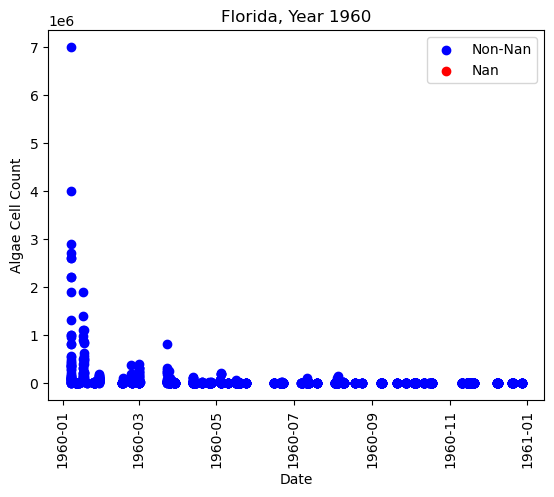

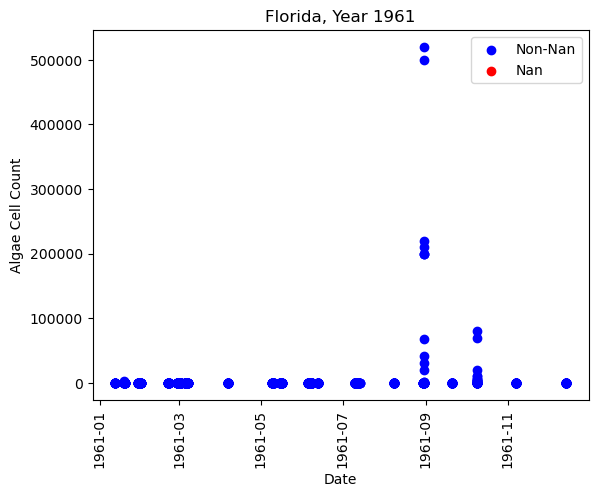

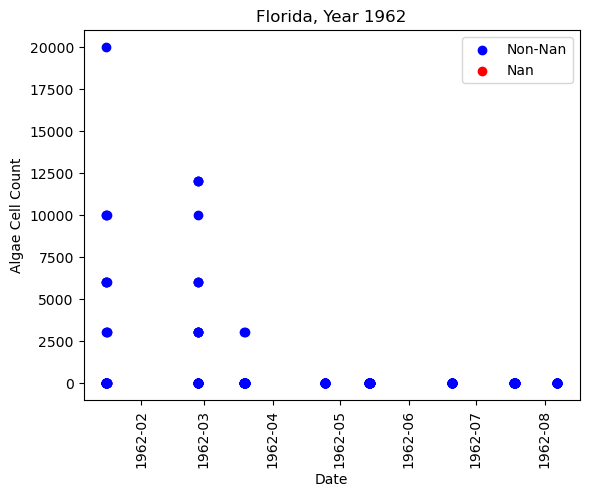

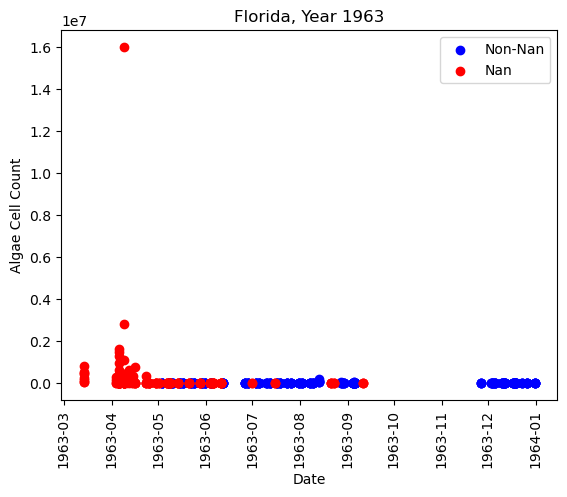

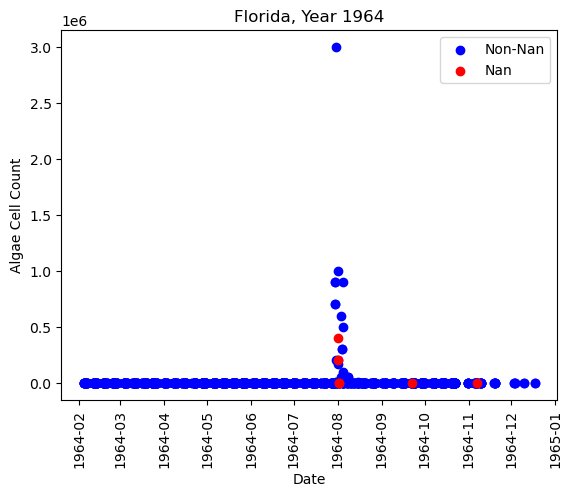

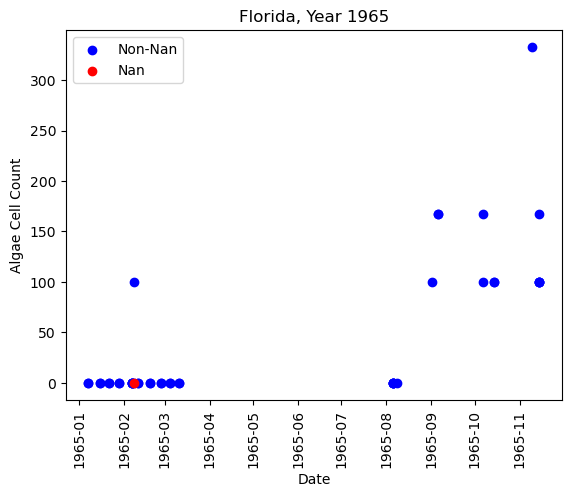

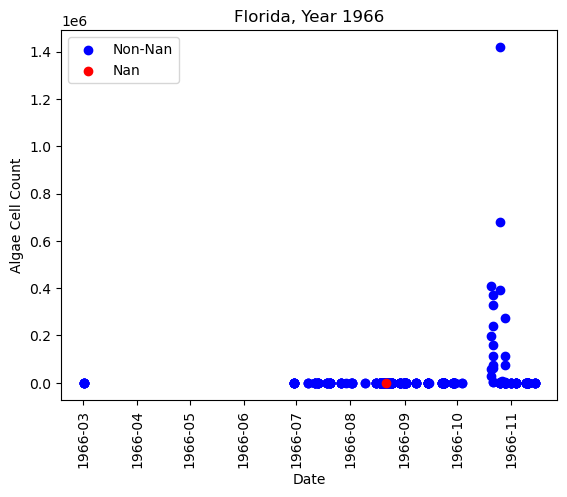

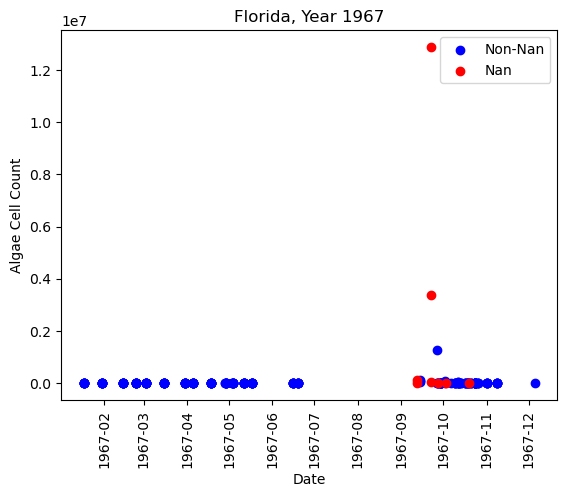

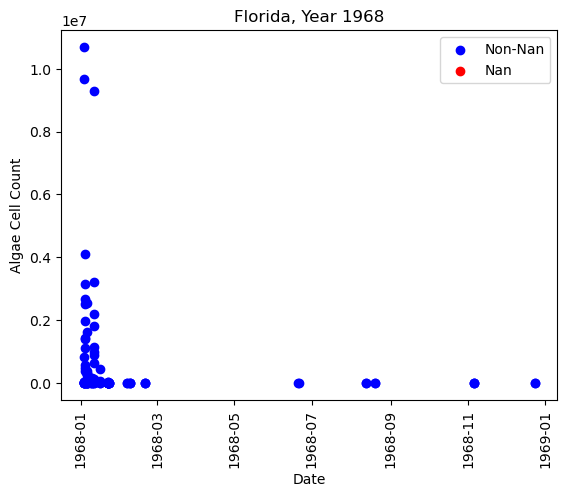

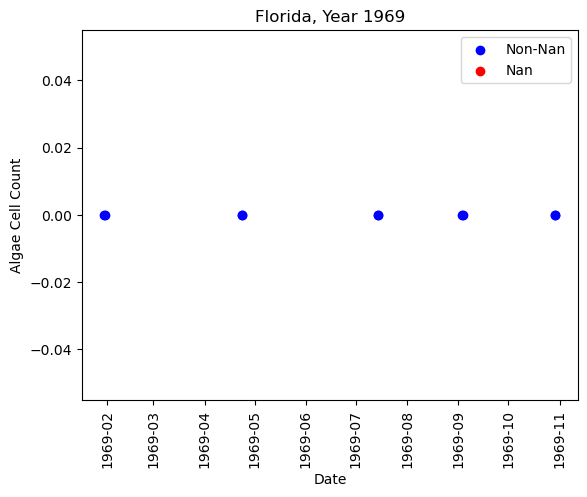

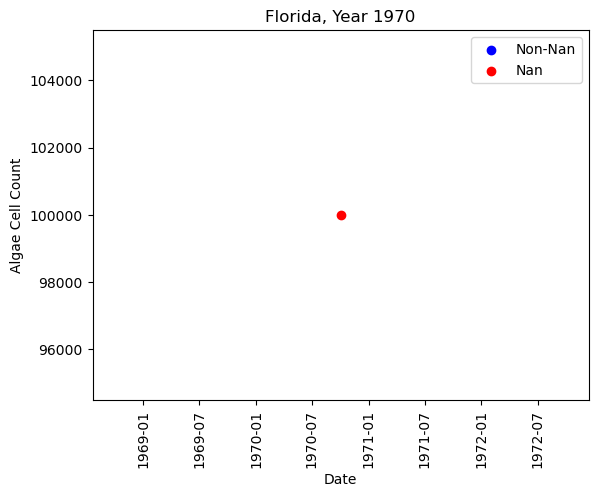

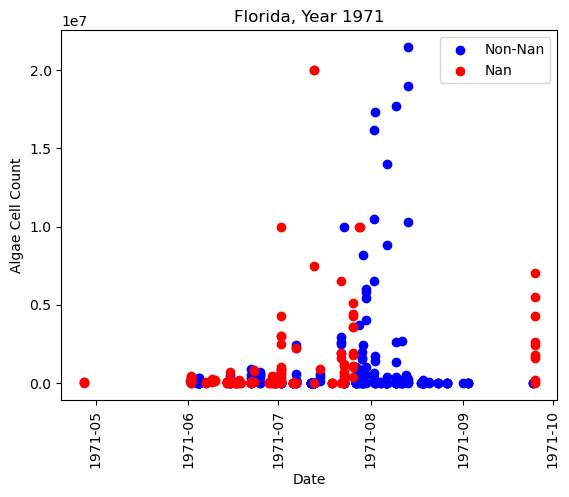

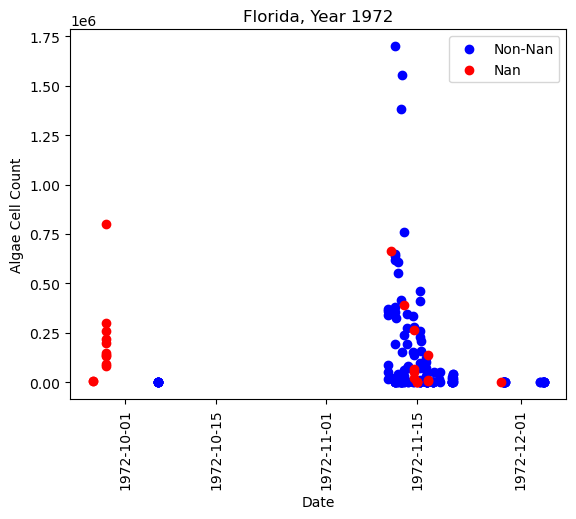

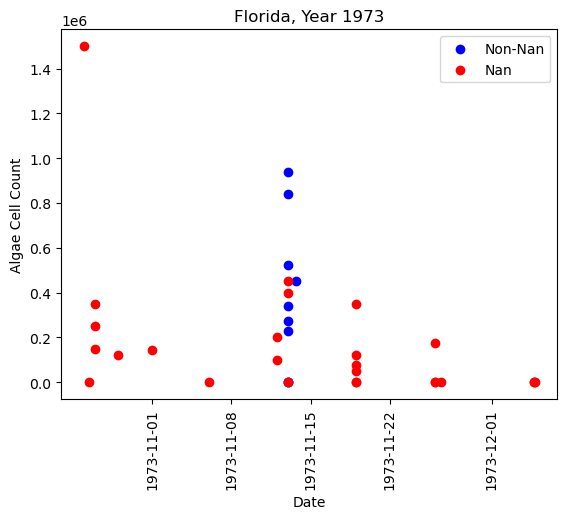

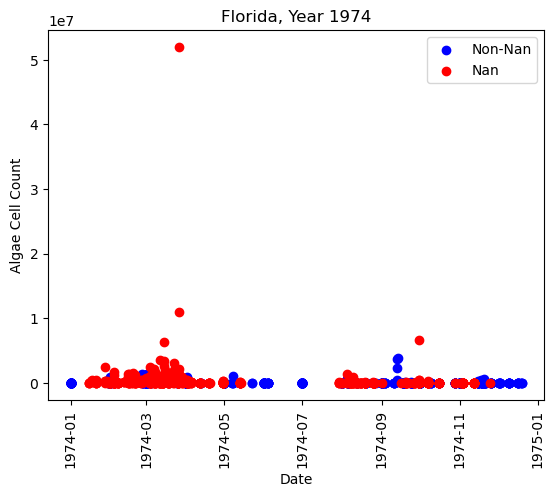

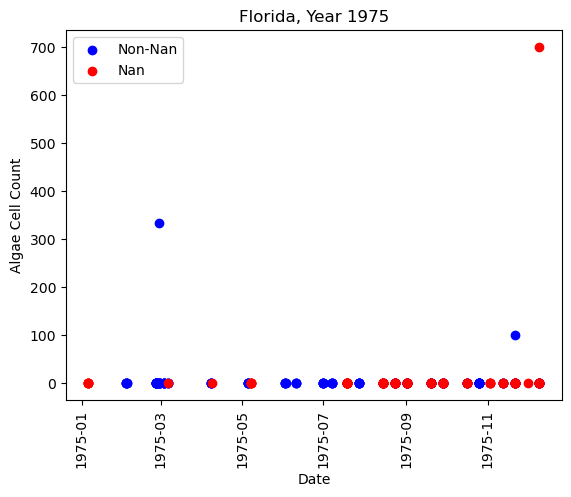

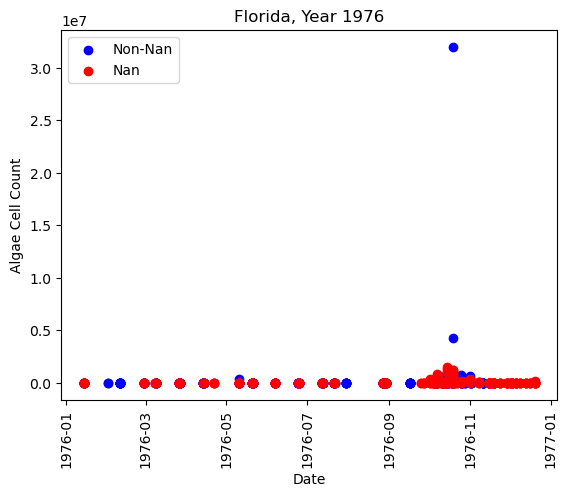

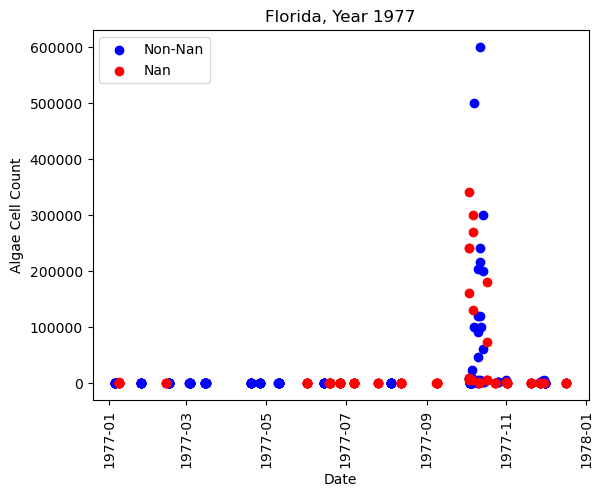

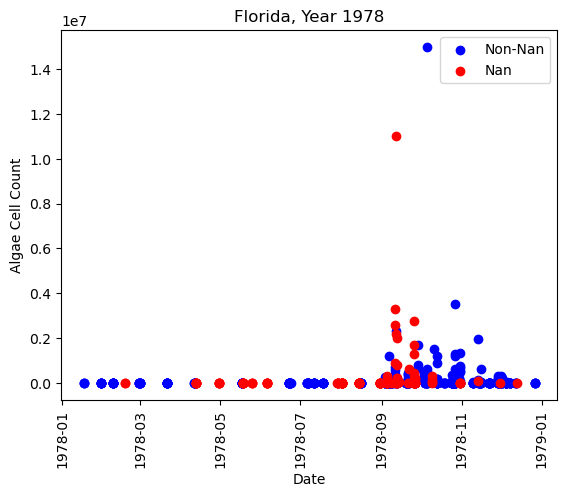

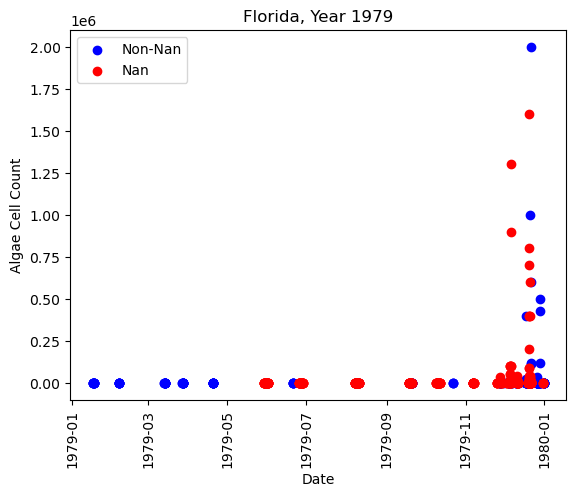

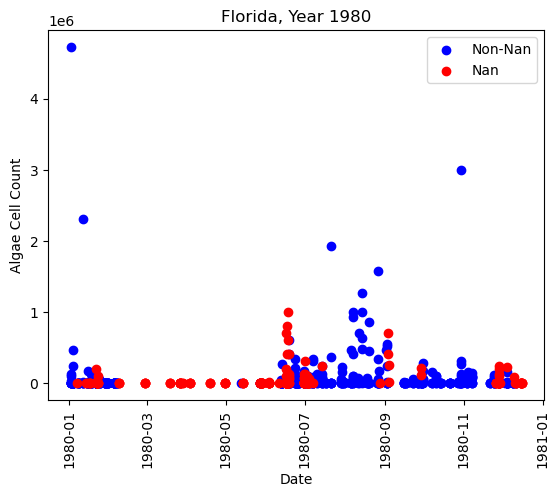

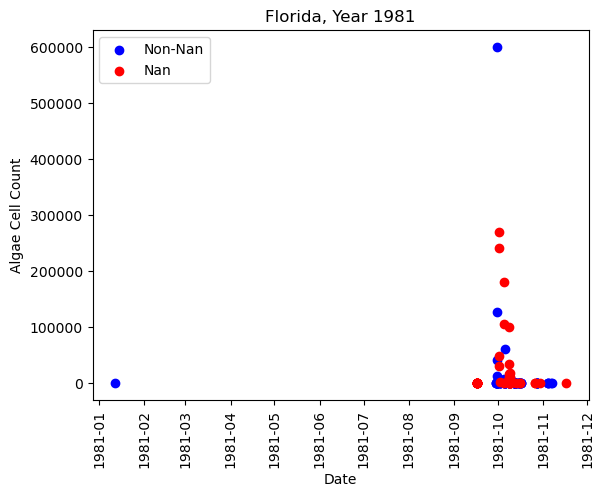

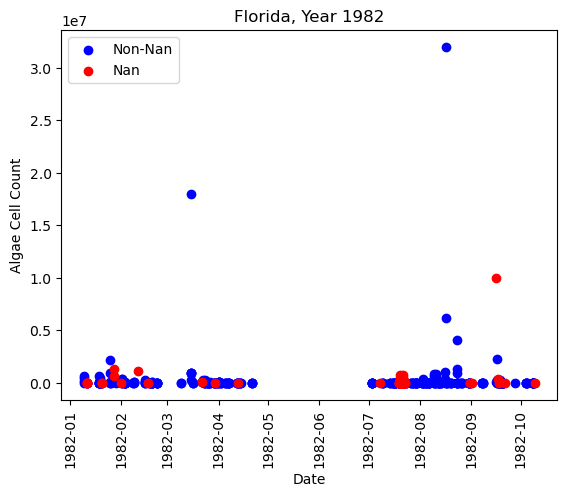

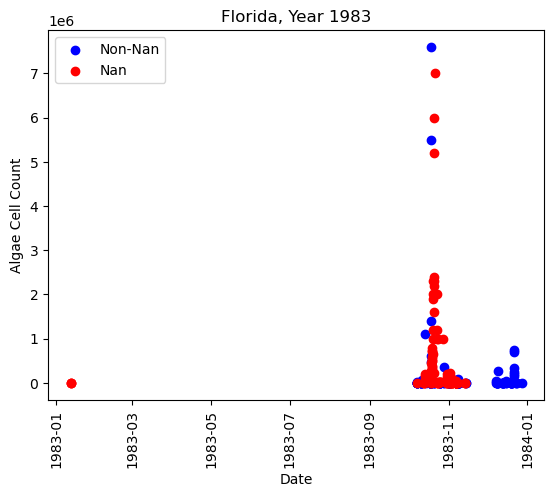

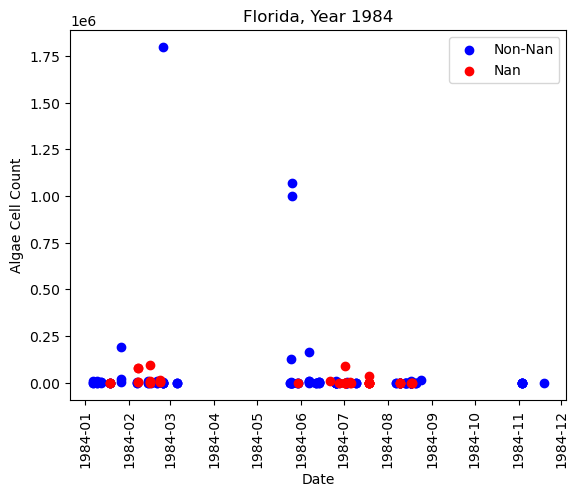

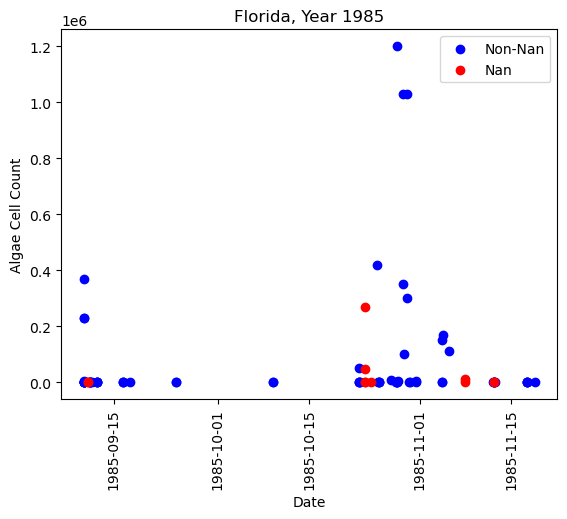

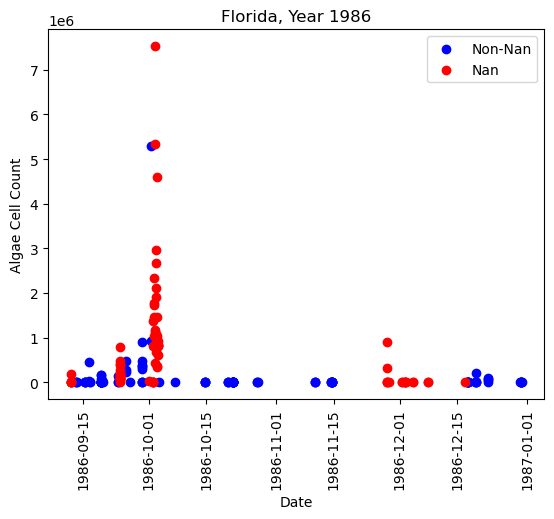

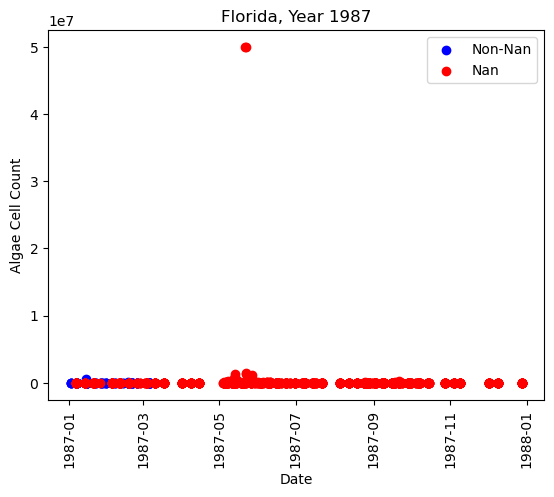

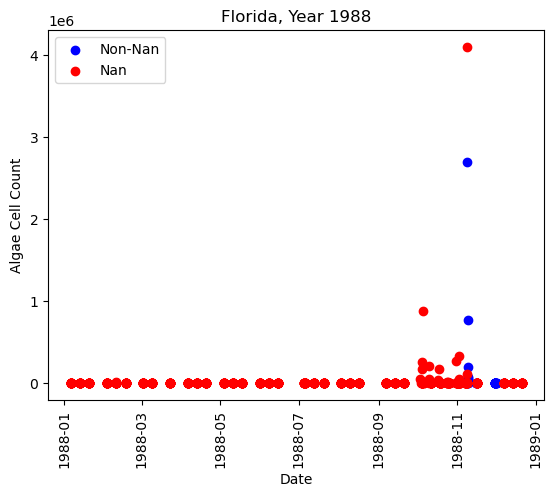

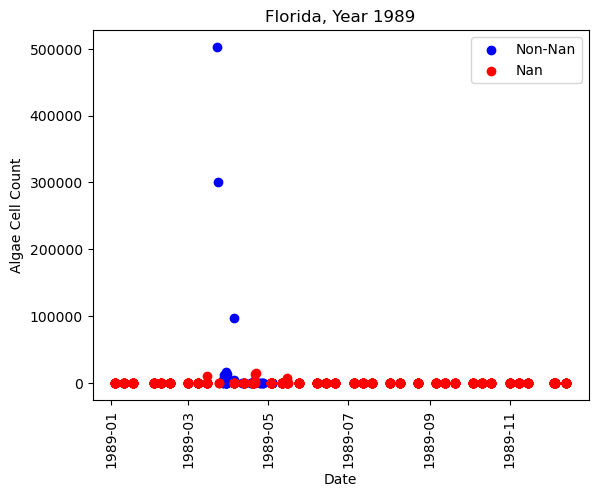

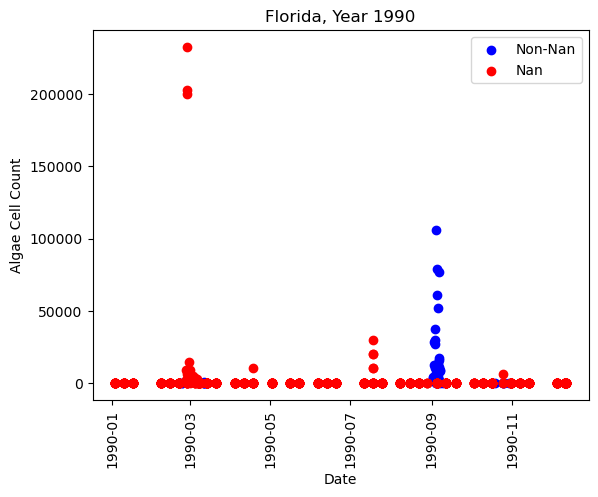

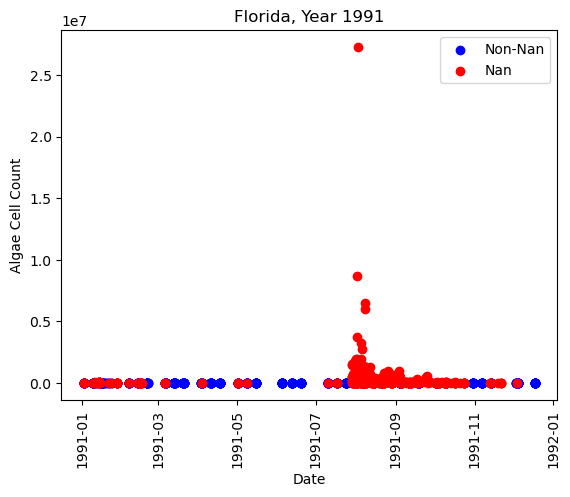

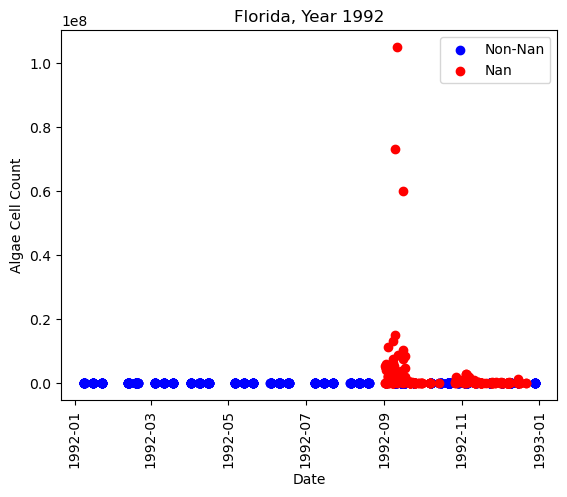

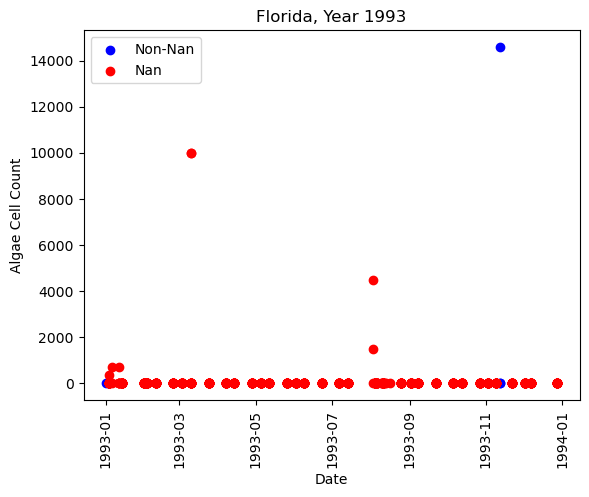

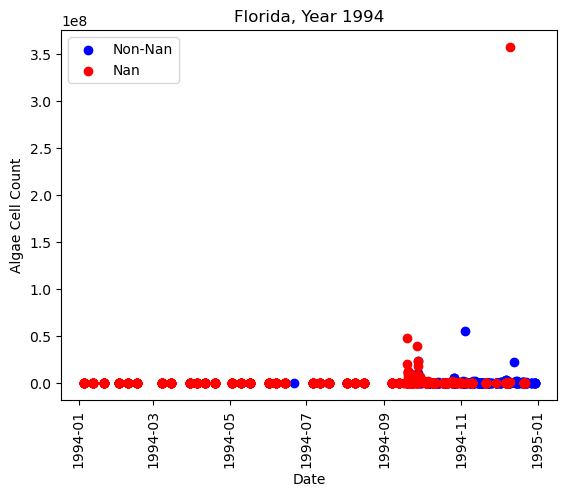

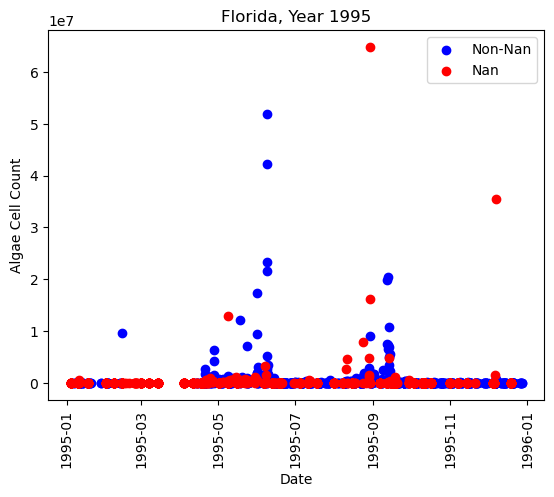

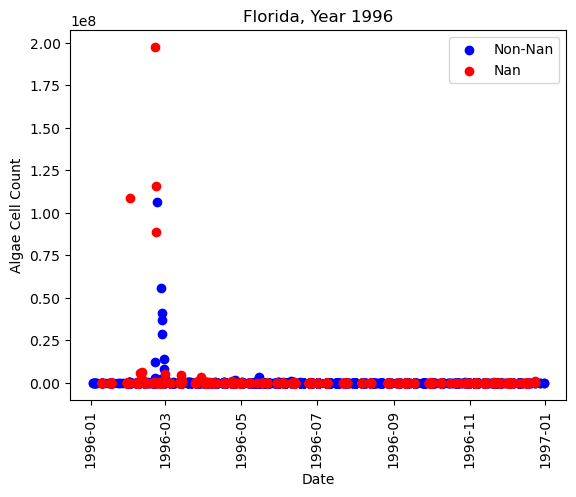

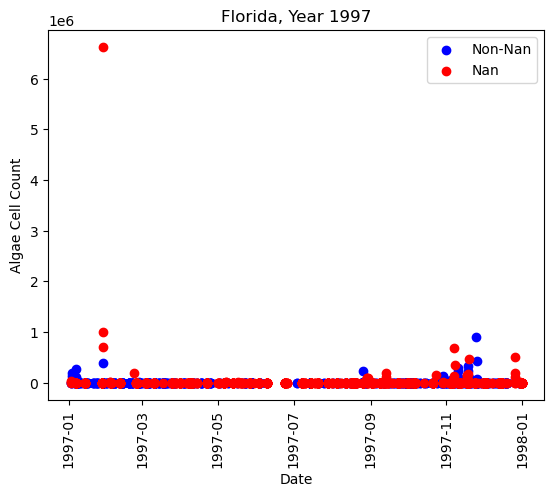

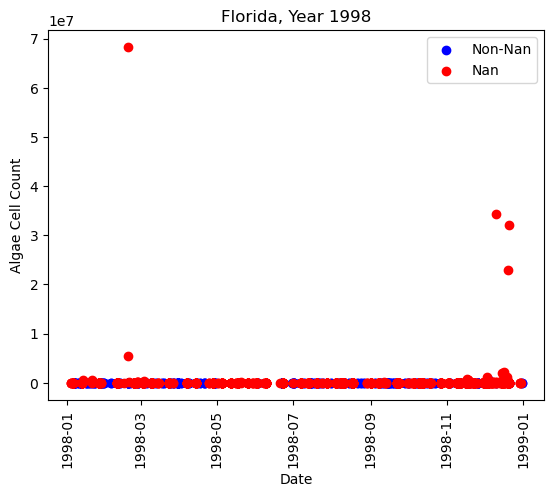

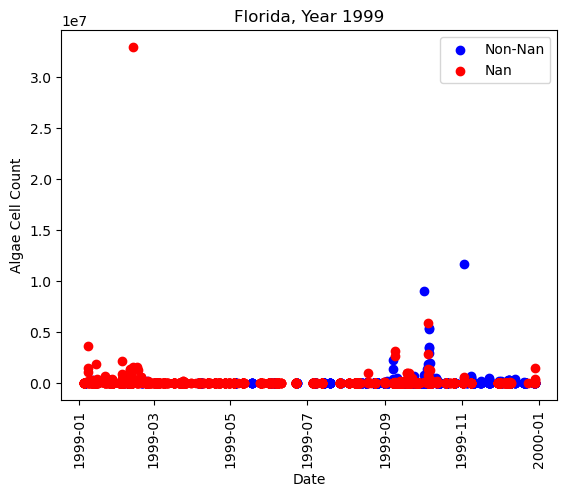

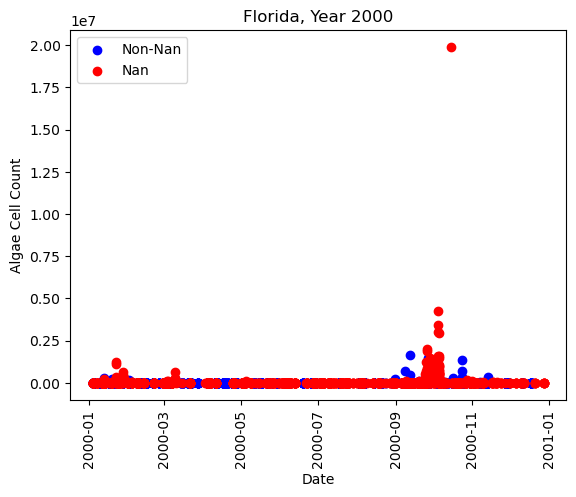

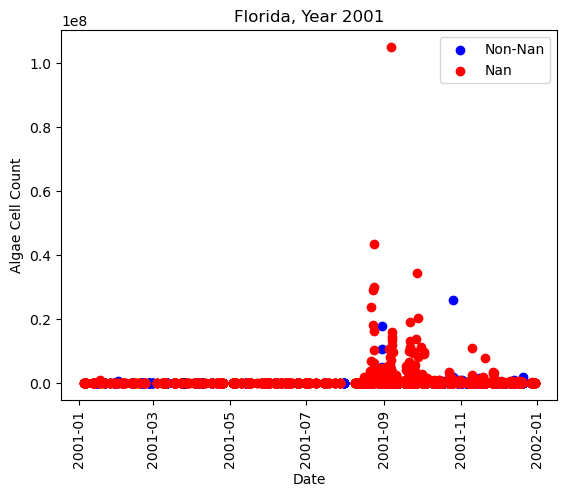

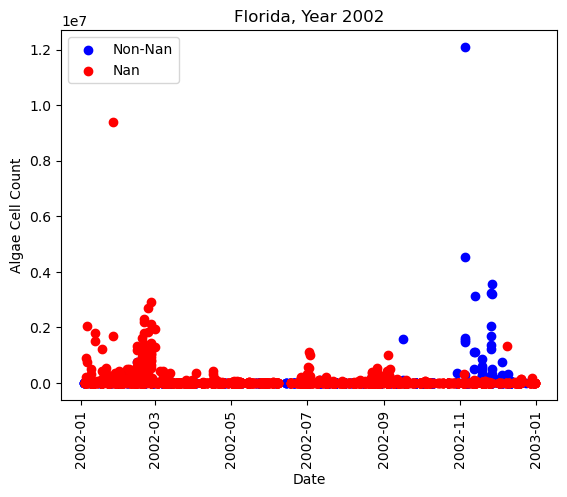

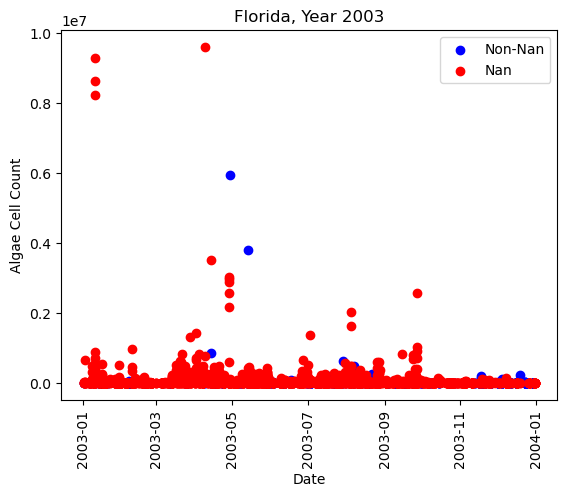

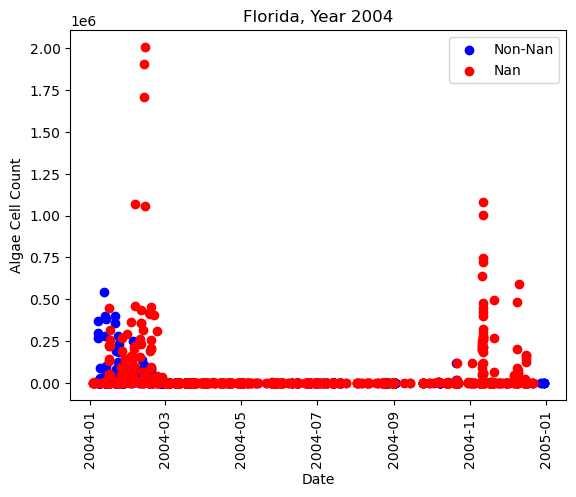

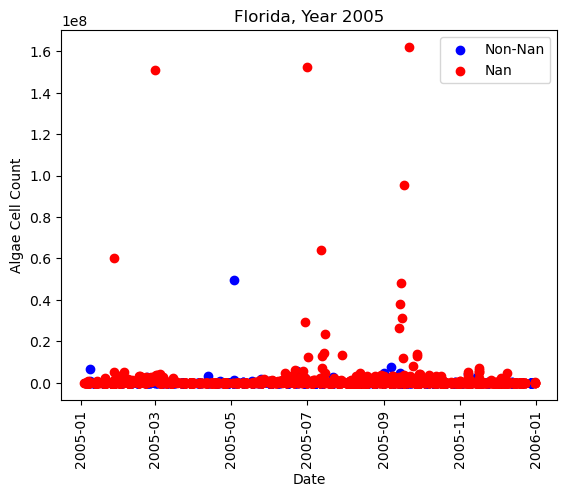

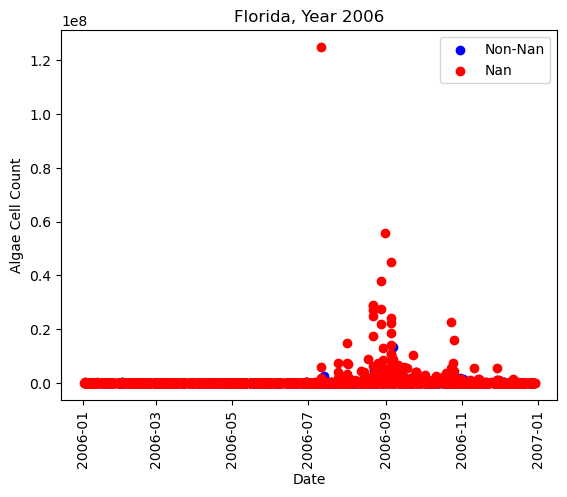

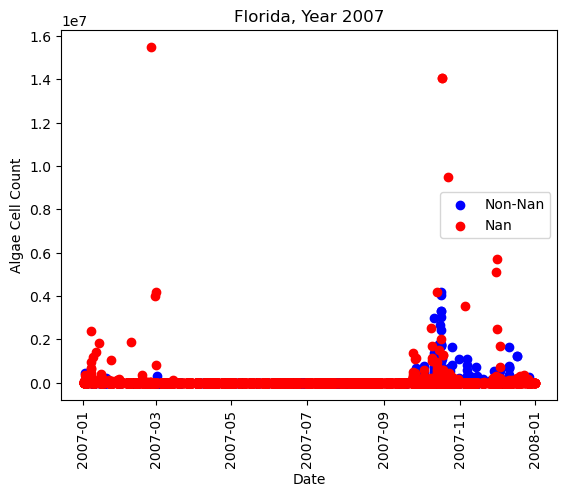

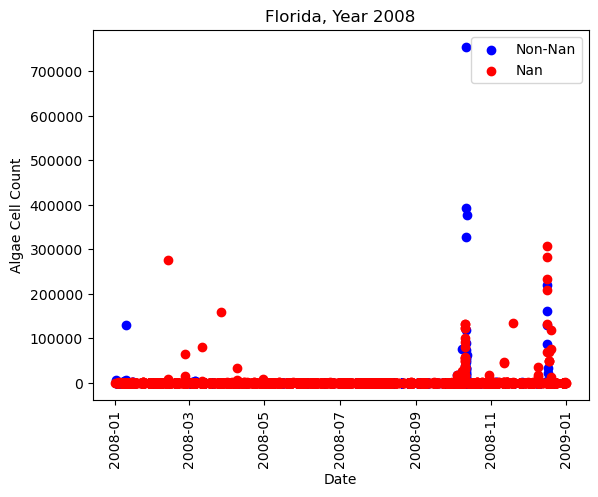

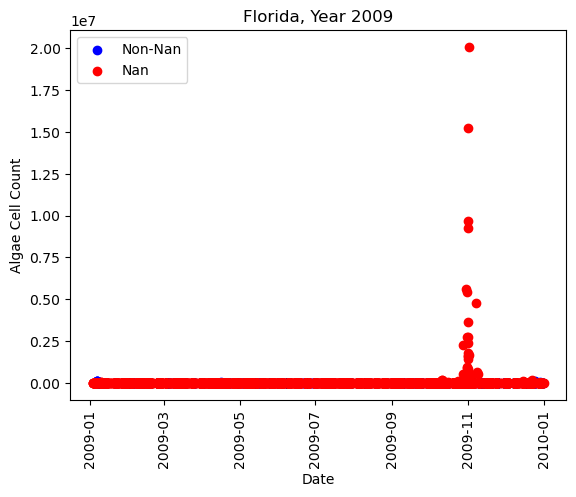

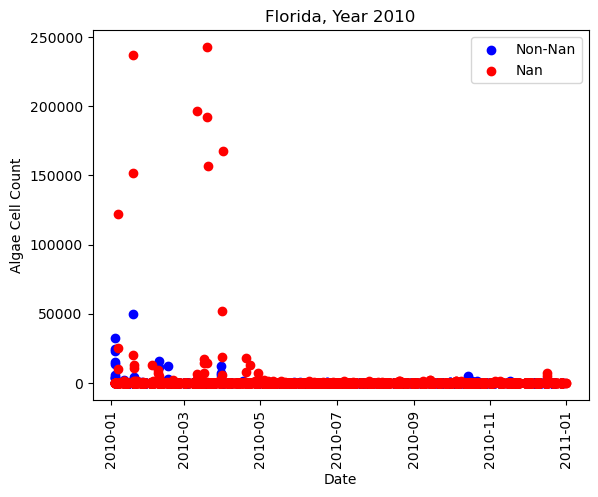

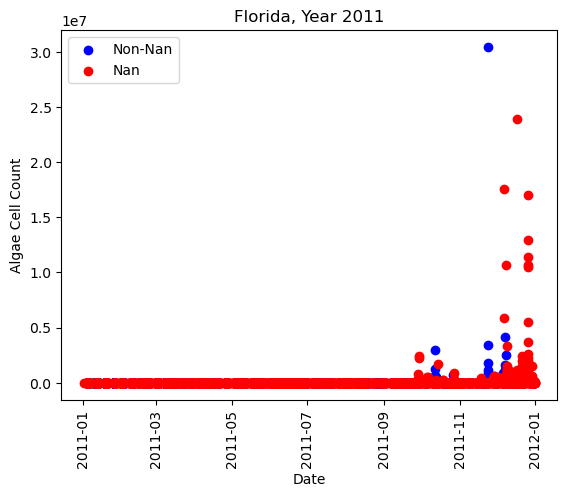

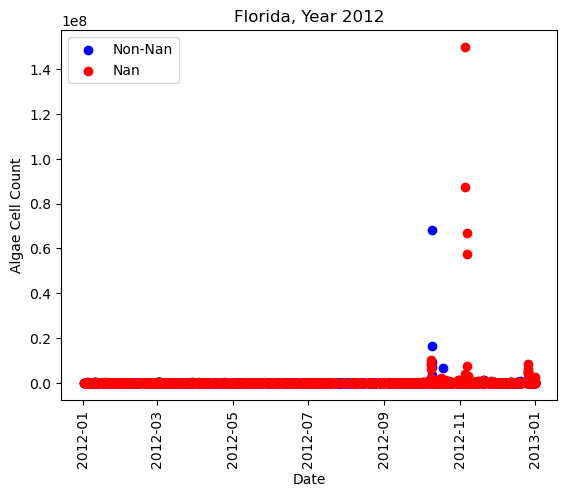

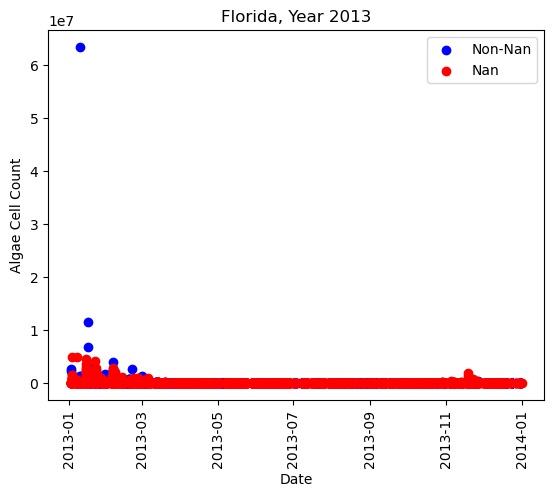

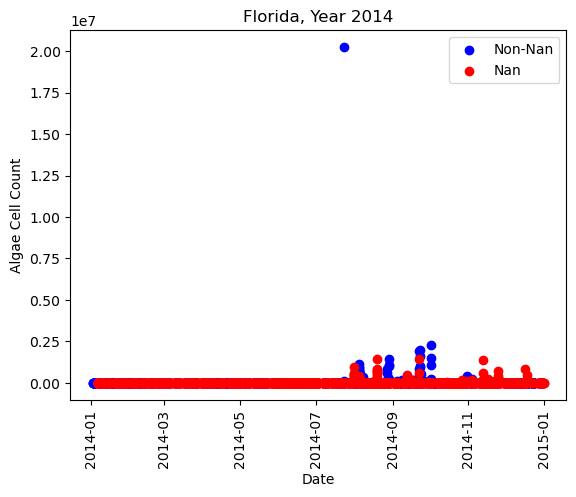

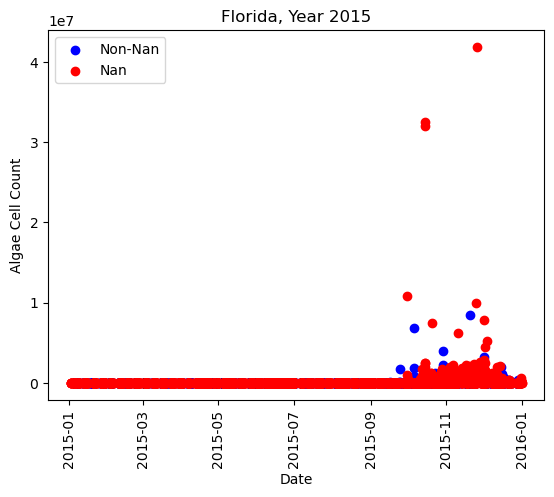

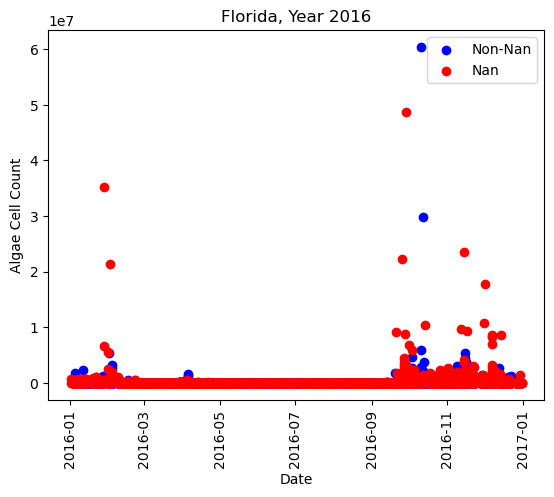

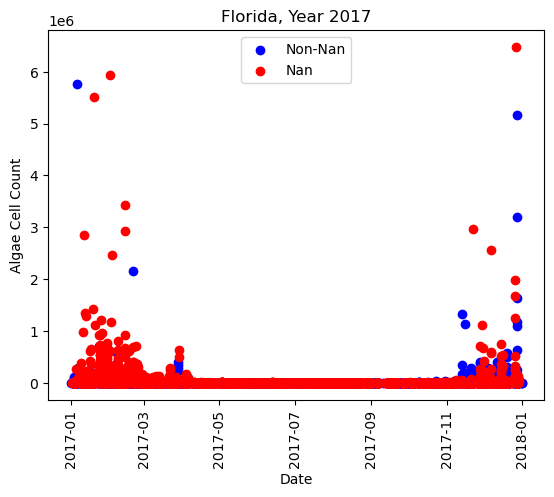

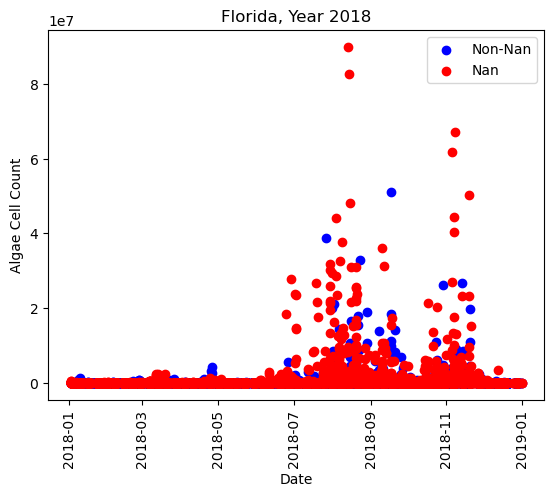

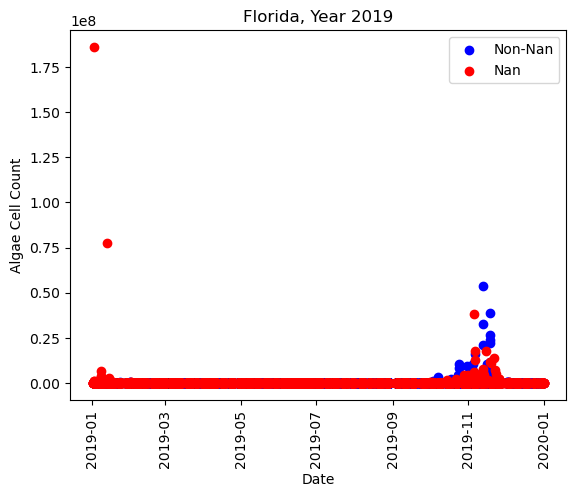

In [134]:
for i in range(1950,2020):
    plt.figure()
    ynan = abfloridanan.loc[(abfloridanan.SAMPLE_DATE >= datetime(i,1,1)) 
                      & (abfloridanan.SAMPLE_DATE < datetime(i+1,1,1))]['CELLCOUNT']
    xnan = abfloridanan.loc[(abfloridanan.SAMPLE_DATE >= datetime(i,1,1)) 
                      & (abfloridanan.SAMPLE_DATE < datetime(i+1,1,1))]['SAMPLE_DATE']
    
    y = abflorida.loc[(abflorida.SAMPLE_DATE >= datetime(i,1,1)) 
                      & (abflorida.SAMPLE_DATE < datetime(i+1,1,1))]['CELLCOUNT']
    x = abflorida.loc[(abflorida.SAMPLE_DATE >= datetime(i,1,1)) 
                      & (abflorida.SAMPLE_DATE < datetime(i+1,1,1))]['SAMPLE_DATE']    

    plt.scatter(x,y,c='b',label="Non-Nan")
    plt.scatter(xnan,ynan,c='r',label="Nan")
    plt.title(f'Florida, Year {i}')
    plt.legend()
    plt.xlabel('Date')
    plt.xticks(rotation=90)
    plt.ylabel('Algae Cell Count')
plt.show()
plt.close("all")

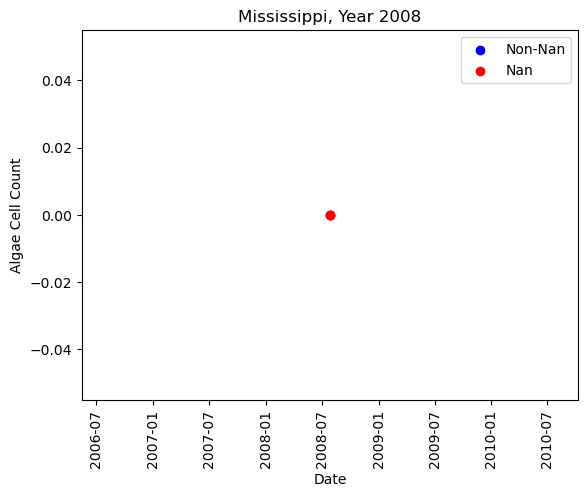

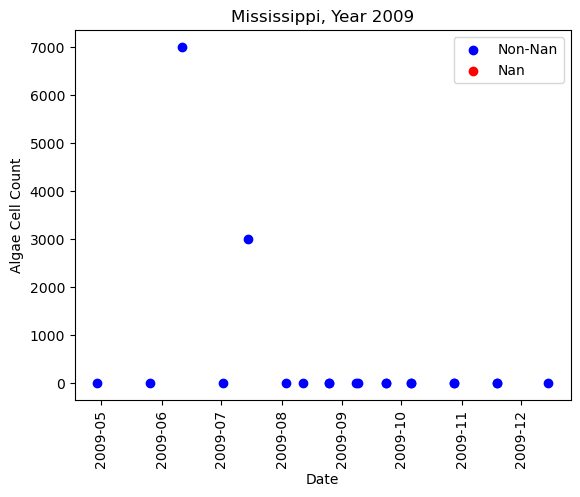

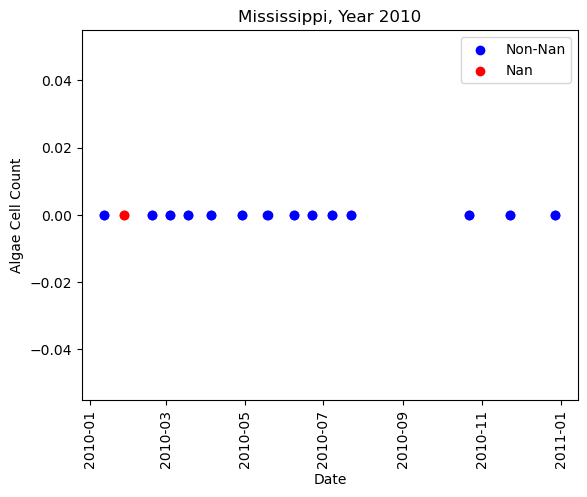

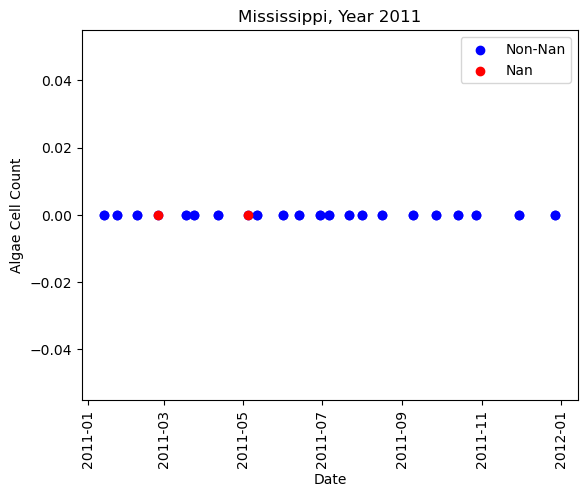

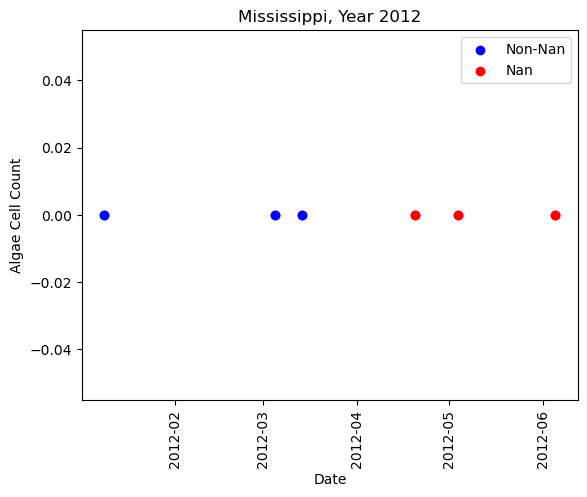

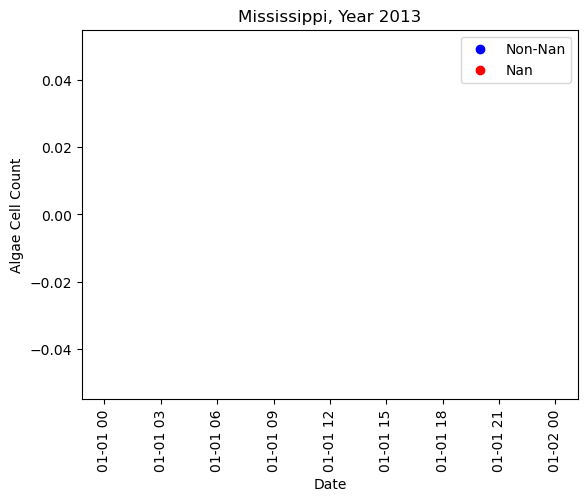

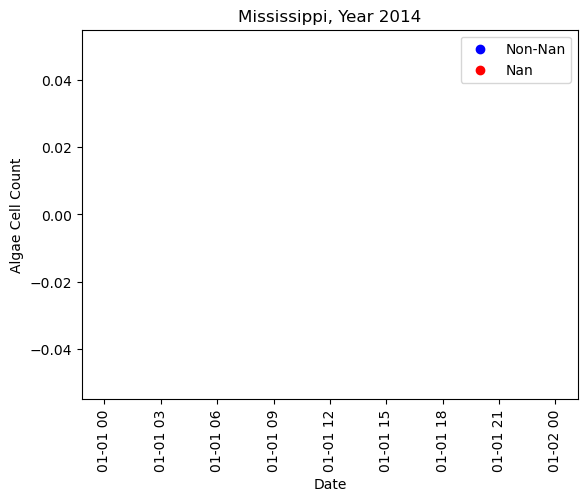

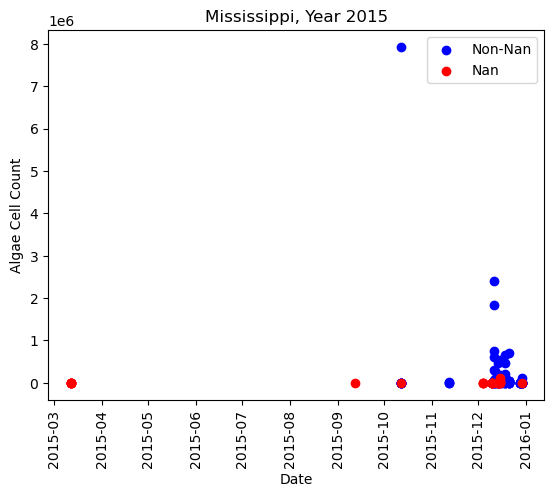

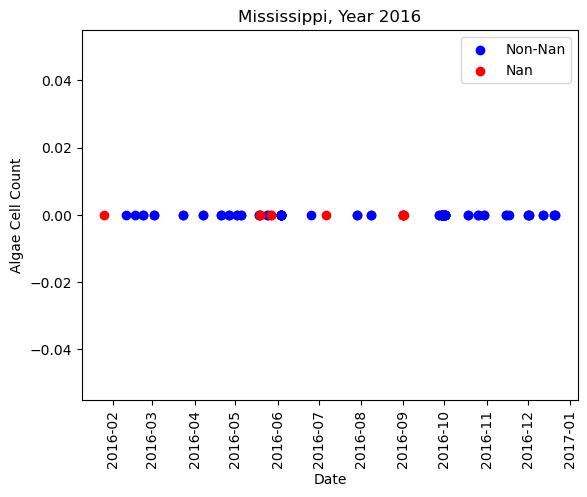

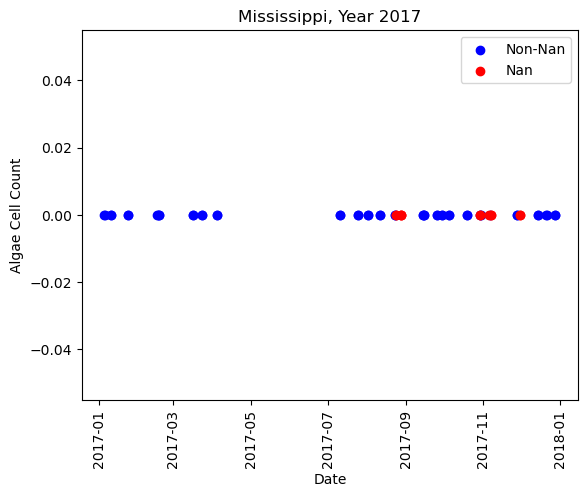

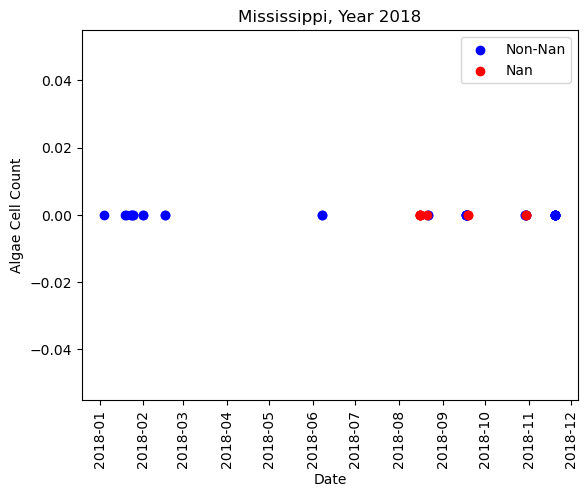

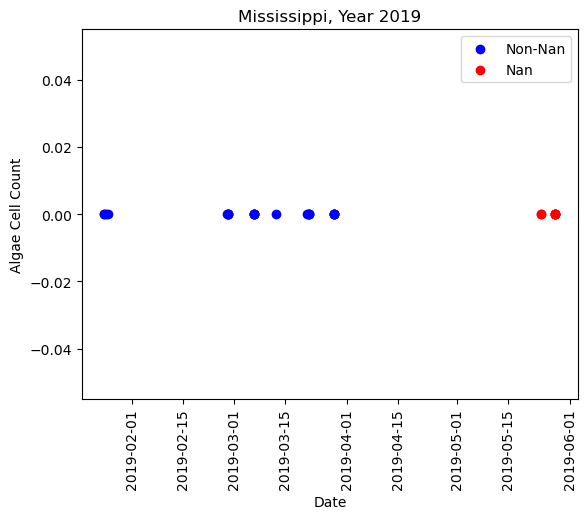

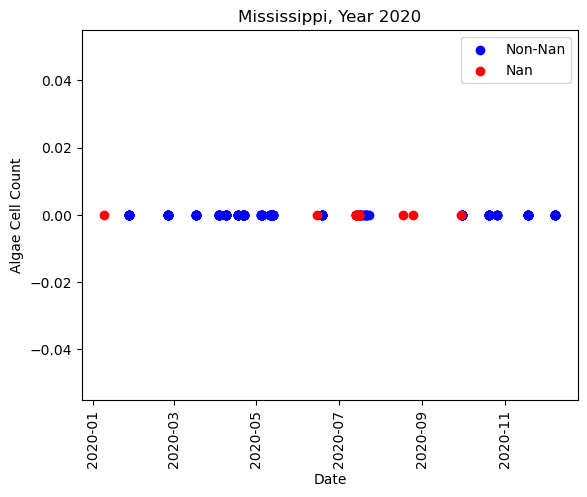

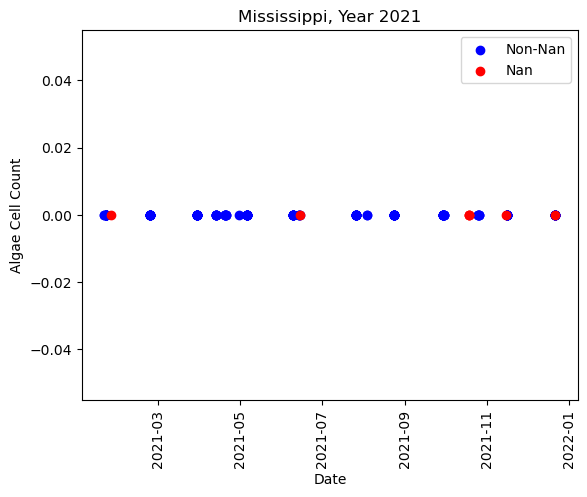

In [135]:
for i in range(2008,2022):
    plt.figure()
    ynan = abmississippinan.loc[(abmississippinan.SAMPLE_DATE >= datetime(i,1,1)) 
                      & (abmississippinan.SAMPLE_DATE < datetime(i+1,1,1))]['CELLCOUNT']
    xnan = abmississippinan.loc[(abmississippinan.SAMPLE_DATE >= datetime(i,1,1)) 
                      & (abmississippinan.SAMPLE_DATE < datetime(i+1,1,1))]['SAMPLE_DATE']
    
    y = abmississippi.loc[(abmississippi.SAMPLE_DATE >= datetime(i,1,1)) 
                      & (abmississippi.SAMPLE_DATE < datetime(i+1,1,1))]['CELLCOUNT']
    x = abmississippi.loc[(abmississippi.SAMPLE_DATE >= datetime(i,1,1)) 
                      & (abmississippi.SAMPLE_DATE < datetime(i+1,1,1))]['SAMPLE_DATE']    

    plt.scatter(x,y,c='b',label="Non-Nan")
    plt.scatter(xnan,ynan,c='r',label="Nan")
    plt.title(f'Mississippi, Year {i}')
    plt.legend()
    plt.xlabel('Date')
    plt.xticks(rotation=90)
    plt.ylabel('Algae Cell Count')
plt.show()
plt.close("all")

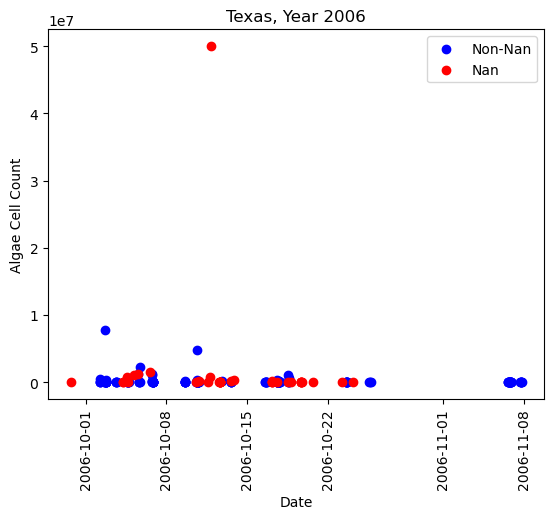

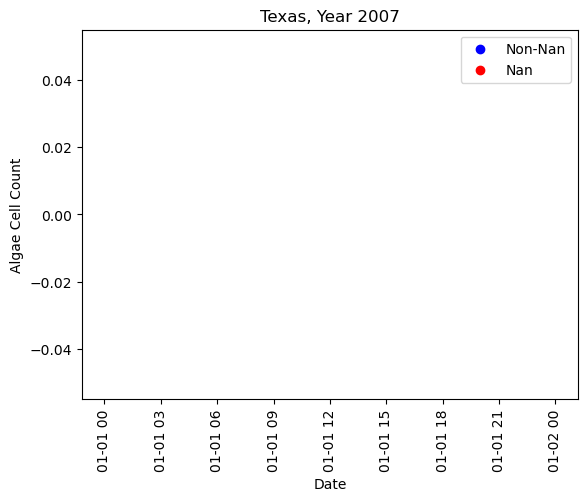

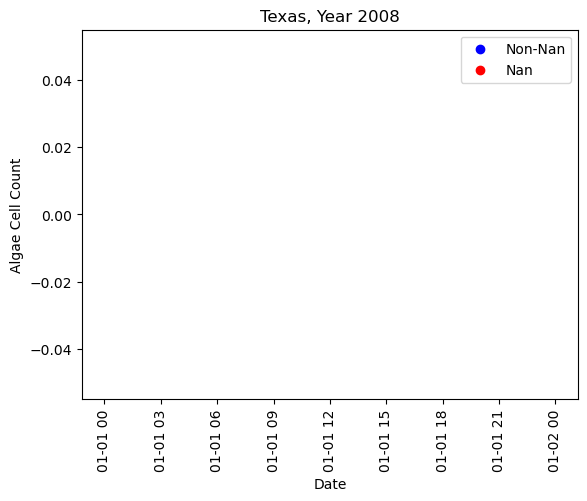

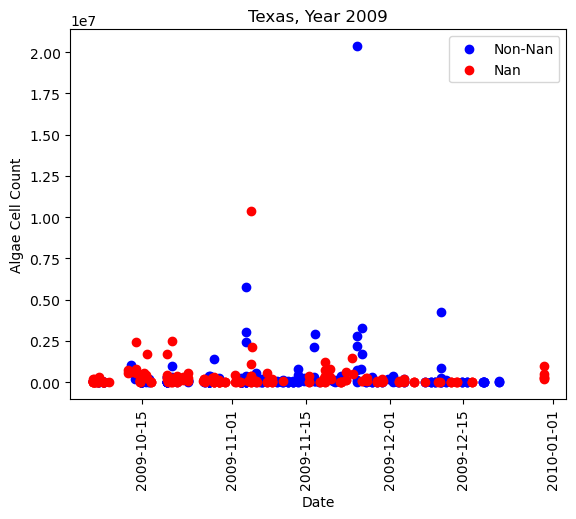

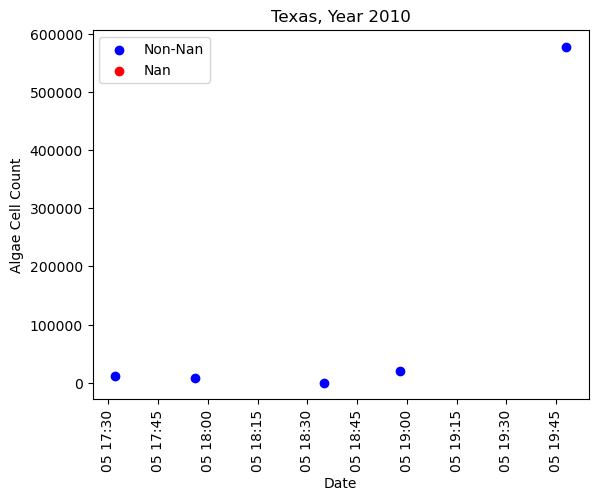

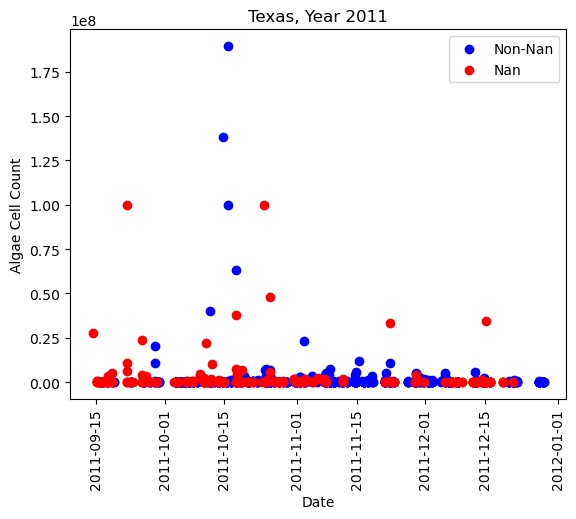

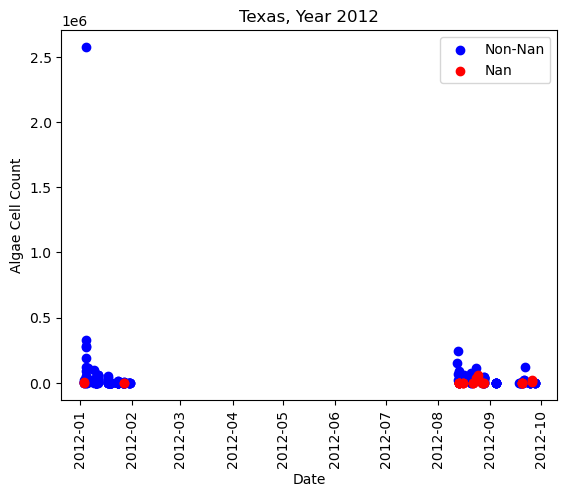

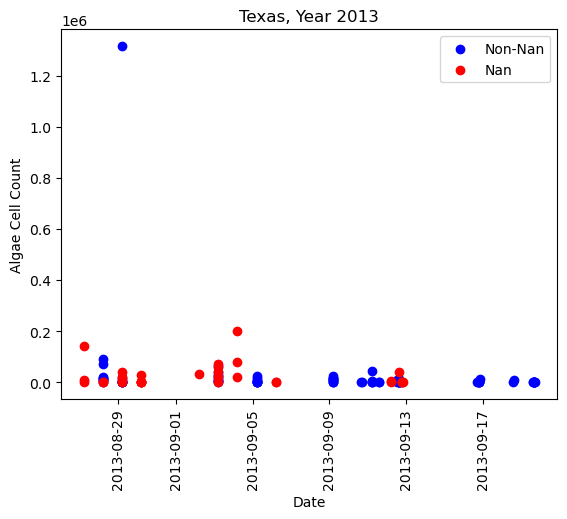

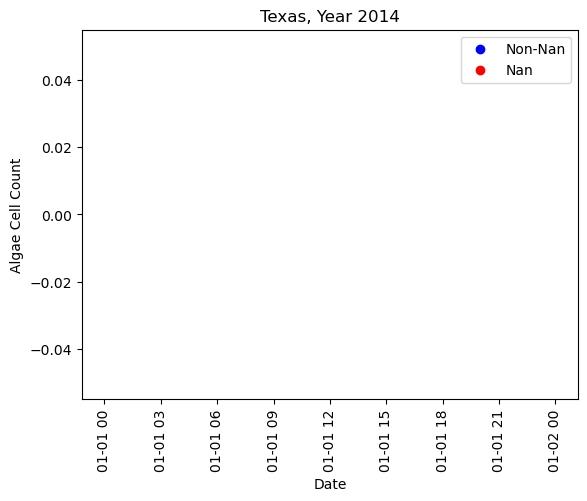

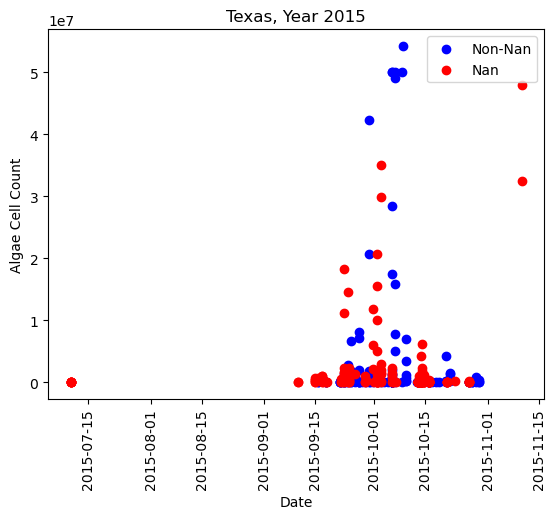

In [136]:
for i in range(2006,2016):
    plt.figure()
    ynan = abtexasnan.loc[(abtexasnan.SAMPLE_DATE >= datetime(i,1,1)) 
                      & (abtexasnan.SAMPLE_DATE < datetime(i+1,1,1))]['CELLCOUNT']
    xnan = abtexasnan.loc[(abtexasnan.SAMPLE_DATE >= datetime(i,1,1)) 
                      & (abtexasnan.SAMPLE_DATE < datetime(i+1,1,1))]['SAMPLE_DATE']
    
    y = abtexas.loc[(abtexas.SAMPLE_DATE >= datetime(i,1,1)) 
                      & (abtexas.SAMPLE_DATE < datetime(i+1,1,1))]['CELLCOUNT']
    x = abtexas.loc[(abtexas.SAMPLE_DATE >= datetime(i,1,1)) 
                      & (abtexas.SAMPLE_DATE < datetime(i+1,1,1))]['SAMPLE_DATE']    

    plt.scatter(x,y,c='b',label="Non-Nan")
    plt.scatter(xnan,ynan,c='r',label="Nan")
    plt.title(f'Texas, Year {i}')
    plt.legend()
    plt.xlabel('Date')
    plt.xticks(rotation=90)
    plt.ylabel('Algae Cell Count')
plt.show()
plt.close("all")

# Lets see if there is latittude (lat/long) dependency

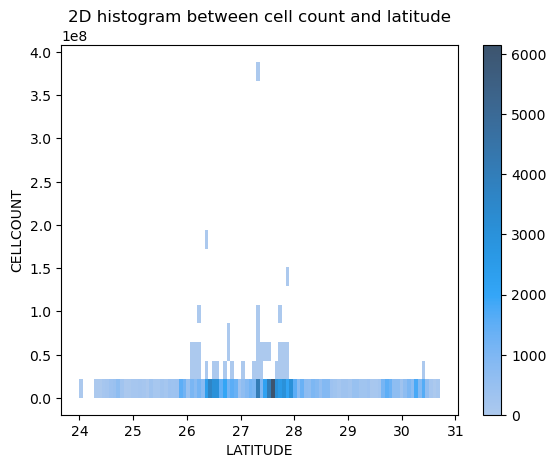

In [44]:
#Looking at the entire dataset (sans nans)
sns.histplot(data=AB2, y='CELLCOUNT', x='LATITUDE',cbar=True)
plt.title('2D histogram between cell count and latitude')
plt.xlabel('LATITUDE')
plt.ylabel('CELLCOUNT')
plt.show()
plt.close()

## There seems to be a slight dependence favoring latitude roughly between 26 and 28 but this basically just spans the height of Texas and Florida from their bottom tips

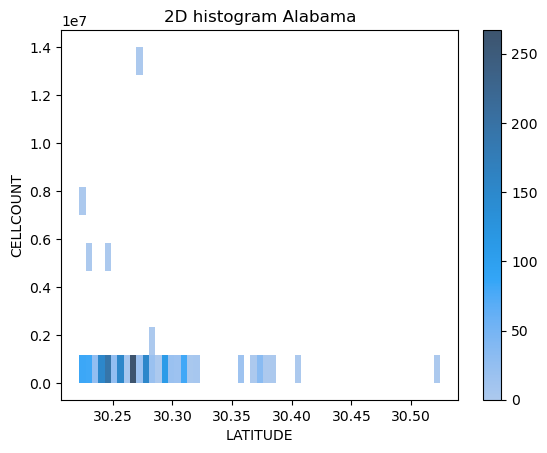

In [46]:
#Looking at the entire dataset (sans nans)
sns.histplot(data=abalabama, y='CELLCOUNT', x='LATITUDE', cbar=True)
plt.title('2D histogram Alabama')
plt.xlabel('LATITUDE')
plt.ylabel('CELLCOUNT')
plt.show()
plt.close()

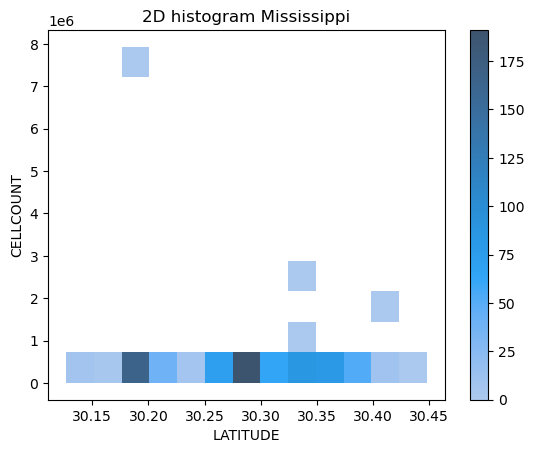

In [47]:
#Looking at the entire dataset (sans nans)
sns.histplot(data=abmississippi, y='CELLCOUNT', x='LATITUDE', cbar=True)
plt.title('2D histogram Mississippi')
plt.xlabel('LATITUDE')
plt.ylabel('CELLCOUNT')
plt.show()
plt.close()

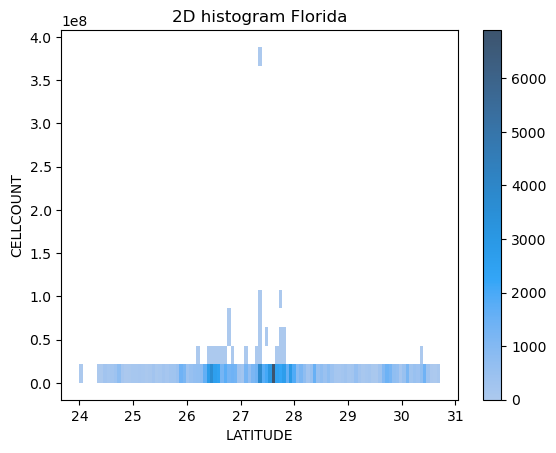

In [48]:
#Looking at the entire dataset (sans nans)
sns.histplot(data=abflorida, y='CELLCOUNT', x='LATITUDE', cbar=True)
plt.title('2D histogram Florida')
plt.xlabel('LATITUDE')
plt.ylabel('CELLCOUNT')
plt.show()
plt.close()

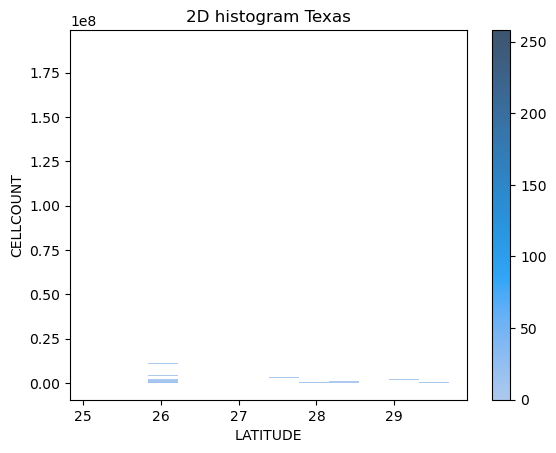

In [49]:
#Looking at the entire dataset (sans nans)
sns.histplot(data=abtexas, y='CELLCOUNT', x='LATITUDE', cbar=True)
plt.title('2D histogram Texas')
plt.xlabel('LATITUDE')
plt.ylabel('CELLCOUNT')
plt.show()
plt.close()

## Let's Look at the time differences between sample measurements

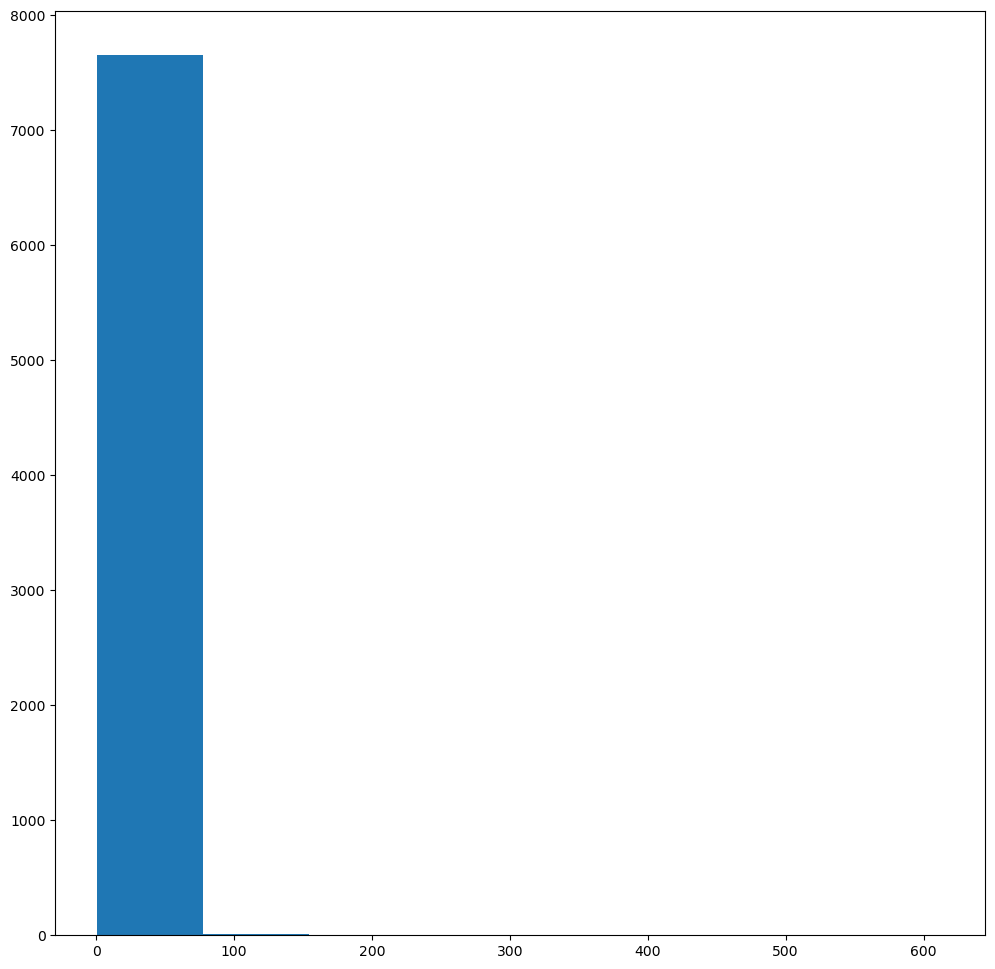

In [137]:
timediff = np.diff(AB2.SAMPLE_DATE).astype('timedelta64[s]') #units of seconds
timediff = timediff.astype('float64')
#24hours * 60 minutes/hour * 60 seconds/minute = 86400 seconds
timediff /= 3600*24 #units of days
timediff = np.round(timediff) #rounding for the histogram
plt.figure(figsize=(12,12))
plt.hist(timediff[timediff != 0.], bins=8)
plt.show()
#plt.xscale('log')
plt.close()

In [138]:
unique, counts = np.unique(timediff, return_counts=True)
for i, j in zip(unique, counts):
    print(i,j)

0.0 86536
1.0 5047
2.0 787
3.0 513
4.0 383
5.0 283
6.0 175
7.0 136
8.0 45
9.0 31
10.0 17
11.0 16
12.0 18
13.0 23
14.0 26
15.0 14
16.0 6
17.0 2
18.0 15
19.0 6
20.0 10
21.0 17
22.0 9
23.0 2
24.0 3
25.0 1
26.0 3
27.0 5
28.0 8
29.0 5
30.0 2
31.0 4
32.0 1
33.0 4
34.0 1
35.0 4
36.0 4
37.0 2
38.0 1
39.0 2
41.0 2
46.0 1
48.0 4
49.0 1
50.0 1
51.0 2
53.0 1
56.0 2
59.0 1
64.0 4
71.0 1
73.0 1
78.0 1
80.0 1
82.0 2
83.0 1
87.0 1
96.0 1
107.0 1
111.0 1
120.0 1
121.0 1
148.0 1
174.0 1
220.0 1
260.0 1
270.0 1
295.0 1
296.0 1
299.0 1
315.0 1
343.0 1
364.0 1
378.0 1
580.0 1
614.0 1


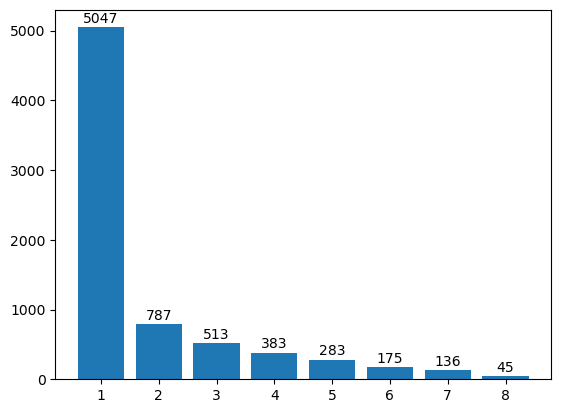

In [141]:
plt.bar(unique[1:9],counts[1:9])
#plt.yscale("log")
#label = ['5047', '787', '513', '383', '283', '175', '136', '45']#np.char.mod('%d', counts[1:9]#)
for i, j in zip(unique[1:9],counts[1:9]):
    plt.annotate(j, xy=(i,j), xytext=(0,1), textcoords="offset points", ha='center', va='bottom')
plt.show()
plt.close()

## Let's Look at the Correlations

In [50]:
AB2[['CELLCOUNT','SALINITY','WATER_TEMP','WIND_DIR','WIND_SPEED','SAMPLE_DEPTH']].corr()

C:\Users\Peter Doze\AppData\Local\Temp\ipykernel_4308\4097943294.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  AB2[['CELLCOUNT','SALINITY','WATER_TEMP','WIND_DIR','WIND_SPEED','SAMPLE_DEPTH']].corr()


CELLCOUNT  SALINITY  WATER_TEMP  WIND_SPEED  SAMPLE_DEPTH
CELLCOUNT      1.000000  0.019827    0.009717   -0.017879     -0.008880
SALINITY       0.019827  1.000000    0.016815    0.288894      0.147633
WATER_TEMP     0.009717  0.016815    1.000000    0.025942     -0.038444
WIND_SPEED    -0.017879  0.288894    0.025942    1.000000     -0.051810
SAMPLE_DEPTH  -0.008880  0.147633   -0.038444   -0.051810      1.000000

In [149]:
AB4 = AB2.copy()
AB4["Nan_CellCnt"] = AB3['CELLCOUNT']
len(AB2['CELLCOUNT'])
#AB4[['CELLCOUNT','SALINITY','WATER_TEMP','WIND_DIR','WIND_SPEED','SAMPLE_DEPTH','Nan_CellCnt']].corr()

94214

### <span style=color:red> Sample depth doesn't seem to be very correlated but neither is water temperature. Though I think we should inlcude water temperature anyway due to external reading. As expected Salinity and sample depth are correlated but there also seems to be some dependence on wind speed.</span> <span style=color:blue> Need to look at sample depth data I think we should just include it all if we have enough data from s.depth </span>

## Looking at the other features (temperature, salinity, wind speed etc.)

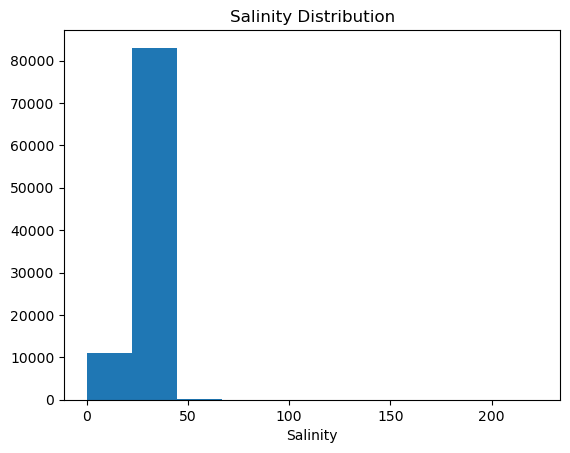

In [53]:
plt.hist(AB2['SALINITY'])
plt.title('Salinity Distribution')
plt.xlabel('Salinity')
plt.show()
plt.close()

### <span style=color:red> Salinity seems to mostly be one value </span>

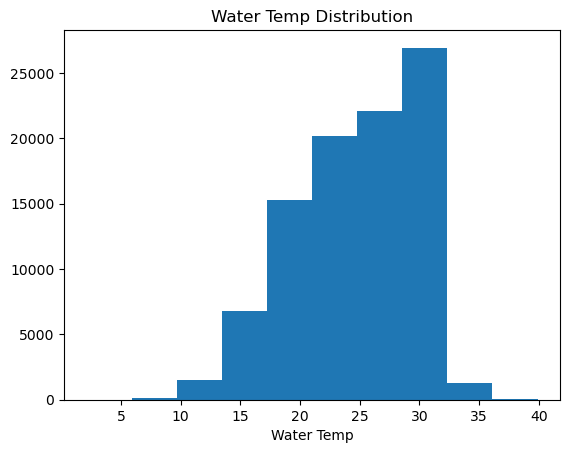

In [54]:
plt.hist(AB2['WATER_TEMP'])
plt.title('Water Temp Distribution')
plt.xlabel('Water Temp')
plt.show()
plt.close()

### <span style=color:red> Water temp is mostly on the hot end which agrees with climate change claims </span>

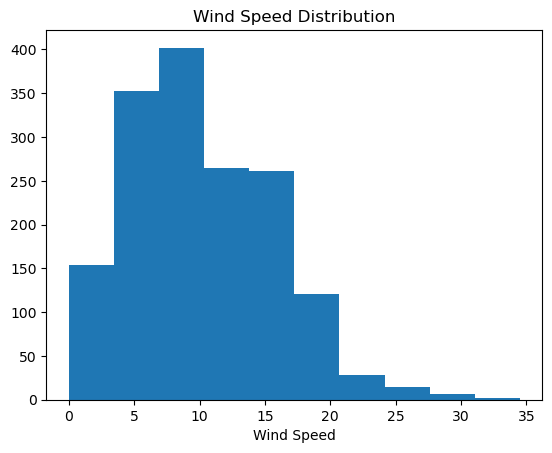

In [55]:
plt.hist(AB2['WIND_SPEED'])
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed')
plt.show()
plt.close()

### <span style=color:red> Wind speed seems to have some kind of dependence but its probably just the most likely wind speed for the area </span>

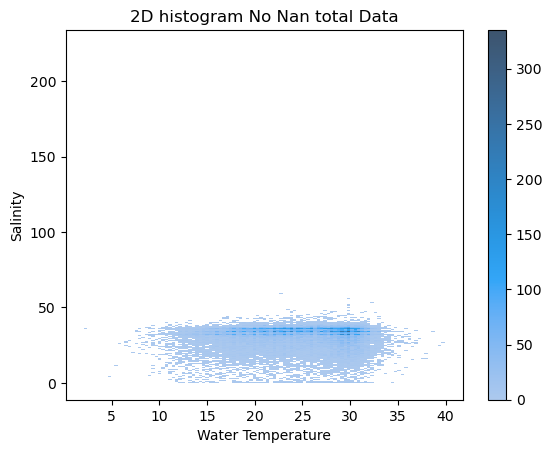

In [57]:
sns.histplot(data=AB2, y='SALINITY', x='WATER_TEMP', cbar=True)
plt.title('2D histogram No Nan total Data')
plt.xlabel('Water Temperature')
plt.ylabel('Salinity')
plt.show()
plt.close()

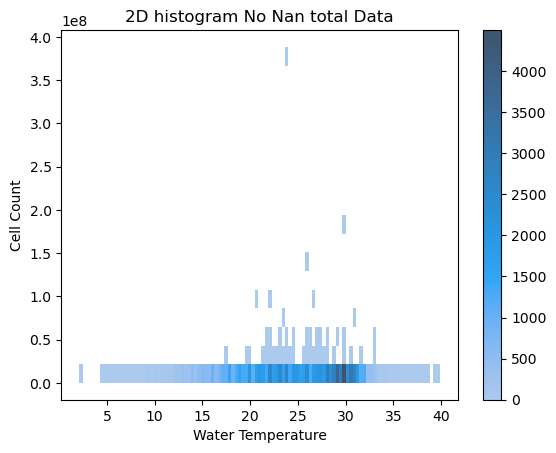

In [59]:
sns.histplot(data=AB2, y='CELLCOUNT', x='WATER_TEMP', cbar=True)
plt.title('2D histogram No Nan total Data')
plt.xlabel('Water Temperature')
plt.ylabel('Cell Count')
plt.show()
plt.close()

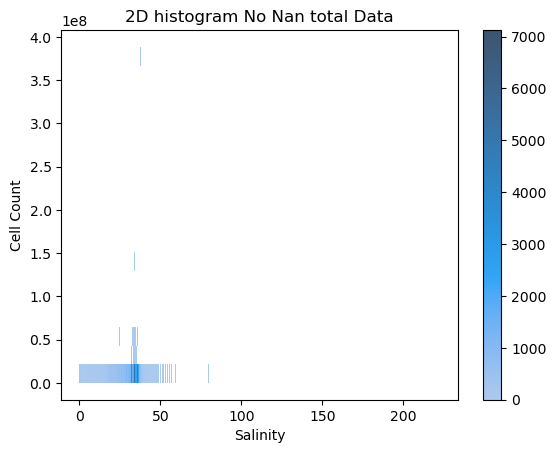

In [61]:
sns.histplot(data=AB2, y='CELLCOUNT', x='SALINITY', cbar=True)
plt.title('2D histogram No Nan total Data')
plt.xlabel('Salinity')
plt.ylabel('Cell Count')
plt.show()
plt.close()

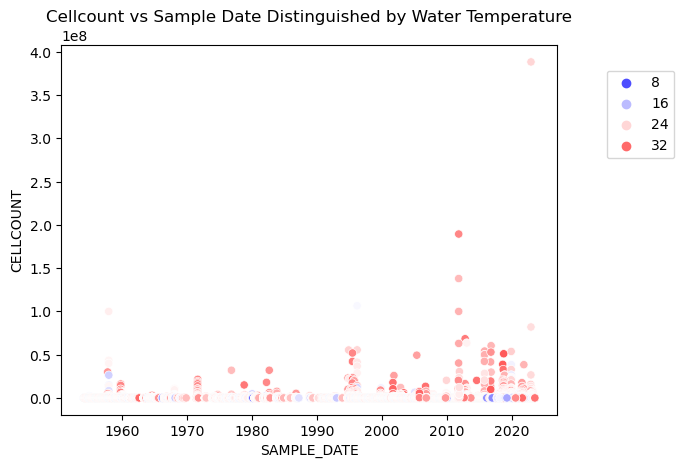

In [63]:
sns.scatterplot(data=AB2, x='SAMPLE_DATE', y='CELLCOUNT', hue='WATER_TEMP', palette = "bwr")
#sns.set_palette('bwr')
#sns.color_palette(palette='bwr')
plt.title('Cellcount vs Sample Date Distinguished by Water Temperature')
plt.legend(bbox_to_anchor=(1.25, 0.95))
plt.show()
plt.close()

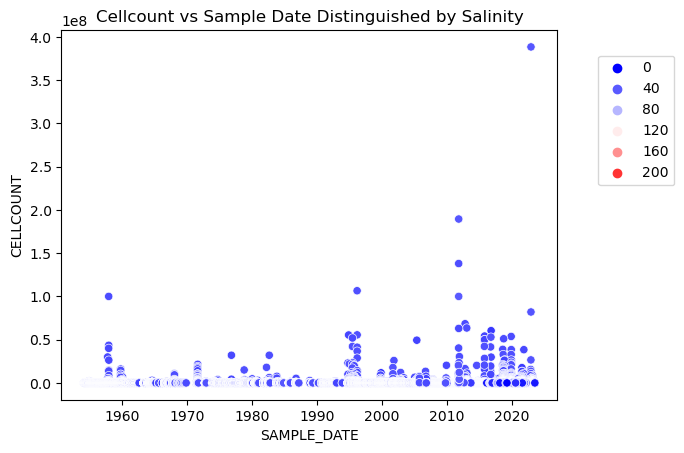

In [64]:
sns.scatterplot(data=AB2, x='SAMPLE_DATE', y='CELLCOUNT', hue='SALINITY', palette = "bwr")
#sns.set_palette('bwr')
#sns.color_palette(palette='bwr')
plt.title('Cellcount vs Sample Date Distinguished by Salinity')
plt.legend(bbox_to_anchor=(1.25, 0.95))
plt.show()
plt.close()

## Looking at the Seasonality of the Data 

In [187]:
def make_lag_plot(lag):
    x = AB2.CELLCOUNT.loc[AB2.SAMPLE_DATE > datetime(2010,1,1)].values[:-lag]/5e6
    y = AB2.CELLCOUNT.loc[AB2.SAMPLE_DATE > datetime(2010,1,1)].values[lag:]/5e6
    
    plt.figure(figsize=(6,6))
    
    plt.scatter(x, y, alpha=.7)
    plt.plot([0,100], [0,100], 'k--')
    
    plt.title("Lag (Days) = " + str(lag), fontsize=16)
    
    plt.show()
    plt.close()
    
    return np.corrcoef(x,y)[0,1]

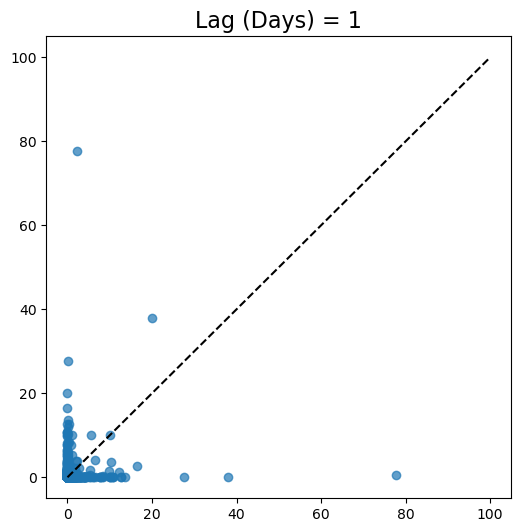

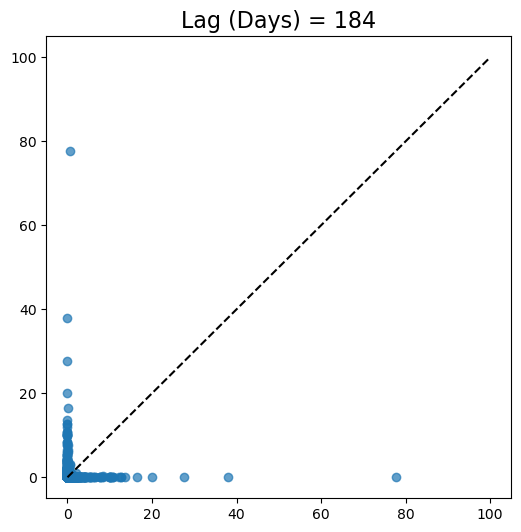

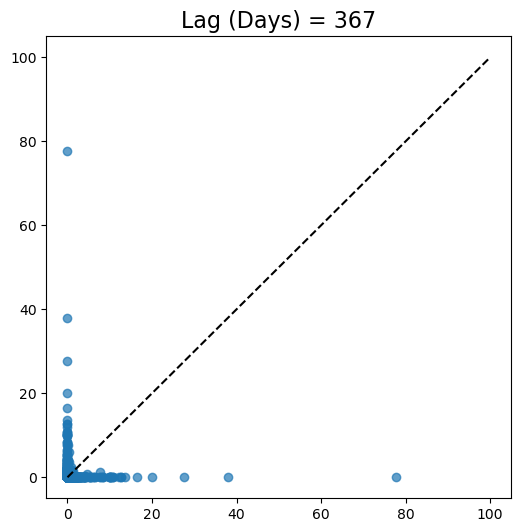

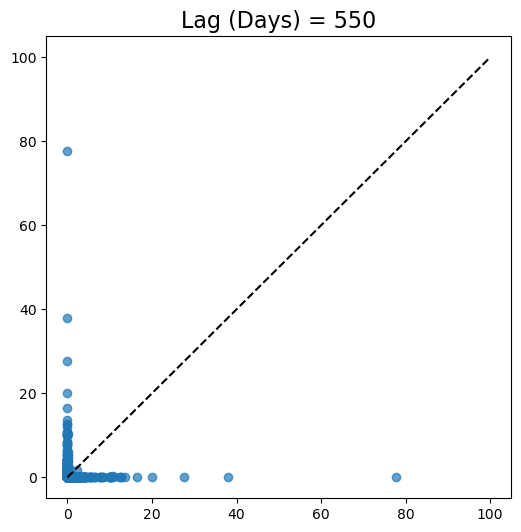

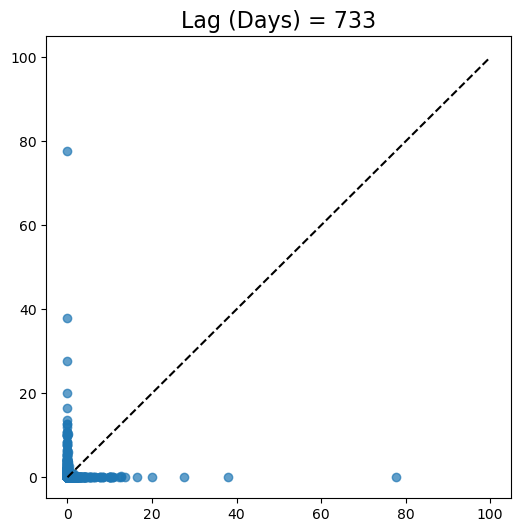

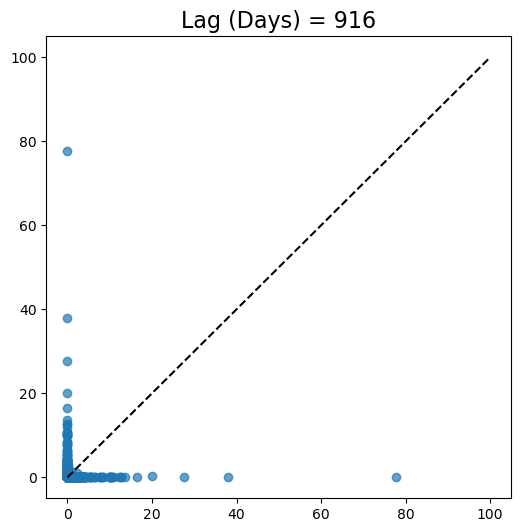

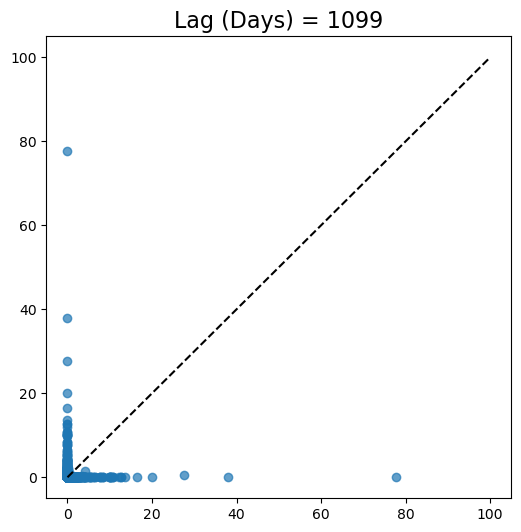

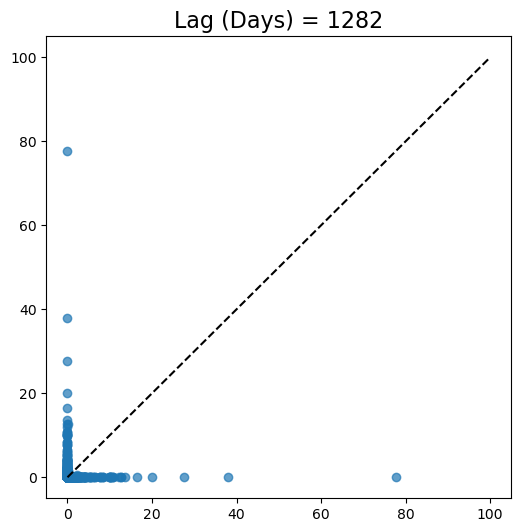

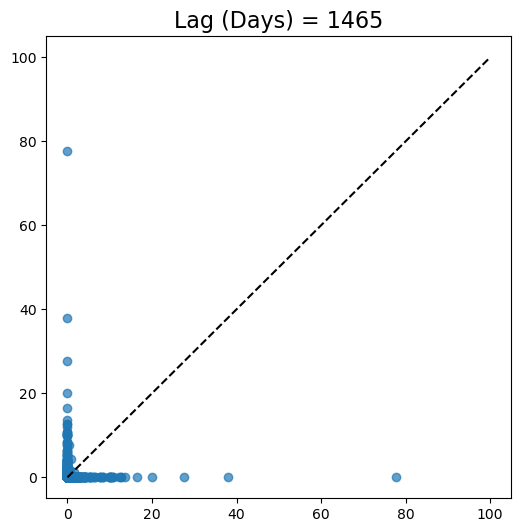

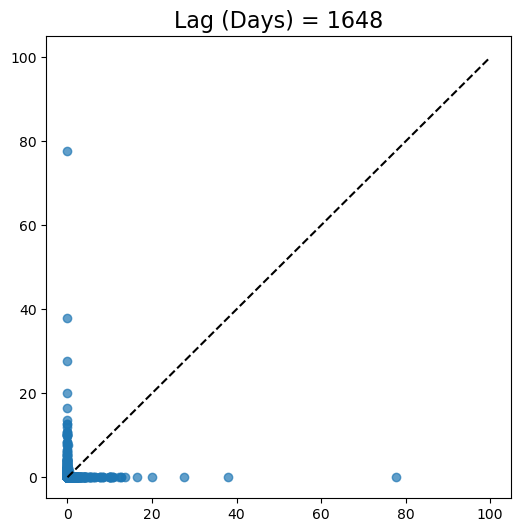

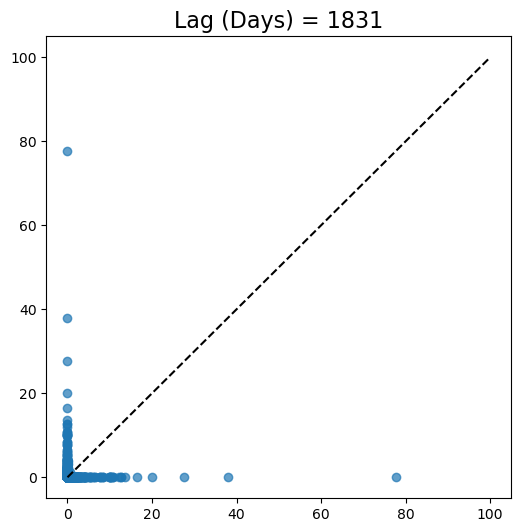

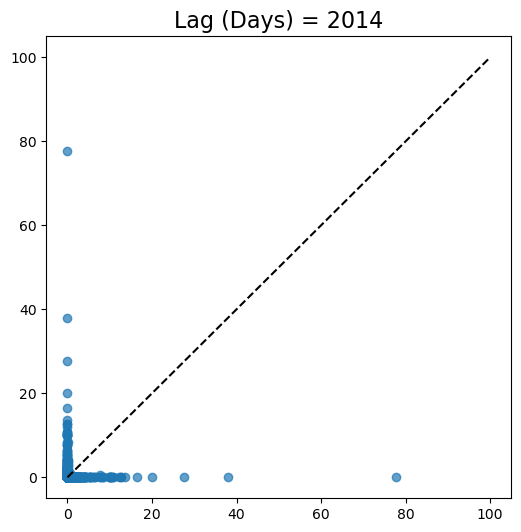

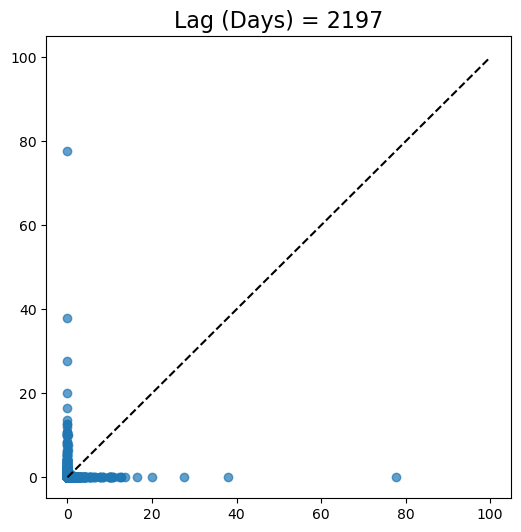

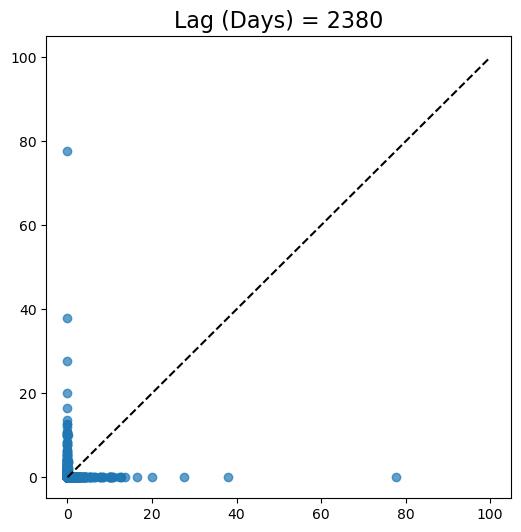

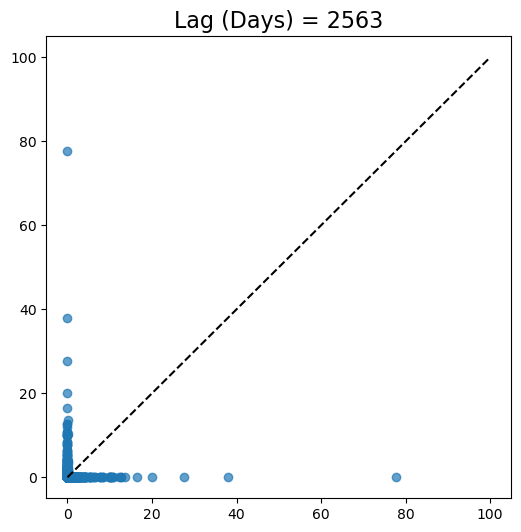

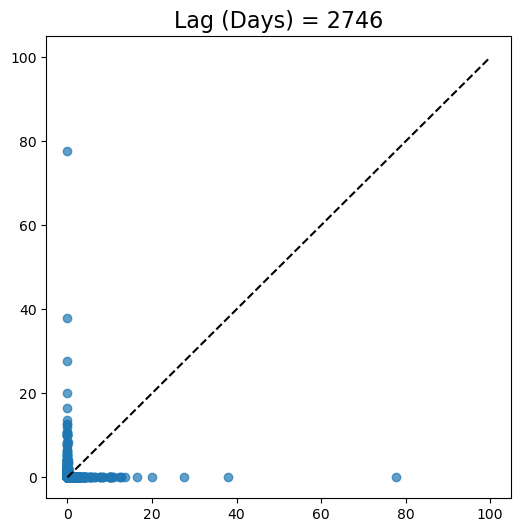

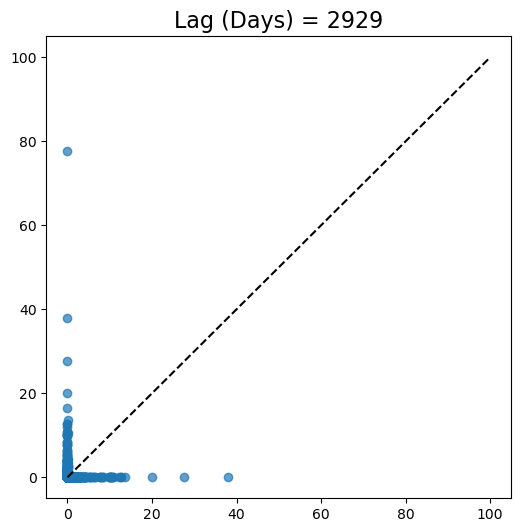

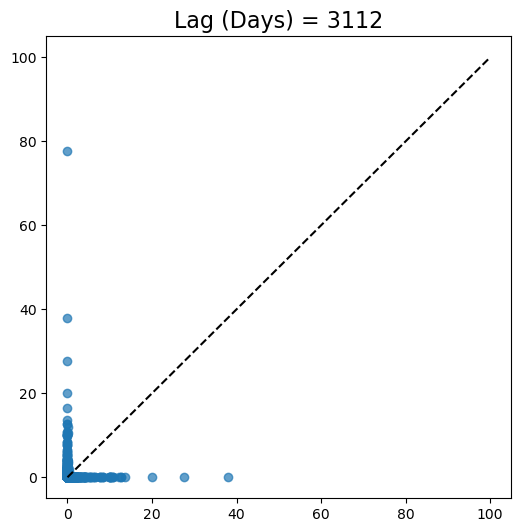

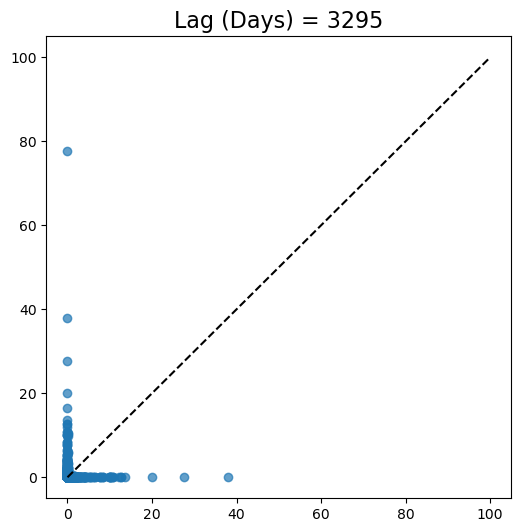

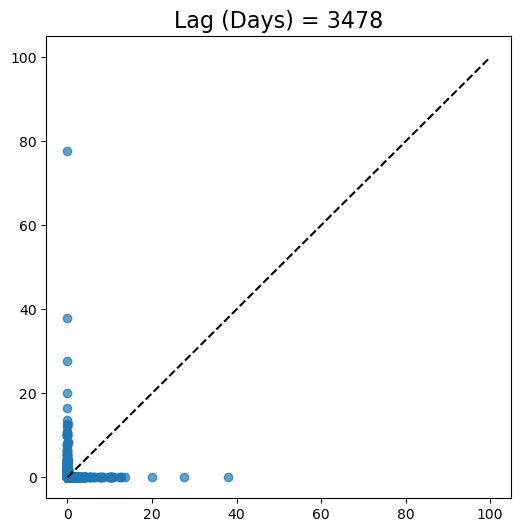

In [192]:
corr_coefs = []
#Ive looked over the course of a year 1954 ie. range(1,365) nothing
#Ive looked over the past 60 years ie. range(1,10951,365)   nothing
#Ive looked over half year intervals of the past 60 years ie.range(1,10951,183) nothing
#Ive looked over month intervals of the past 60 years
            #Did same as above except from 2010 and nothing I dont think this data is seasonal
for lag in range(1,3650,183):
    corr_coefs.append(make_lag_plot(lag))

In [193]:
plt.close("all")

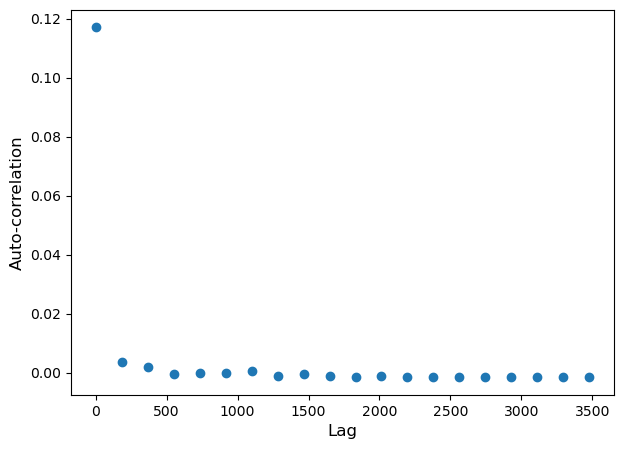

In [194]:
plt.figure(figsize=(7,5))

plt.scatter(range(1,3650,183), corr_coefs)

plt.xlabel("Lag", fontsize=12)
plt.ylabel("Auto-correlation", fontsize=12)

#plt.xticks(range(0,25,3), fontsize=10)
#plt.yticks(fontsize=10)

#plt.ylim([-1.1,1.1])

plt.show()
plt.close()

In [152]:
bb = np.arange(1,12)
bb

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [159]:
bb[:-2]/10

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [156]:
bb[2:]

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11])

In [169]:
for i in range(1,60,5):
    print(i)

1
6
11
16
21
26
31
36
41
46
51
56


In [180]:
21900/183

119.67213114754098

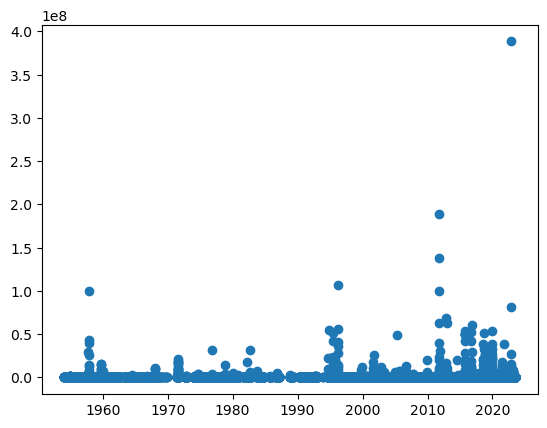

<function matplotlib.pyplot.close(fig=None)>

In [177]:
plt.scatter(AB2['SAMPLE_DATE'], AB2['CELLCOUNT'])
plt.show()
plt.close

In [186]:
365*10

3650